In [1]:
!python -m pip install pyserial
!python -m pip install import_ipynb

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [1]:
import numpy as np
import serial
import serial.tools.list_ports

import import_ipynb
import Visualize_Data

importing Jupyter notebook from Visualize_Data.ipynb


In [2]:
def find_arduino(port=None):
    """Get the name of the port that is connected to Arduino."""
    if port is None:
        ports = serial.tools.list_ports.comports()
        for p in ports:
            if p.manufacturer is not None and "Arduino" in p.manufacturer:
                port = p.device
    return port

In [3]:
port = find_arduino()

In [4]:
ser = serial.Serial()
ser.baudrate = 115200
ser.port = port
ser.open()
if ser.is_open:
    print("Serial port: " + port + " is opened.")
else:
    print("Serial port: " + port + " cannot be opened.")

Serial port: COM5 is opened.


In [16]:
ser.close()

In [5]:
num_samples = 64  # This should match with the number of samples taken by the MCU.
sampling_frequency = 10

x_data = [0] * num_samples
y_data = [0] * num_samples
z_data = [0] * num_samples

In [6]:
def fill_buffer(buffer, num_samples):
    i = 0
    temp_buffer = []
    
    while i < num_samples:
        try:
            value = float(ser.readline())
        except:
            value = 0.0
        temp_buffer.append(value)
        i += 1
        
    if buffer.casefold() == "x":
        x_data.clear()
        x_data.extend(temp_buffer)
    elif buffer.casefold() == "y":
        y_data.clear()
        y_data.extend(temp_buffer)
    elif buffer.casefold() == "z":
        z_data.clear()
        z_data.extend(temp_buffer)

y
[-0.11, -0.41, 0.17, 0.17, -0.4, -0.34, 0.25, 0.38, -0.48, -0.03, 0.26, -0.14, -0.18, -0.0, 0.27, -0.87, 0.04, 0.13, 0.49, -0.61, -0.41, 0.27, 0.29, -0.61, -0.32, 0.17, 0.04, -0.47, -0.07, 0.41, -0.31, -0.27, 0.46, 0.33, -0.52, -0.4, 0.23, -0.19, -0.36, 0.18, 0.07, 0.02, -0.39, 0.58, 0.3, -0.59, -0.42, 0.3, 0.14, -0.7, -0.16, 0.27, -0.27, -0.27, -0.02, 0.22, -0.39, -0.73, 0.15, 0.04, -0.12, 0.15, 0.22, -0.44]
[0.1, -0.03, -0.47, 0.4, 0.24, -0.41, 0.3, 0.45, -0.47, -0.5, 0.15, 0.36, -0.16, -0.39, 0.35, 0.09, -0.43, -0.1, 0.46, -0.18, -0.42, -0.08, 0.43, -0.1, -0.46, 0.03, 0.36, -0.08, -0.41, -0.23, 0.23, -0.15, -0.36, 0.34, -0.07, -0.29, 0.04, 0.27, -0.09, -0.33, 0.33, 0.14, -0.14, -0.14, 0.41, -0.13, -0.41, 0.13, 0.33, -0.17, -0.43, 0.14, 0.53, -0.27, -0.36, 0.31, -0.11, -0.23, -0.08, 0.33, -0.23, -0.4, 0.22, 0.1]
[0.85, 0.84, 0.86, 0.79, 0.73, 0.82, 0.88, 0.84, 0.75, 0.79, 0.87, 0.83, 0.82, 0.84, 0.85, 0.92, 0.82, 0.86, 0.87, 0.81, 0.83, 0.9, 0.65, 0.9, 0.87, 0.89, 1.46, 0.81, 0.86,

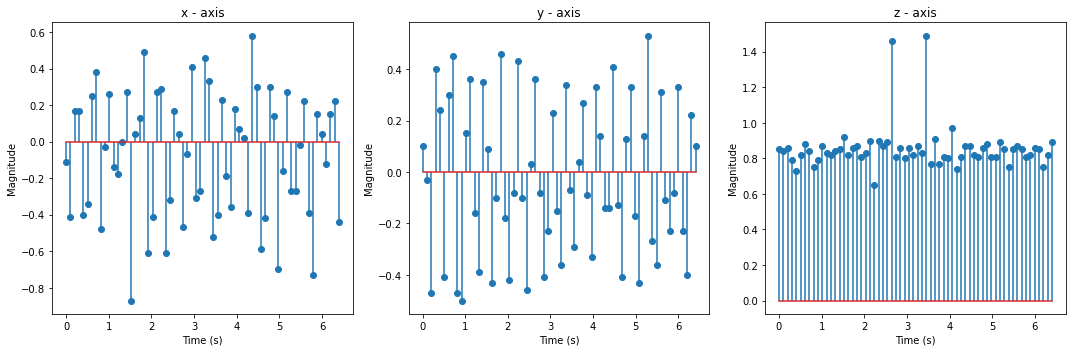

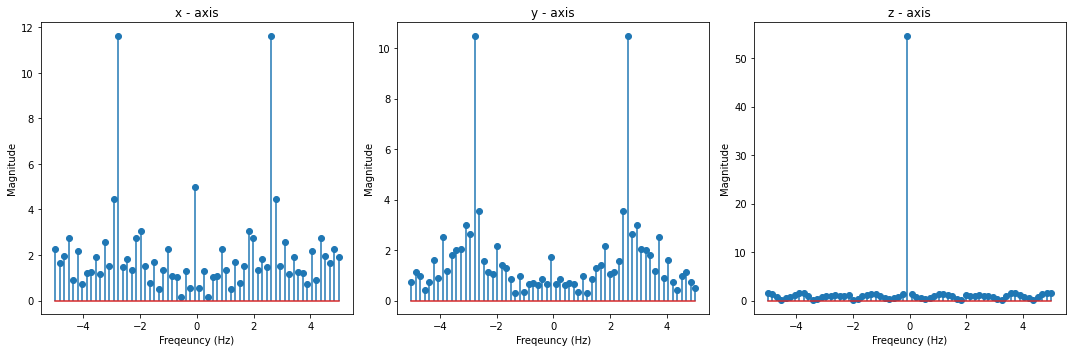

z
[-0.11, -0.41, 0.17, 0.17, -0.4, -0.34, 0.25, 0.38, -0.48, -0.03, 0.26, -0.14, -0.18, -0.0, 0.27, -0.87, 0.04, 0.13, 0.49, -0.61, -0.41, 0.27, 0.29, -0.61, -0.32, 0.17, 0.04, -0.47, -0.07, 0.41, -0.31, -0.27, 0.46, 0.33, -0.52, -0.4, 0.23, -0.19, -0.36, 0.18, 0.07, 0.02, -0.39, 0.58, 0.3, -0.59, -0.42, 0.3, 0.14, -0.7, -0.16, 0.27, -0.27, -0.27, -0.02, 0.22, -0.39, -0.73, 0.15, 0.04, -0.12, 0.15, 0.22, -0.44]
[0.1, -0.03, -0.47, 0.4, 0.24, -0.41, 0.3, 0.45, -0.47, -0.5, 0.15, 0.36, -0.16, -0.39, 0.35, 0.09, -0.43, -0.1, 0.46, -0.18, -0.42, -0.08, 0.43, -0.1, -0.46, 0.03, 0.36, -0.08, -0.41, -0.23, 0.23, -0.15, -0.36, 0.34, -0.07, -0.29, 0.04, 0.27, -0.09, -0.33, 0.33, 0.14, -0.14, -0.14, 0.41, -0.13, -0.41, 0.13, 0.33, -0.17, -0.43, 0.14, 0.53, -0.27, -0.36, 0.31, -0.11, -0.23, -0.08, 0.33, -0.23, -0.4, 0.22, 0.1]
[0.81, 0.82, 0.87, 0.87, 0.83, 0.8, 0.85, 0.9, 0.68, 0.82, 0.85, 0.82, 0.81, 0.84, 0.87, 0.81, 0.82, 0.85, 0.86, 0.72, 0.8, 0.87, 0.85, 0.63, 0.8, 0.85, 0.89, 0.81, 0.84, 0

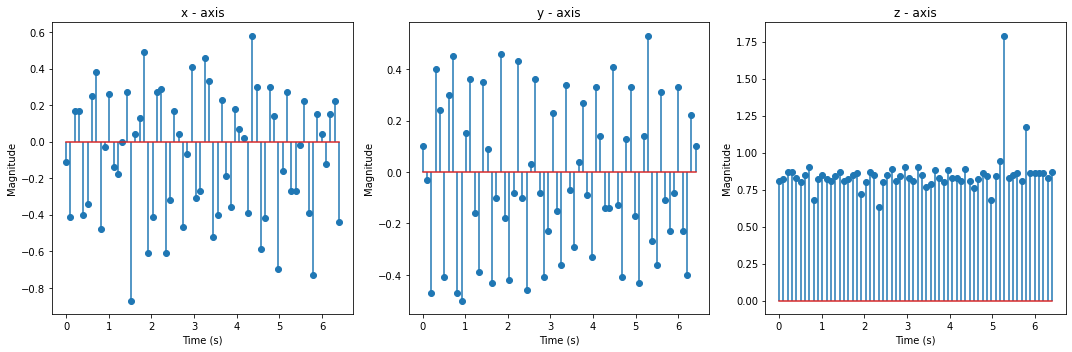

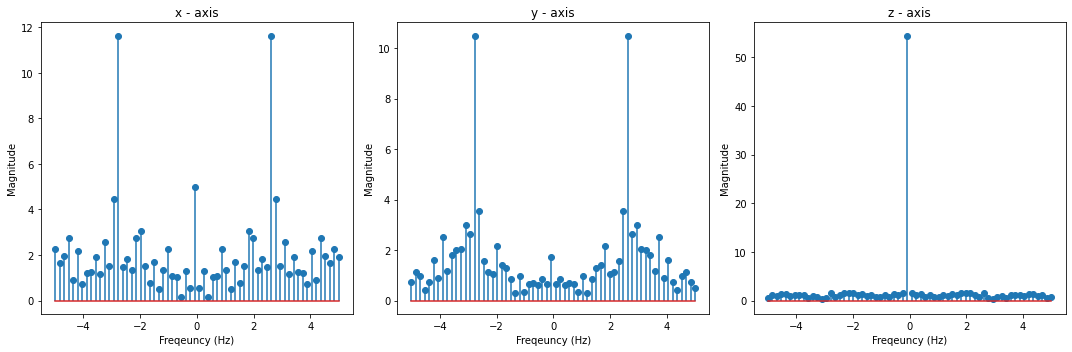

x
[-0.43, -0.01, 0.12, -0.08, -0.31, -0.07, 0.07, 0.12, -0.32, -0.03, 0.37, -0.26, -0.39, 0.37, 0.26, -0.51, -0.52, 0.25, 0.15, -0.34, -0.47, 0.5, 0.2, -0.68, -0.3, 0.34, -0.13, -0.33, 0.17, 0.29, -0.48, -0.05, 0.31, 0.63, -0.61, -0.35, 0.13, -0.02, -0.58, 0.02, 0.13, -0.22, -0.08, -0.07, 0.11, -0.13, -0.21, 0.13, 0.05, -0.22, -0.27, 0.21, -0.21, -0.2, 0.37, -0.07, -0.42, -0.27, 0.09, 0.13, -0.37, -0.16, 0.19, 0.15]
[0.1, -0.03, -0.47, 0.4, 0.24, -0.41, 0.3, 0.45, -0.47, -0.5, 0.15, 0.36, -0.16, -0.39, 0.35, 0.09, -0.43, -0.1, 0.46, -0.18, -0.42, -0.08, 0.43, -0.1, -0.46, 0.03, 0.36, -0.08, -0.41, -0.23, 0.23, -0.15, -0.36, 0.34, -0.07, -0.29, 0.04, 0.27, -0.09, -0.33, 0.33, 0.14, -0.14, -0.14, 0.41, -0.13, -0.41, 0.13, 0.33, -0.17, -0.43, 0.14, 0.53, -0.27, -0.36, 0.31, -0.11, -0.23, -0.08, 0.33, -0.23, -0.4, 0.22, 0.1]
[0.81, 0.82, 0.87, 0.87, 0.83, 0.8, 0.85, 0.9, 0.68, 0.82, 0.85, 0.82, 0.81, 0.84, 0.87, 0.81, 0.82, 0.85, 0.86, 0.72, 0.8, 0.87, 0.85, 0.63, 0.8, 0.85, 0.89, 0.81, 0.

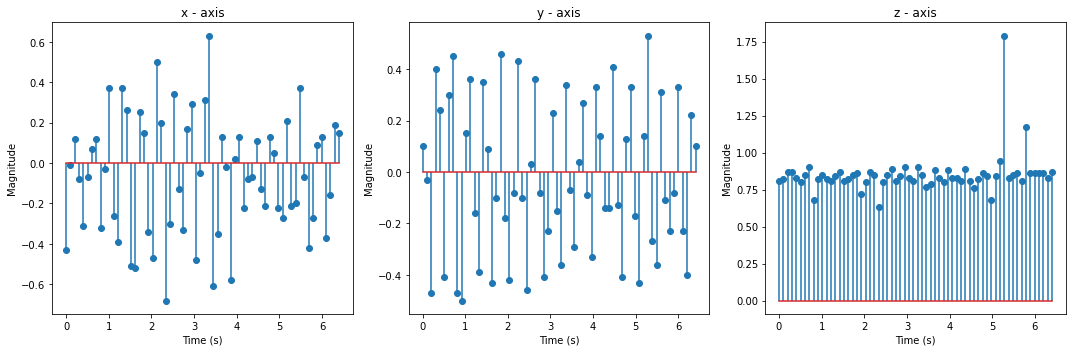

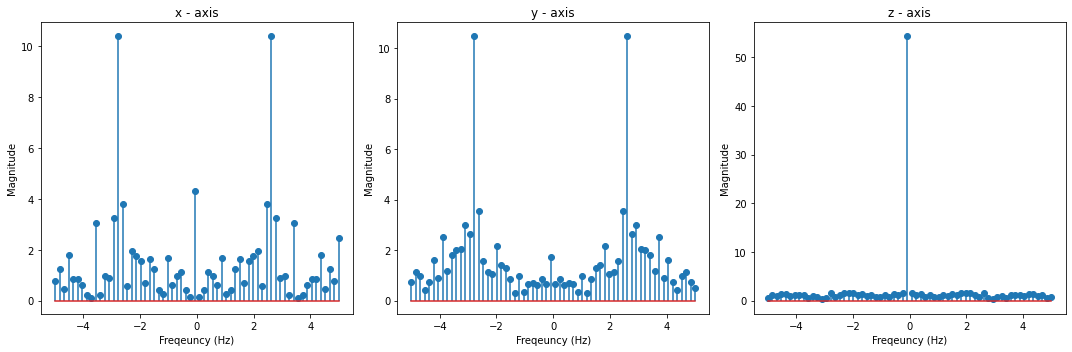

y
[-0.43, -0.01, 0.12, -0.08, -0.31, -0.07, 0.07, 0.12, -0.32, -0.03, 0.37, -0.26, -0.39, 0.37, 0.26, -0.51, -0.52, 0.25, 0.15, -0.34, -0.47, 0.5, 0.2, -0.68, -0.3, 0.34, -0.13, -0.33, 0.17, 0.29, -0.48, -0.05, 0.31, 0.63, -0.61, -0.35, 0.13, -0.02, -0.58, 0.02, 0.13, -0.22, -0.08, -0.07, 0.11, -0.13, -0.21, 0.13, 0.05, -0.22, -0.27, 0.21, -0.21, -0.2, 0.37, -0.07, -0.42, -0.27, 0.09, 0.13, -0.37, -0.16, 0.19, 0.15]
[0.08, -0.33, 0.15, 0.17, -0.14, -0.3, -0.03, 0.42, -0.36, -0.31, 0.25, 0.12, -0.13, -0.17, 0.33, 0.04, -0.18, -0.12, 0.37, 0.04, -0.5, 0.01, 0.29, -0.12, -0.3, 0.16, 0.11, -0.1, -0.29, 0.13, 0.16, -0.33, -0.22, -0.02, 0.01, -0.23, -0.03, 0.1, -0.37, -0.22, 0.08, 0.14, -0.18, -0.18, -0.13, 0.16, -0.18, -0.1, 0.16, -0.1, -0.26, -0.1, -0.32, -0.08, 0.07, -0.07, 0.26, 0.13, -0.28, 0.0, 0.21, -0.19, -0.23, 0.35]
[0.81, 0.82, 0.87, 0.87, 0.83, 0.8, 0.85, 0.9, 0.68, 0.82, 0.85, 0.82, 0.81, 0.84, 0.87, 0.81, 0.82, 0.85, 0.86, 0.72, 0.8, 0.87, 0.85, 0.63, 0.8, 0.85, 0.89, 0.81, 0.8

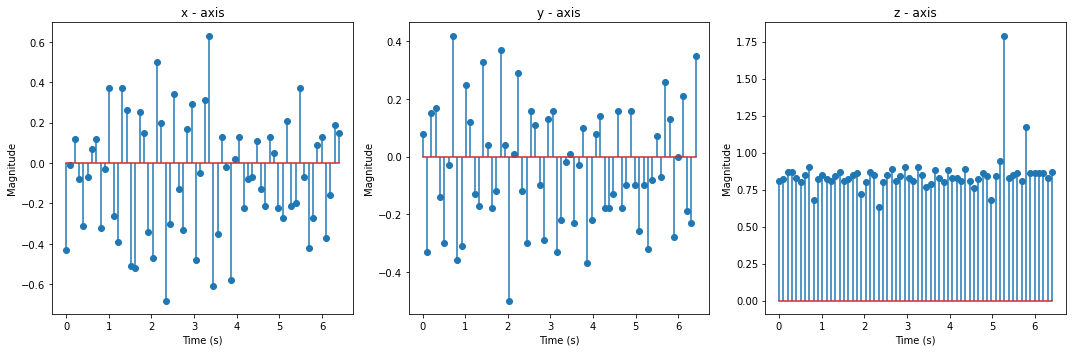

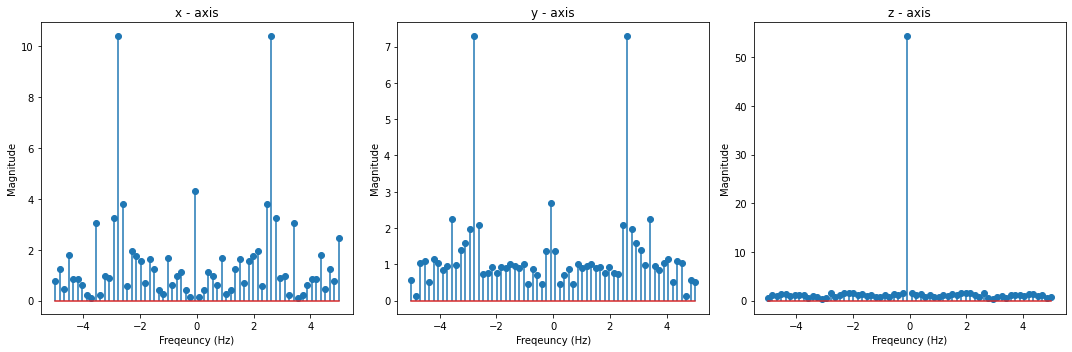

z
[-0.43, -0.01, 0.12, -0.08, -0.31, -0.07, 0.07, 0.12, -0.32, -0.03, 0.37, -0.26, -0.39, 0.37, 0.26, -0.51, -0.52, 0.25, 0.15, -0.34, -0.47, 0.5, 0.2, -0.68, -0.3, 0.34, -0.13, -0.33, 0.17, 0.29, -0.48, -0.05, 0.31, 0.63, -0.61, -0.35, 0.13, -0.02, -0.58, 0.02, 0.13, -0.22, -0.08, -0.07, 0.11, -0.13, -0.21, 0.13, 0.05, -0.22, -0.27, 0.21, -0.21, -0.2, 0.37, -0.07, -0.42, -0.27, 0.09, 0.13, -0.37, -0.16, 0.19, 0.15]
[0.08, -0.33, 0.15, 0.17, -0.14, -0.3, -0.03, 0.42, -0.36, -0.31, 0.25, 0.12, -0.13, -0.17, 0.33, 0.04, -0.18, -0.12, 0.37, 0.04, -0.5, 0.01, 0.29, -0.12, -0.3, 0.16, 0.11, -0.1, -0.29, 0.13, 0.16, -0.33, -0.22, -0.02, 0.01, -0.23, -0.03, 0.1, -0.37, -0.22, 0.08, 0.14, -0.18, -0.18, -0.13, 0.16, -0.18, -0.1, 0.16, -0.1, -0.26, -0.1, -0.32, -0.08, 0.07, -0.07, 0.26, 0.13, -0.28, 0.0, 0.21, -0.19, -0.23, 0.35]
[0.83, 0.83, 0.85, 0.83, 0.81, 0.85, 0.85, 0.85, 0.83, 0.85, 0.83, 0.81, 0.81, 0.89, 0.85, 0.84, 0.81, 0.86, 0.87, 0.77, 0.8, 0.92, 0.84, 0.74, 0.79, 0.86, 0.92, 0.79, 

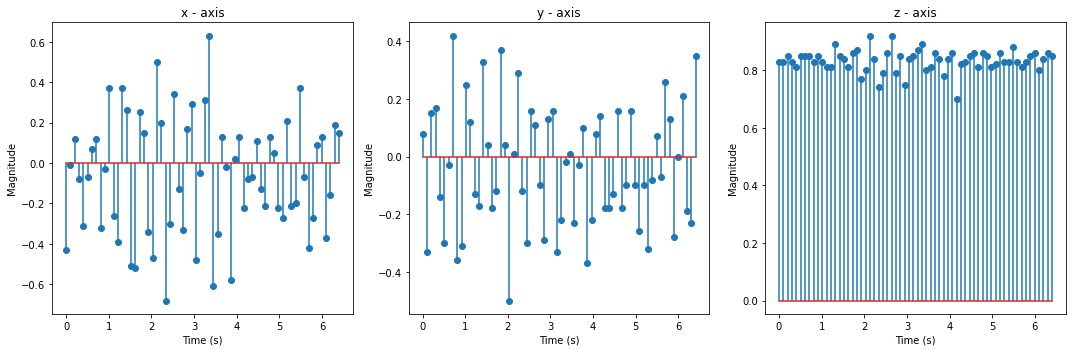

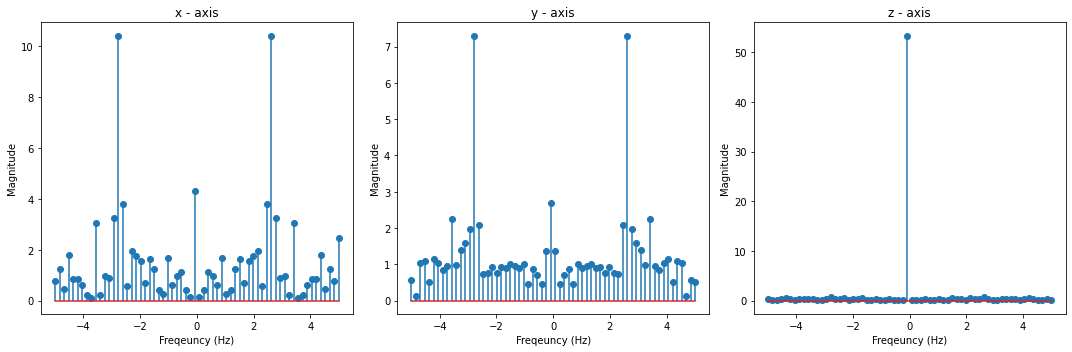

x
[0.18, -0.09, -0.1, -0.1, 0.07, -0.04, -0.81, -0.34, 0.32, -0.26, -0.58, 0.48, 0.22, 0.01, -0.45, 0.18, 0.04, -0.44, -0.17, 0.25, 0.08, -0.35, -0.37, 0.03, -0.03, -0.36, 0.17, 0.23, -0.49, -0.18, 0.17, -0.01, -0.28, 0.0, 0.23, -0.41, -0.54, 0.29, 0.04, -0.46, -0.19, 0.07, -0.38, 0.25, 0.38, -0.15, -0.12, 0.22, -0.05, -0.44, 0.04, 0.23, -0.23, -0.1, 0.3, -0.11, -0.42, 0.25, -0.19, -0.19, -0.11, 0.31, 0.18, -0.05]
[0.08, -0.33, 0.15, 0.17, -0.14, -0.3, -0.03, 0.42, -0.36, -0.31, 0.25, 0.12, -0.13, -0.17, 0.33, 0.04, -0.18, -0.12, 0.37, 0.04, -0.5, 0.01, 0.29, -0.12, -0.3, 0.16, 0.11, -0.1, -0.29, 0.13, 0.16, -0.33, -0.22, -0.02, 0.01, -0.23, -0.03, 0.1, -0.37, -0.22, 0.08, 0.14, -0.18, -0.18, -0.13, 0.16, -0.18, -0.1, 0.16, -0.1, -0.26, -0.1, -0.32, -0.08, 0.07, -0.07, 0.26, 0.13, -0.28, 0.0, 0.21, -0.19, -0.23, 0.35]
[0.83, 0.83, 0.85, 0.83, 0.81, 0.85, 0.85, 0.85, 0.83, 0.85, 0.83, 0.81, 0.81, 0.89, 0.85, 0.84, 0.81, 0.86, 0.87, 0.77, 0.8, 0.92, 0.84, 0.74, 0.79, 0.86, 0.92, 0.79, 0.

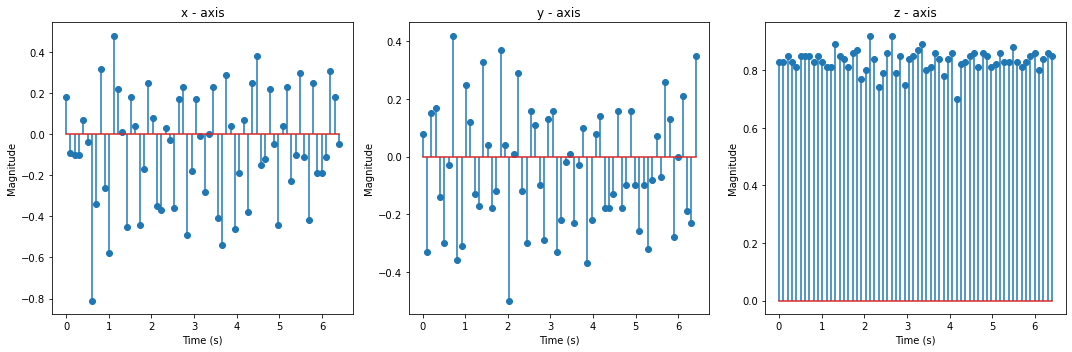

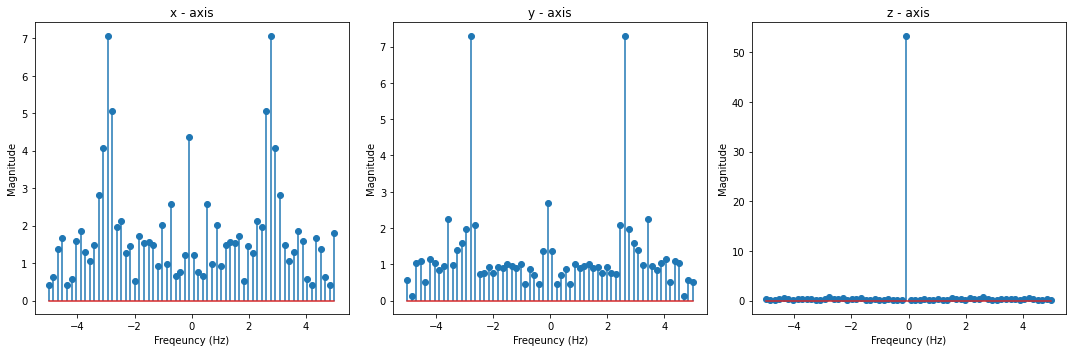

y
[0.18, -0.09, -0.1, -0.1, 0.07, -0.04, -0.81, -0.34, 0.32, -0.26, -0.58, 0.48, 0.22, 0.01, -0.45, 0.18, 0.04, -0.44, -0.17, 0.25, 0.08, -0.35, -0.37, 0.03, -0.03, -0.36, 0.17, 0.23, -0.49, -0.18, 0.17, -0.01, -0.28, 0.0, 0.23, -0.41, -0.54, 0.29, 0.04, -0.46, -0.19, 0.07, -0.38, 0.25, 0.38, -0.15, -0.12, 0.22, -0.05, -0.44, 0.04, 0.23, -0.23, -0.1, 0.3, -0.11, -0.42, 0.25, -0.19, -0.19, -0.11, 0.31, 0.18, -0.05]
[-0.18, 0.48, -0.09, -0.05, -0.6, 0.03, 0.18, -0.44, 0.28, 0.25, -0.07, -0.33, 0.46, 0.31, -0.23, -0.17, 0.29, -0.24, -0.43, -0.17, 0.34, -0.19, -0.25, 0.11, 0.03, -0.11, -0.21, 0.35, 0.08, -0.23, -0.12, 0.35, -0.29, -0.23, 0.34, 0.16, -0.29, -0.15, 0.41, -0.22, -0.14, 0.34, 0.13, -0.34, 0.1, 0.33, -0.04, -0.08, 0.23, 0.07, -0.15, 0.08, 0.2, -0.24, -0.1, 0.25, -0.18, -0.23, 0.28, 0.07, -0.21, -0.25, 0.44, -0.01]
[0.83, 0.83, 0.85, 0.83, 0.81, 0.85, 0.85, 0.85, 0.83, 0.85, 0.83, 0.81, 0.81, 0.89, 0.85, 0.84, 0.81, 0.86, 0.87, 0.77, 0.8, 0.92, 0.84, 0.74, 0.79, 0.86, 0.92, 0.79

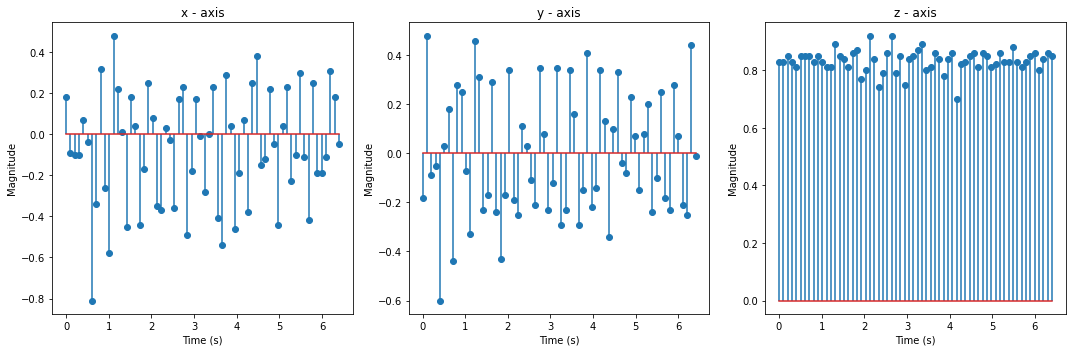

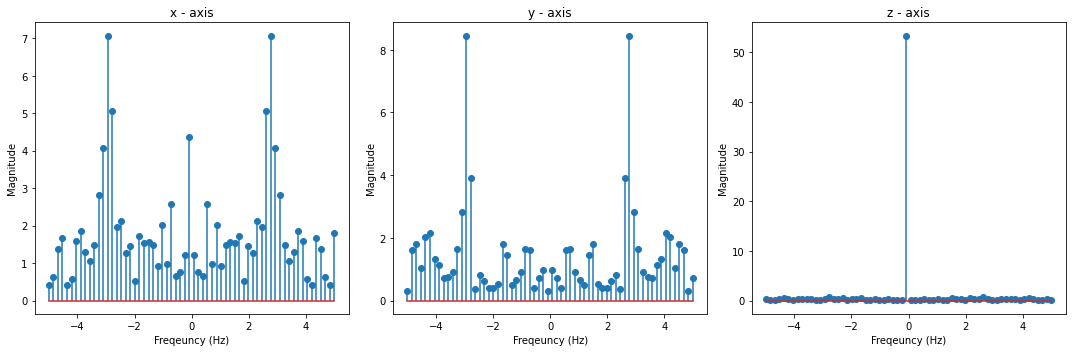

z
[0.18, -0.09, -0.1, -0.1, 0.07, -0.04, -0.81, -0.34, 0.32, -0.26, -0.58, 0.48, 0.22, 0.01, -0.45, 0.18, 0.04, -0.44, -0.17, 0.25, 0.08, -0.35, -0.37, 0.03, -0.03, -0.36, 0.17, 0.23, -0.49, -0.18, 0.17, -0.01, -0.28, 0.0, 0.23, -0.41, -0.54, 0.29, 0.04, -0.46, -0.19, 0.07, -0.38, 0.25, 0.38, -0.15, -0.12, 0.22, -0.05, -0.44, 0.04, 0.23, -0.23, -0.1, 0.3, -0.11, -0.42, 0.25, -0.19, -0.19, -0.11, 0.31, 0.18, -0.05]
[-0.18, 0.48, -0.09, -0.05, -0.6, 0.03, 0.18, -0.44, 0.28, 0.25, -0.07, -0.33, 0.46, 0.31, -0.23, -0.17, 0.29, -0.24, -0.43, -0.17, 0.34, -0.19, -0.25, 0.11, 0.03, -0.11, -0.21, 0.35, 0.08, -0.23, -0.12, 0.35, -0.29, -0.23, 0.34, 0.16, -0.29, -0.15, 0.41, -0.22, -0.14, 0.34, 0.13, -0.34, 0.1, 0.33, -0.04, -0.08, 0.23, 0.07, -0.15, 0.08, 0.2, -0.24, -0.1, 0.25, -0.18, -0.23, 0.28, 0.07, -0.21, -0.25, 0.44, -0.01]
[0.87, 0.83, 0.82, 0.83, 0.84, 0.83, 0.96, 0.77, 0.89, 0.82, 0.81, 0.89, 0.94, 0.69, 0.93, 0.9, 0.82, 0.75, 0.81, 0.89, 0.83, 0.79, 0.83, 0.81, 0.84, 1.08, 0.87, 0.88

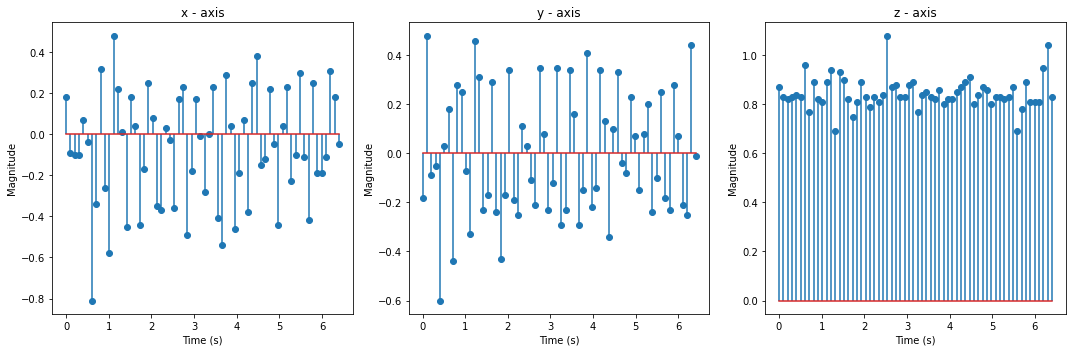

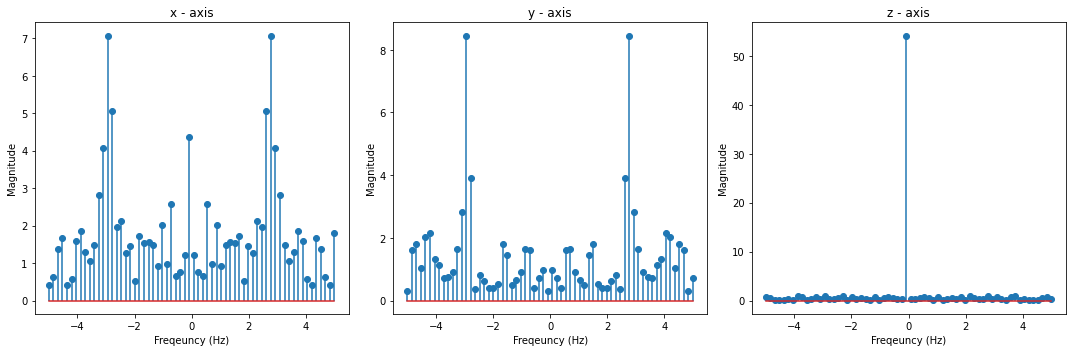

x
[-0.06, -0.22, -0.43, -0.01, 0.01, -0.49, -0.2, 0.26, 0.02, -0.12, 0.25, 0.13, -0.46, -0.26, -0.05, 0.04, 0.07, -0.45, 0.14, 0.09, -0.56, 0.06, 0.25, -0.2, -0.2, 0.18, -0.14, -0.35, 0.09, 0.08, -0.22, 0.1, 0.15, -0.24, -0.22, 0.3, 0.03, -0.33, 0.4, 0.18, 0.2, -0.35, -0.01, 0.06, -0.12, -0.24, -0.01, -0.0, -0.42, 0.03, 0.31, -0.04, -0.36, -0.02, 0.2, -0.29, -0.22, 0.13, 0.04, -0.1, 0.36, -0.2, -0.09, 0.34]
[-0.18, 0.48, -0.09, -0.05, -0.6, 0.03, 0.18, -0.44, 0.28, 0.25, -0.07, -0.33, 0.46, 0.31, -0.23, -0.17, 0.29, -0.24, -0.43, -0.17, 0.34, -0.19, -0.25, 0.11, 0.03, -0.11, -0.21, 0.35, 0.08, -0.23, -0.12, 0.35, -0.29, -0.23, 0.34, 0.16, -0.29, -0.15, 0.41, -0.22, -0.14, 0.34, 0.13, -0.34, 0.1, 0.33, -0.04, -0.08, 0.23, 0.07, -0.15, 0.08, 0.2, -0.24, -0.1, 0.25, -0.18, -0.23, 0.28, 0.07, -0.21, -0.25, 0.44, -0.01]
[0.87, 0.83, 0.82, 0.83, 0.84, 0.83, 0.96, 0.77, 0.89, 0.82, 0.81, 0.89, 0.94, 0.69, 0.93, 0.9, 0.82, 0.75, 0.81, 0.89, 0.83, 0.79, 0.83, 0.81, 0.84, 1.08, 0.87, 0.88, 0.83,

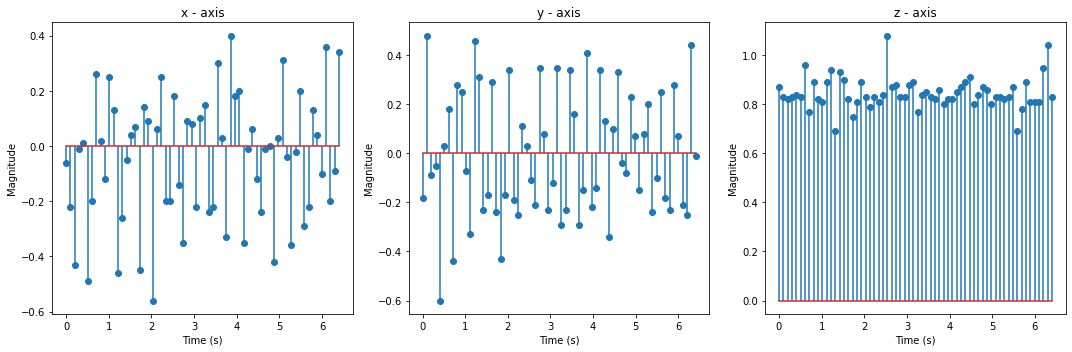

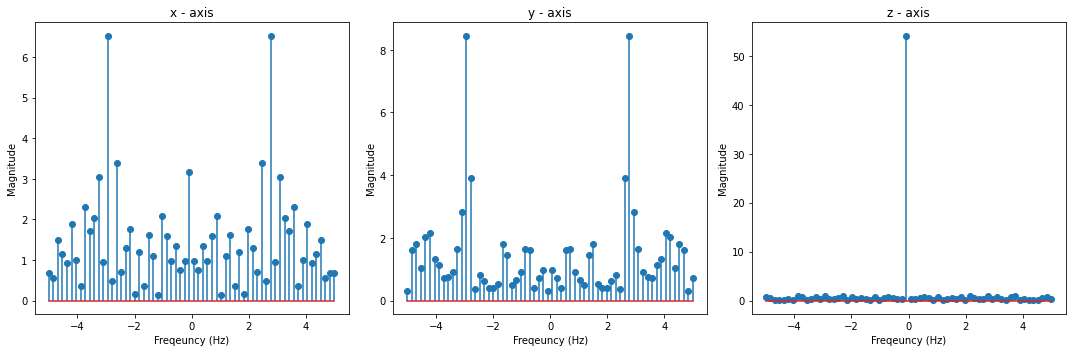

y
[-0.06, -0.22, -0.43, -0.01, 0.01, -0.49, -0.2, 0.26, 0.02, -0.12, 0.25, 0.13, -0.46, -0.26, -0.05, 0.04, 0.07, -0.45, 0.14, 0.09, -0.56, 0.06, 0.25, -0.2, -0.2, 0.18, -0.14, -0.35, 0.09, 0.08, -0.22, 0.1, 0.15, -0.24, -0.22, 0.3, 0.03, -0.33, 0.4, 0.18, 0.2, -0.35, -0.01, 0.06, -0.12, -0.24, -0.01, -0.0, -0.42, 0.03, 0.31, -0.04, -0.36, -0.02, 0.2, -0.29, -0.22, 0.13, 0.04, -0.1, 0.36, -0.2, -0.09, 0.34]
[-0.02, 0.31, -0.33, -0.23, 0.34, -0.22, -0.33, -0.11, 0.24, -0.12, -0.2, 0.19, 0.11, -0.27, 0.0, 0.25, 0.14, -0.13, -0.27, 0.29, -0.21, -0.37, 0.12, 0.12, -0.28, -0.03, 0.27, -0.18, -0.16, 0.23, -0.09, -0.18, 0.22, 0.15, -0.36, -0.01, 0.44, 0.09, -0.46, -0.12, 0.32, -0.4, -0.27, 0.02, 0.24, -0.35, -0.45, 0.32, 0.0, -0.48, -0.23, 0.17, 0.0, -0.51, 0.29, 0.11, -0.03, -0.02, 0.08, -0.03, 0.03, 0.33, -0.24, 0.07]
[0.87, 0.83, 0.82, 0.83, 0.84, 0.83, 0.96, 0.77, 0.89, 0.82, 0.81, 0.89, 0.94, 0.69, 0.93, 0.9, 0.82, 0.75, 0.81, 0.89, 0.83, 0.79, 0.83, 0.81, 0.84, 1.08, 0.87, 0.88, 0.83, 0

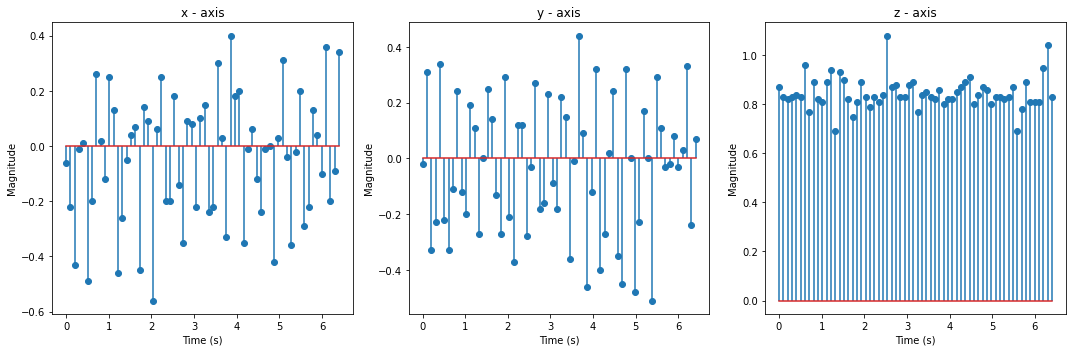

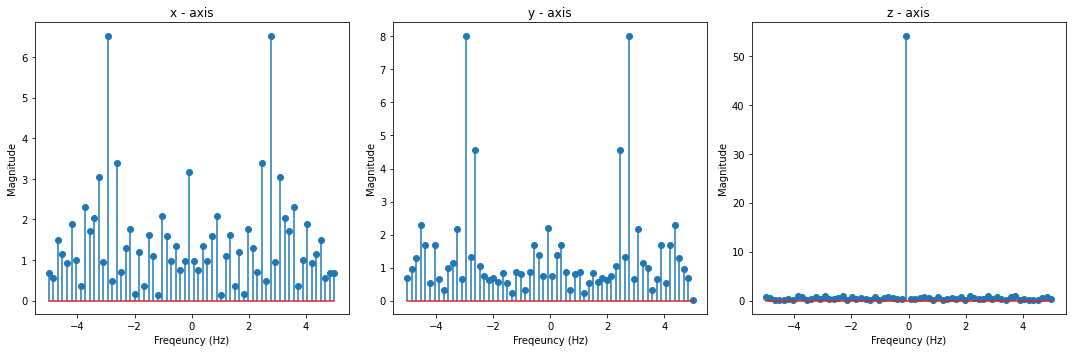

z
[-0.06, -0.22, -0.43, -0.01, 0.01, -0.49, -0.2, 0.26, 0.02, -0.12, 0.25, 0.13, -0.46, -0.26, -0.05, 0.04, 0.07, -0.45, 0.14, 0.09, -0.56, 0.06, 0.25, -0.2, -0.2, 0.18, -0.14, -0.35, 0.09, 0.08, -0.22, 0.1, 0.15, -0.24, -0.22, 0.3, 0.03, -0.33, 0.4, 0.18, 0.2, -0.35, -0.01, 0.06, -0.12, -0.24, -0.01, -0.0, -0.42, 0.03, 0.31, -0.04, -0.36, -0.02, 0.2, -0.29, -0.22, 0.13, 0.04, -0.1, 0.36, -0.2, -0.09, 0.34]
[-0.02, 0.31, -0.33, -0.23, 0.34, -0.22, -0.33, -0.11, 0.24, -0.12, -0.2, 0.19, 0.11, -0.27, 0.0, 0.25, 0.14, -0.13, -0.27, 0.29, -0.21, -0.37, 0.12, 0.12, -0.28, -0.03, 0.27, -0.18, -0.16, 0.23, -0.09, -0.18, 0.22, 0.15, -0.36, -0.01, 0.44, 0.09, -0.46, -0.12, 0.32, -0.4, -0.27, 0.02, 0.24, -0.35, -0.45, 0.32, 0.0, -0.48, -0.23, 0.17, 0.0, -0.51, 0.29, 0.11, -0.03, -0.02, 0.08, -0.03, 0.03, 0.33, -0.24, 0.07]
[0.85, 0.88, 0.68, 0.85, 0.9, 0.84, 0.83, 0.87, 0.72, 0.83, 0.87, 0.86, 0.81, 0.82, 0.84, 0.86, 0.71, 0.8, 0.87, 0.9, 0.97, 1.01, 0.93, 0.83, 0.82, 0.97, 0.81, 0.8, 0.89, 0.85

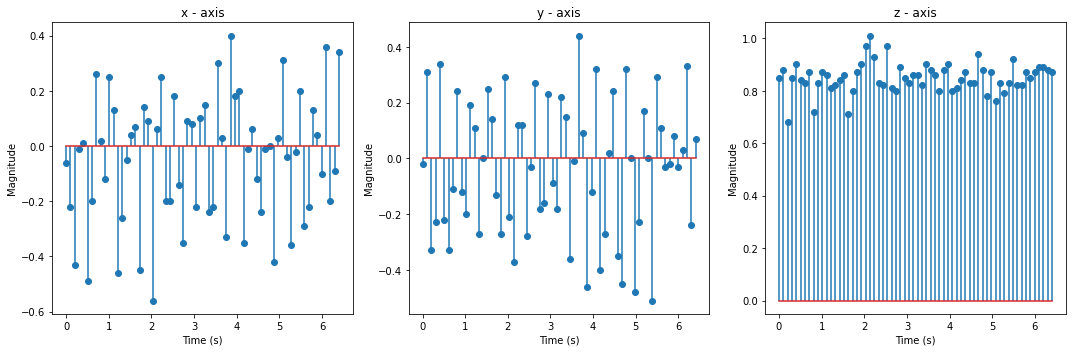

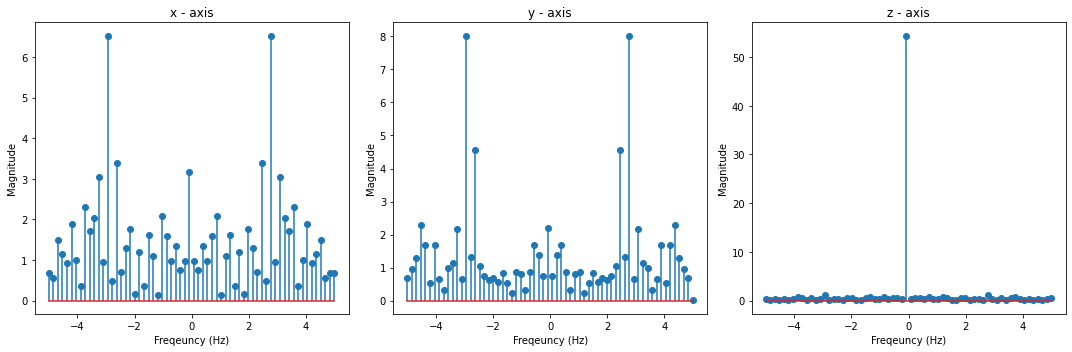

x
[0.33, -0.12, 0.27, -0.01, -0.23, 0.06, 0.34, -0.47, -0.25, 0.21, 0.0, -0.27, -0.32, 0.24, -0.6, 0.01, 0.37, -0.4, -0.31, 0.18, 0.2, -0.51, 0.14, 0.28, -0.28, -0.06, 0.43, 0.08, -0.63, 0.45, 0.22, -0.31, -0.04, 0.23, -0.1, -0.39, 0.18, 0.35, -0.52, -0.22, 0.18, 0.17, -0.63, 0.05, 0.04, -0.03, -0.07, -0.26, 0.13, -0.35, -0.05, 0.24, -0.05, -0.24, 0.1, 0.13, -0.3, -0.36, 0.13, 0.06, -0.41, -0.22, 0.24, 0.06]
[-0.02, 0.31, -0.33, -0.23, 0.34, -0.22, -0.33, -0.11, 0.24, -0.12, -0.2, 0.19, 0.11, -0.27, 0.0, 0.25, 0.14, -0.13, -0.27, 0.29, -0.21, -0.37, 0.12, 0.12, -0.28, -0.03, 0.27, -0.18, -0.16, 0.23, -0.09, -0.18, 0.22, 0.15, -0.36, -0.01, 0.44, 0.09, -0.46, -0.12, 0.32, -0.4, -0.27, 0.02, 0.24, -0.35, -0.45, 0.32, 0.0, -0.48, -0.23, 0.17, 0.0, -0.51, 0.29, 0.11, -0.03, -0.02, 0.08, -0.03, 0.03, 0.33, -0.24, 0.07]
[0.85, 0.88, 0.68, 0.85, 0.9, 0.84, 0.83, 0.87, 0.72, 0.83, 0.87, 0.86, 0.81, 0.82, 0.84, 0.86, 0.71, 0.8, 0.87, 0.9, 0.97, 1.01, 0.93, 0.83, 0.82, 0.97, 0.81, 0.8, 0.89, 0.8

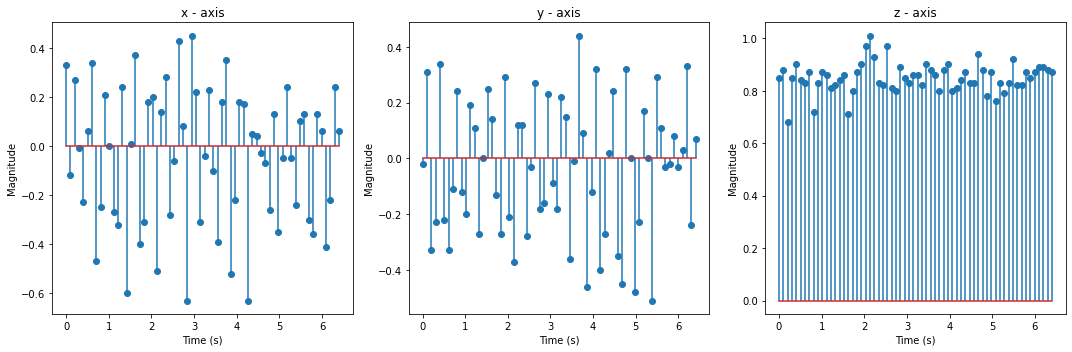

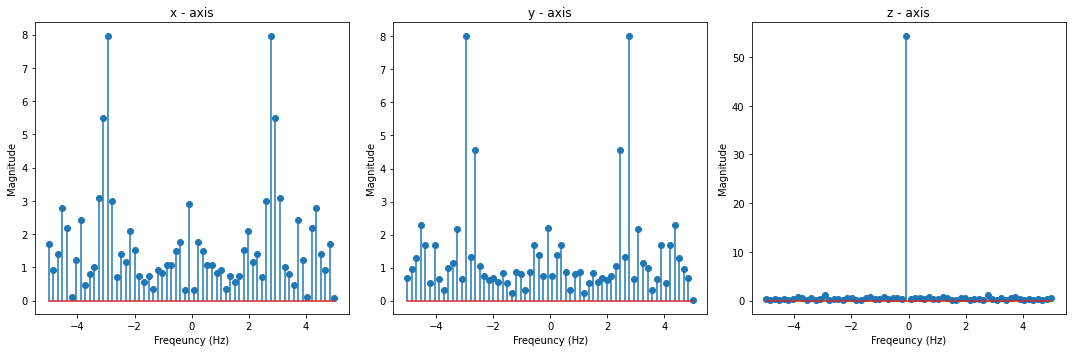

y
[0.33, -0.12, 0.27, -0.01, -0.23, 0.06, 0.34, -0.47, -0.25, 0.21, 0.0, -0.27, -0.32, 0.24, -0.6, 0.01, 0.37, -0.4, -0.31, 0.18, 0.2, -0.51, 0.14, 0.28, -0.28, -0.06, 0.43, 0.08, -0.63, 0.45, 0.22, -0.31, -0.04, 0.23, -0.1, -0.39, 0.18, 0.35, -0.52, -0.22, 0.18, 0.17, -0.63, 0.05, 0.04, -0.03, -0.07, -0.26, 0.13, -0.35, -0.05, 0.24, -0.05, -0.24, 0.1, 0.13, -0.3, -0.36, 0.13, 0.06, -0.41, -0.22, 0.24, 0.06]
[0.04, -0.21, -0.05, 0.16, 0.15, -0.29, 0.15, 0.09, -0.23, 0.01, 0.43, -0.29, -0.4, 0.41, 0.11, -0.39, -0.03, 0.39, -0.13, -0.24, 0.43, 0.18, -0.39, 0.12, 0.11, -0.02, -0.12, 0.37, -0.16, -0.25, -0.12, 0.34, -0.51, -0.16, 0.66, -0.27, -0.26, 0.42, -0.06, -0.22, -0.27, 0.38, -0.24, -0.18, -0.05, -0.0, -0.02, -0.45, 0.25, -0.05, -0.26, -0.17, 0.23, 0.0, -0.23, -0.01, 0.32, -0.17, -0.32, -0.3, 0.13, -0.35, -0.03, 0.24]
[0.85, 0.88, 0.68, 0.85, 0.9, 0.84, 0.83, 0.87, 0.72, 0.83, 0.87, 0.86, 0.81, 0.82, 0.84, 0.86, 0.71, 0.8, 0.87, 0.9, 0.97, 1.01, 0.93, 0.83, 0.82, 0.97, 0.81, 0.8, 0.8

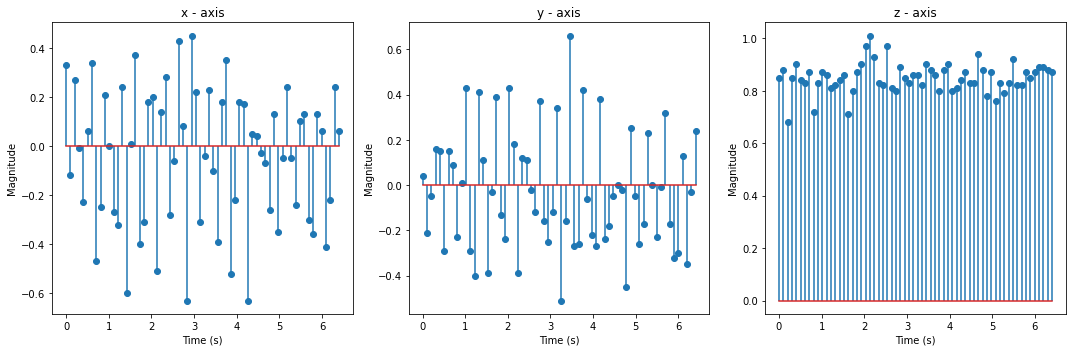

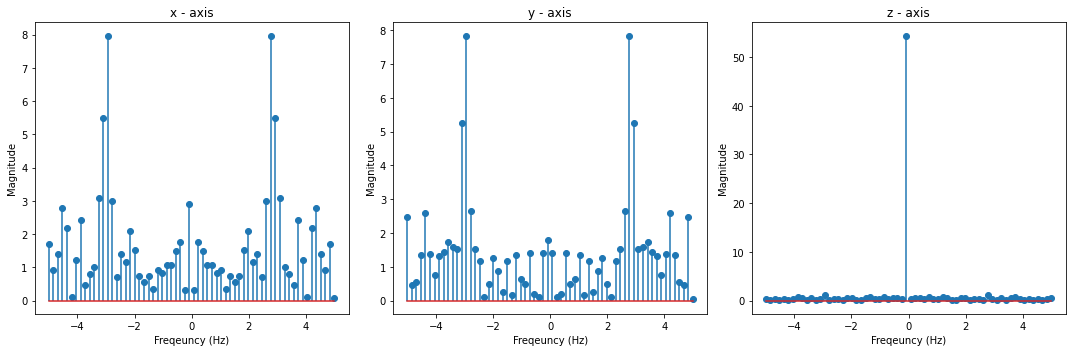

z
[0.33, -0.12, 0.27, -0.01, -0.23, 0.06, 0.34, -0.47, -0.25, 0.21, 0.0, -0.27, -0.32, 0.24, -0.6, 0.01, 0.37, -0.4, -0.31, 0.18, 0.2, -0.51, 0.14, 0.28, -0.28, -0.06, 0.43, 0.08, -0.63, 0.45, 0.22, -0.31, -0.04, 0.23, -0.1, -0.39, 0.18, 0.35, -0.52, -0.22, 0.18, 0.17, -0.63, 0.05, 0.04, -0.03, -0.07, -0.26, 0.13, -0.35, -0.05, 0.24, -0.05, -0.24, 0.1, 0.13, -0.3, -0.36, 0.13, 0.06, -0.41, -0.22, 0.24, 0.06]
[0.04, -0.21, -0.05, 0.16, 0.15, -0.29, 0.15, 0.09, -0.23, 0.01, 0.43, -0.29, -0.4, 0.41, 0.11, -0.39, -0.03, 0.39, -0.13, -0.24, 0.43, 0.18, -0.39, 0.12, 0.11, -0.02, -0.12, 0.37, -0.16, -0.25, -0.12, 0.34, -0.51, -0.16, 0.66, -0.27, -0.26, 0.42, -0.06, -0.22, -0.27, 0.38, -0.24, -0.18, -0.05, -0.0, -0.02, -0.45, 0.25, -0.05, -0.26, -0.17, 0.23, 0.0, -0.23, -0.01, 0.32, -0.17, -0.32, -0.3, 0.13, -0.35, -0.03, 0.24]
[0.88, 0.83, 0.86, 0.95, 0.84, 0.86, 0.84, 0.74, 0.95, 0.86, 0.85, 0.85, 0.82, 0.84, 0.85, 0.86, 0.88, 0.86, 0.81, 0.87, 0.96, 0.64, 0.86, 0.85, 0.83, 0.84, 0.9, 0.85, 

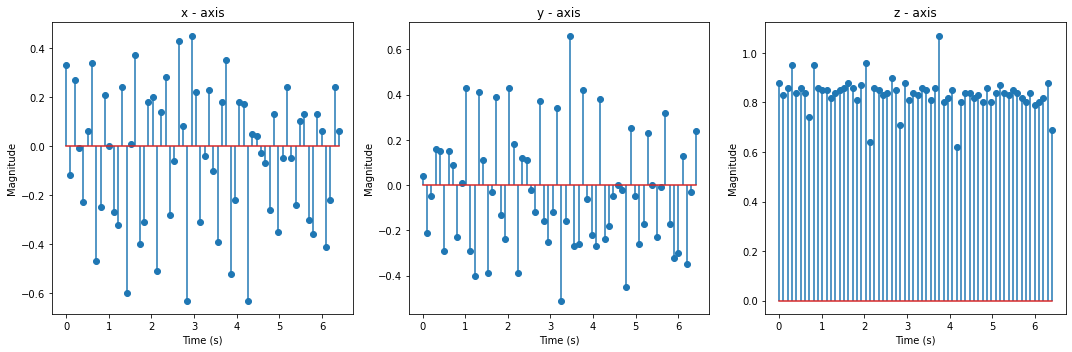

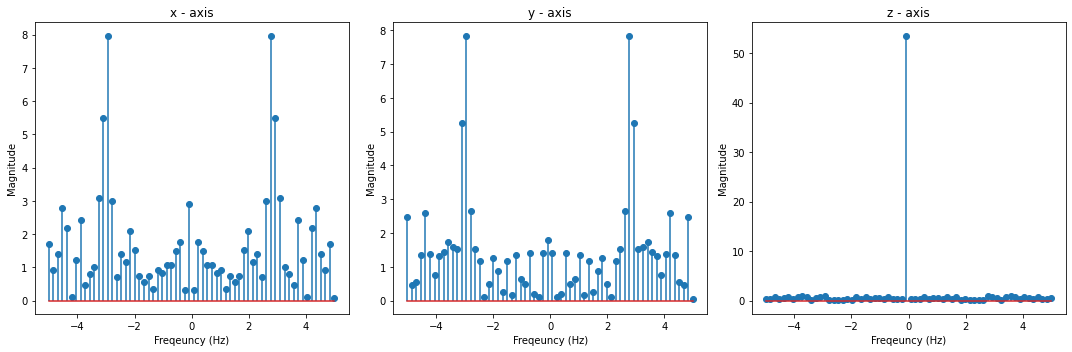

x
[0.09, -0.06, 0.1, -0.28, -0.46, 0.31, 0.35, -0.6, 0.18, 0.24, -0.0, -0.53, 0.24, 0.09, -0.47, -0.25, 0.24, -0.02, -0.59, 0.22, 0.06, -0.42, -0.28, 0.35, -0.3, -0.3, 0.33, 0.26, -0.59, 0.12, 0.27, -0.27, -0.36, 0.13, 0.24, -0.31, -0.46, 0.34, 0.02, -0.33, -0.06, 0.23, -0.38, -0.37, 0.29, -0.31, -0.56, 0.16, 0.16, -0.36, -0.28, 0.26, -0.05, -0.43, 0.03, 0.26, -0.29, -0.38, 0.12, 0.19, -0.4, -0.04, 0.22, -0.23]
[0.04, -0.21, -0.05, 0.16, 0.15, -0.29, 0.15, 0.09, -0.23, 0.01, 0.43, -0.29, -0.4, 0.41, 0.11, -0.39, -0.03, 0.39, -0.13, -0.24, 0.43, 0.18, -0.39, 0.12, 0.11, -0.02, -0.12, 0.37, -0.16, -0.25, -0.12, 0.34, -0.51, -0.16, 0.66, -0.27, -0.26, 0.42, -0.06, -0.22, -0.27, 0.38, -0.24, -0.18, -0.05, -0.0, -0.02, -0.45, 0.25, -0.05, -0.26, -0.17, 0.23, 0.0, -0.23, -0.01, 0.32, -0.17, -0.32, -0.3, 0.13, -0.35, -0.03, 0.24]
[0.88, 0.83, 0.86, 0.95, 0.84, 0.86, 0.84, 0.74, 0.95, 0.86, 0.85, 0.85, 0.82, 0.84, 0.85, 0.86, 0.88, 0.86, 0.81, 0.87, 0.96, 0.64, 0.86, 0.85, 0.83, 0.84, 0.9, 0.8

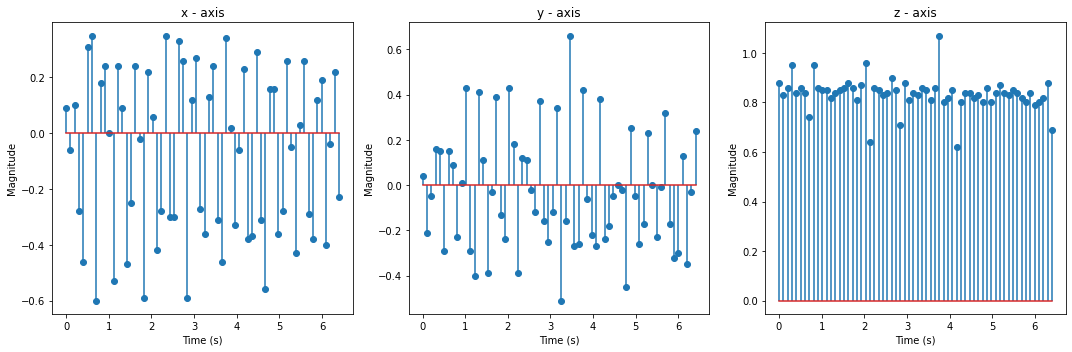

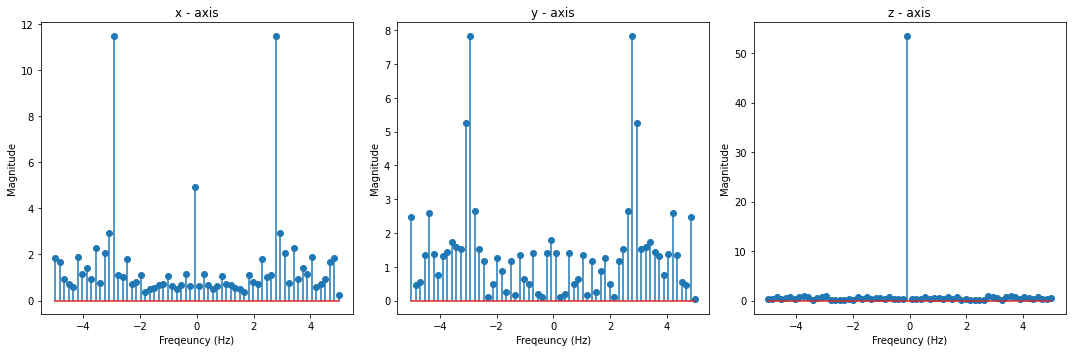

y
[0.09, -0.06, 0.1, -0.28, -0.46, 0.31, 0.35, -0.6, 0.18, 0.24, -0.0, -0.53, 0.24, 0.09, -0.47, -0.25, 0.24, -0.02, -0.59, 0.22, 0.06, -0.42, -0.28, 0.35, -0.3, -0.3, 0.33, 0.26, -0.59, 0.12, 0.27, -0.27, -0.36, 0.13, 0.24, -0.31, -0.46, 0.34, 0.02, -0.33, -0.06, 0.23, -0.38, -0.37, 0.29, -0.31, -0.56, 0.16, 0.16, -0.36, -0.28, 0.26, -0.05, -0.43, 0.03, 0.26, -0.29, -0.38, 0.12, 0.19, -0.4, -0.04, 0.22, -0.23]
[0.21, -0.23, -0.05, 0.22, -0.25, -0.26, 0.22, 0.04, -0.3, 0.09, 0.37, -0.29, -0.21, 0.27, 0.04, -0.3, -0.21, 0.33, -0.15, -0.35, -0.11, 0.16, -0.3, -0.11, 0.22, -0.08, -0.28, 0.2, 0.07, -0.55, 0.08, 0.29, -0.31, -0.22, 0.26, 0.15, -0.22, -0.13, 0.27, -0.26, -0.15, 0.08, -0.01, -0.39, 0.02, 0.27, 0.08, -0.35, 0.34, 0.14, -0.39, -0.07, 0.36, 0.13, -0.4, 0.03, 0.2, -0.15, -0.21, 0.29, 0.08, -0.32, 0.01, 0.2]
[0.88, 0.83, 0.86, 0.95, 0.84, 0.86, 0.84, 0.74, 0.95, 0.86, 0.85, 0.85, 0.82, 0.84, 0.85, 0.86, 0.88, 0.86, 0.81, 0.87, 0.96, 0.64, 0.86, 0.85, 0.83, 0.84, 0.9, 0.85, 0.71, 0

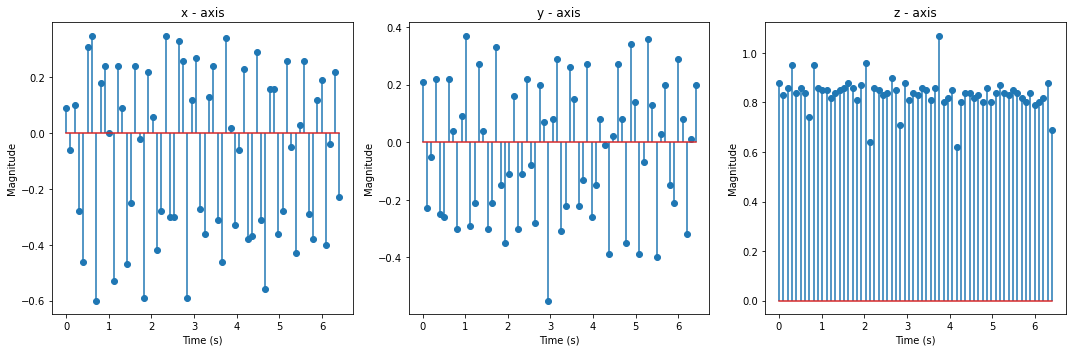

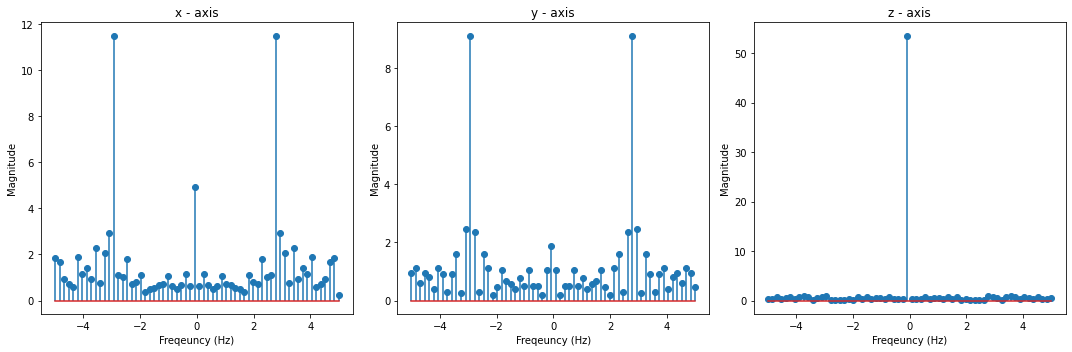

z
[0.09, -0.06, 0.1, -0.28, -0.46, 0.31, 0.35, -0.6, 0.18, 0.24, -0.0, -0.53, 0.24, 0.09, -0.47, -0.25, 0.24, -0.02, -0.59, 0.22, 0.06, -0.42, -0.28, 0.35, -0.3, -0.3, 0.33, 0.26, -0.59, 0.12, 0.27, -0.27, -0.36, 0.13, 0.24, -0.31, -0.46, 0.34, 0.02, -0.33, -0.06, 0.23, -0.38, -0.37, 0.29, -0.31, -0.56, 0.16, 0.16, -0.36, -0.28, 0.26, -0.05, -0.43, 0.03, 0.26, -0.29, -0.38, 0.12, 0.19, -0.4, -0.04, 0.22, -0.23]
[0.21, -0.23, -0.05, 0.22, -0.25, -0.26, 0.22, 0.04, -0.3, 0.09, 0.37, -0.29, -0.21, 0.27, 0.04, -0.3, -0.21, 0.33, -0.15, -0.35, -0.11, 0.16, -0.3, -0.11, 0.22, -0.08, -0.28, 0.2, 0.07, -0.55, 0.08, 0.29, -0.31, -0.22, 0.26, 0.15, -0.22, -0.13, 0.27, -0.26, -0.15, 0.08, -0.01, -0.39, 0.02, 0.27, 0.08, -0.35, 0.34, 0.14, -0.39, -0.07, 0.36, 0.13, -0.4, 0.03, 0.2, -0.15, -0.21, 0.29, 0.08, -0.32, 0.01, 0.2]
[0.67, 0.84, 0.89, 0.86, 0.69, 0.86, 0.82, 0.74, 0.87, 0.87, 0.82, 0.81, 0.88, 0.85, 0.8, 0.83, 0.89, 0.87, 0.8, 0.87, 0.94, 0.81, 0.81, 0.88, 0.83, 0.82, 0.87, 0.88, 0.78, 0.

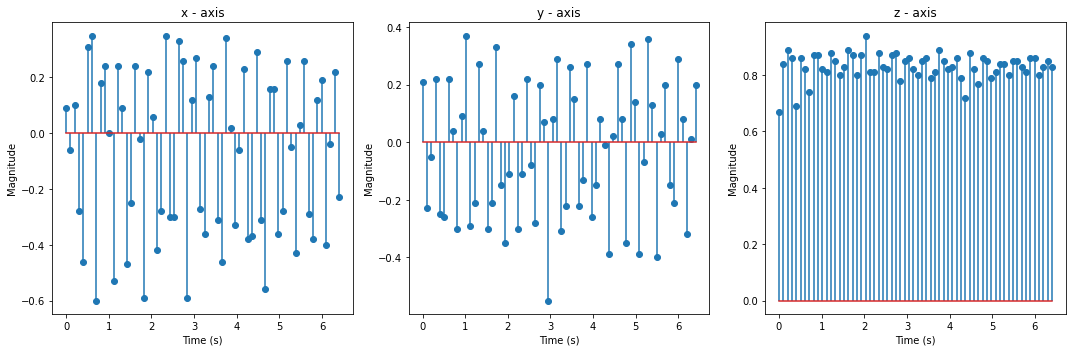

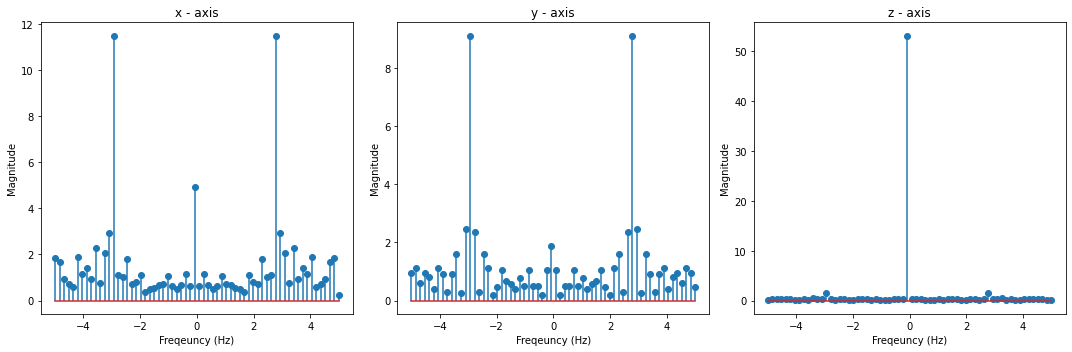

x
[-0.24, 0.3, -0.24, -0.26, 0.26, -0.04, -0.29, 0.08, 0.17, -0.26, 0.08, 0.03, -0.22, -0.1, 0.24, -0.35, -0.27, 0.12, -0.31, 0.19, 0.03, -0.42, 0.08, 0.23, -0.16, -0.38, 0.22, 0.28, -0.63, -0.01, 0.18, -0.17, -0.47, 0.19, 0.25, -0.51, -0.54, 0.29, 0.16, -0.43, 0.16, 0.22, -0.26, -0.25, 0.19, 0.32, -0.35, -0.36, 0.27, -0.05, -0.38, 0.43, 0.17, -0.15, -0.36, 0.36, 0.13, -0.47, 0.07, 0.3, -0.17, -0.31, 0.24, 0.08]
[0.21, -0.23, -0.05, 0.22, -0.25, -0.26, 0.22, 0.04, -0.3, 0.09, 0.37, -0.29, -0.21, 0.27, 0.04, -0.3, -0.21, 0.33, -0.15, -0.35, -0.11, 0.16, -0.3, -0.11, 0.22, -0.08, -0.28, 0.2, 0.07, -0.55, 0.08, 0.29, -0.31, -0.22, 0.26, 0.15, -0.22, -0.13, 0.27, -0.26, -0.15, 0.08, -0.01, -0.39, 0.02, 0.27, 0.08, -0.35, 0.34, 0.14, -0.39, -0.07, 0.36, 0.13, -0.4, 0.03, 0.2, -0.15, -0.21, 0.29, 0.08, -0.32, 0.01, 0.2]
[0.67, 0.84, 0.89, 0.86, 0.69, 0.86, 0.82, 0.74, 0.87, 0.87, 0.82, 0.81, 0.88, 0.85, 0.8, 0.83, 0.89, 0.87, 0.8, 0.87, 0.94, 0.81, 0.81, 0.88, 0.83, 0.82, 0.87, 0.88, 0.78, 0

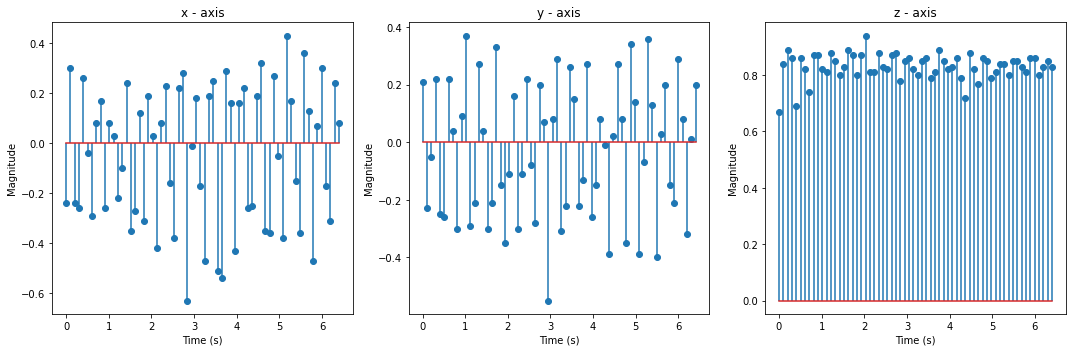

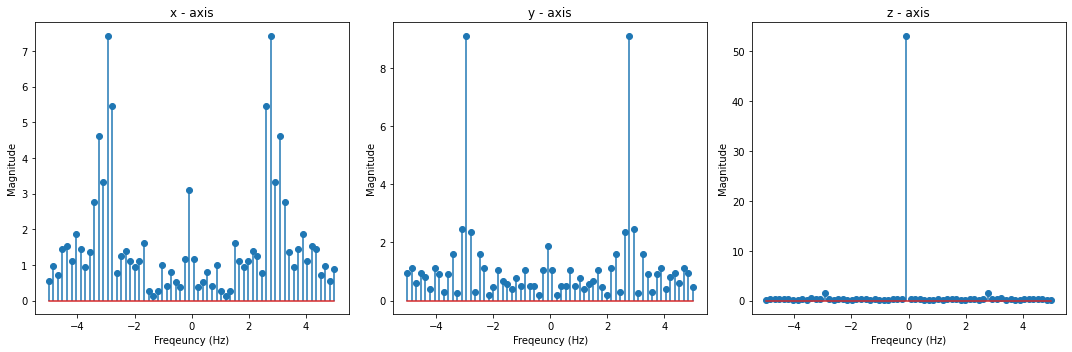

y
[-0.24, 0.3, -0.24, -0.26, 0.26, -0.04, -0.29, 0.08, 0.17, -0.26, 0.08, 0.03, -0.22, -0.1, 0.24, -0.35, -0.27, 0.12, -0.31, 0.19, 0.03, -0.42, 0.08, 0.23, -0.16, -0.38, 0.22, 0.28, -0.63, -0.01, 0.18, -0.17, -0.47, 0.19, 0.25, -0.51, -0.54, 0.29, 0.16, -0.43, 0.16, 0.22, -0.26, -0.25, 0.19, 0.32, -0.35, -0.36, 0.27, -0.05, -0.38, 0.43, 0.17, -0.15, -0.36, 0.36, 0.13, -0.47, 0.07, 0.3, -0.17, -0.31, 0.24, 0.08]
[0.19, 0.1, 0.24, -0.27, -0.08, 0.27, -0.11, -0.16, 0.29, -0.14, -0.27, 0.37, 0.05, -0.29, 0.23, -0.08, -0.26, 0.5, -0.26, -0.21, 0.25, 0.04, -0.38, 0.24, 0.31, -0.2, -0.27, 0.32, -0.11, -0.49, 0.08, 0.36, -0.39, -0.21, 0.35, -0.05, -0.38, 0.05, 0.55, -0.28, -0.48, 0.13, 0.28, -0.19, -0.29, 0.44, 0.16, -0.5, -0.01, 0.35, -0.2, -0.21, 0.33, 0.16, -0.39, -0.07, 0.39, -0.07, -0.51, 0.1, 0.29, -0.27, -0.22, 0.42]
[0.67, 0.84, 0.89, 0.86, 0.69, 0.86, 0.82, 0.74, 0.87, 0.87, 0.82, 0.81, 0.88, 0.85, 0.8, 0.83, 0.89, 0.87, 0.8, 0.87, 0.94, 0.81, 0.81, 0.88, 0.83, 0.82, 0.87, 0.88, 0.78

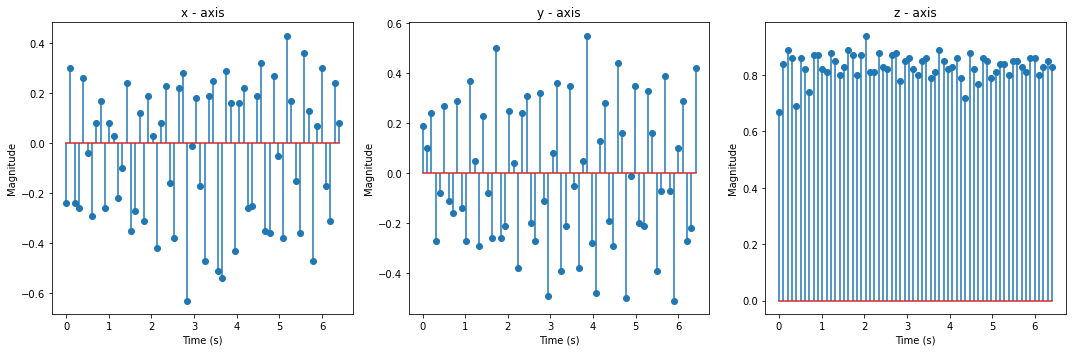

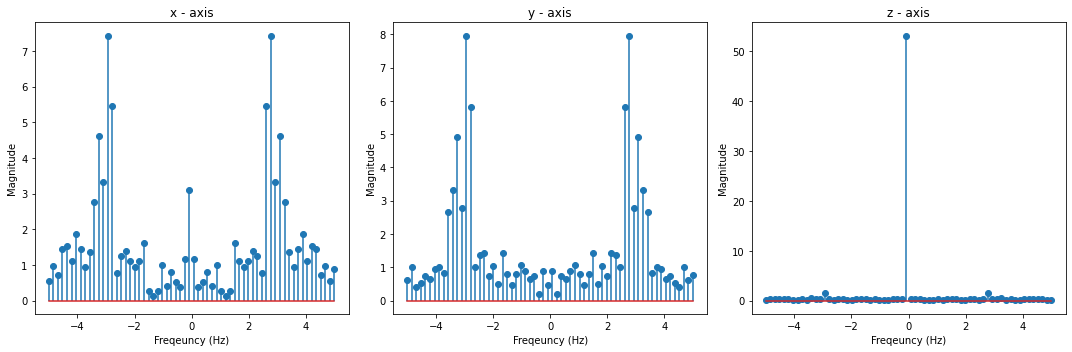

z
[-0.24, 0.3, -0.24, -0.26, 0.26, -0.04, -0.29, 0.08, 0.17, -0.26, 0.08, 0.03, -0.22, -0.1, 0.24, -0.35, -0.27, 0.12, -0.31, 0.19, 0.03, -0.42, 0.08, 0.23, -0.16, -0.38, 0.22, 0.28, -0.63, -0.01, 0.18, -0.17, -0.47, 0.19, 0.25, -0.51, -0.54, 0.29, 0.16, -0.43, 0.16, 0.22, -0.26, -0.25, 0.19, 0.32, -0.35, -0.36, 0.27, -0.05, -0.38, 0.43, 0.17, -0.15, -0.36, 0.36, 0.13, -0.47, 0.07, 0.3, -0.17, -0.31, 0.24, 0.08]
[0.19, 0.1, 0.24, -0.27, -0.08, 0.27, -0.11, -0.16, 0.29, -0.14, -0.27, 0.37, 0.05, -0.29, 0.23, -0.08, -0.26, 0.5, -0.26, -0.21, 0.25, 0.04, -0.38, 0.24, 0.31, -0.2, -0.27, 0.32, -0.11, -0.49, 0.08, 0.36, -0.39, -0.21, 0.35, -0.05, -0.38, 0.05, 0.55, -0.28, -0.48, 0.13, 0.28, -0.19, -0.29, 0.44, 0.16, -0.5, -0.01, 0.35, -0.2, -0.21, 0.33, 0.16, -0.39, -0.07, 0.39, -0.07, -0.51, 0.1, 0.29, -0.27, -0.22, 0.42]
[0.82, 0.87, 0.84, 0.82, 0.87, 0.84, 0.83, 0.84, 0.86, 0.82, 0.85, 0.84, 0.82, 0.83, 0.86, 0.81, 0.82, 0.86, 0.81, 0.86, 0.84, 0.79, 0.85, 0.88, 0.83, 0.8, 0.84, 0.82, 0.8

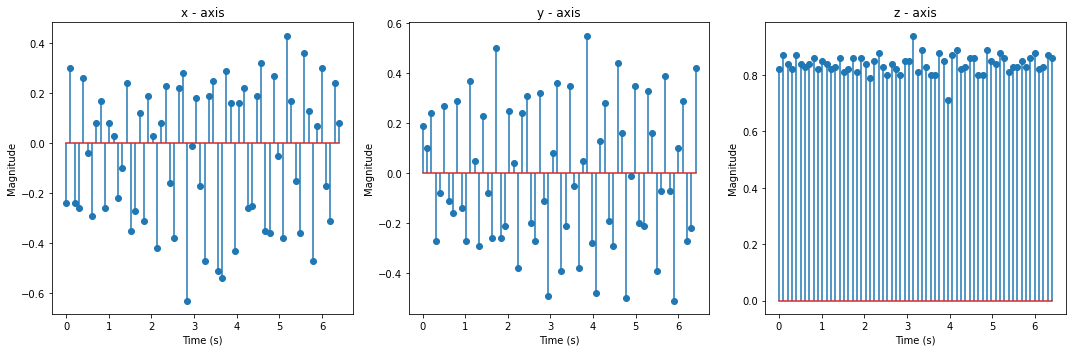

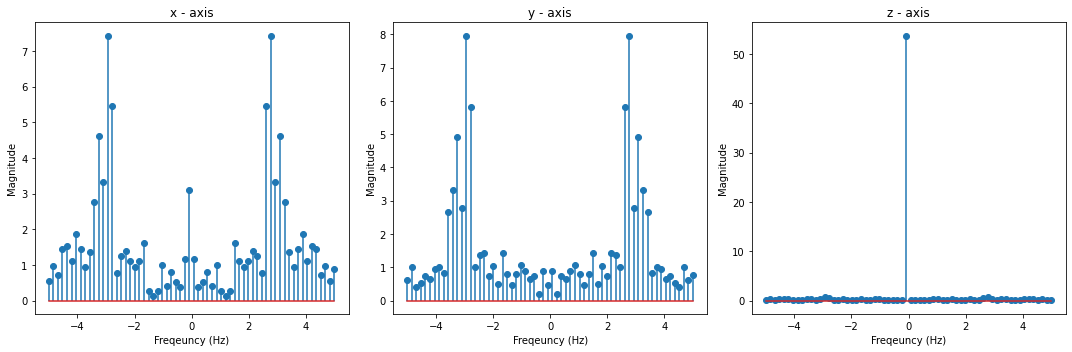

x
[0.09, -0.37, 0.15, 0.25, -0.29, -0.47, 0.14, 0.04, -0.13, -0.51, 0.19, 0.13, -0.43, -0.35, 0.23, 0.03, -0.48, -0.14, 0.24, 0.16, -0.31, 0.2, 0.26, -0.22, -0.34, 0.32, 0.11, -0.02, -0.13, 0.33, 0.14, -0.39, -0.47, 0.15, 0.16, -0.4, -0.42, 0.17, -0.02, -0.41, -0.27, 0.16, -0.23, -0.32, 0.29, 0.2, -0.18, -0.23, 0.14, 0.17, -0.43, -0.4, 0.28, 0.16, -0.37, -0.42, 0.25, 0.12, -0.49, -0.04, 0.31, 0.03, -0.41, 0.24]
[0.19, 0.1, 0.24, -0.27, -0.08, 0.27, -0.11, -0.16, 0.29, -0.14, -0.27, 0.37, 0.05, -0.29, 0.23, -0.08, -0.26, 0.5, -0.26, -0.21, 0.25, 0.04, -0.38, 0.24, 0.31, -0.2, -0.27, 0.32, -0.11, -0.49, 0.08, 0.36, -0.39, -0.21, 0.35, -0.05, -0.38, 0.05, 0.55, -0.28, -0.48, 0.13, 0.28, -0.19, -0.29, 0.44, 0.16, -0.5, -0.01, 0.35, -0.2, -0.21, 0.33, 0.16, -0.39, -0.07, 0.39, -0.07, -0.51, 0.1, 0.29, -0.27, -0.22, 0.42]
[0.82, 0.87, 0.84, 0.82, 0.87, 0.84, 0.83, 0.84, 0.86, 0.82, 0.85, 0.84, 0.82, 0.83, 0.86, 0.81, 0.82, 0.86, 0.81, 0.86, 0.84, 0.79, 0.85, 0.88, 0.83, 0.8, 0.84, 0.82, 0.8,

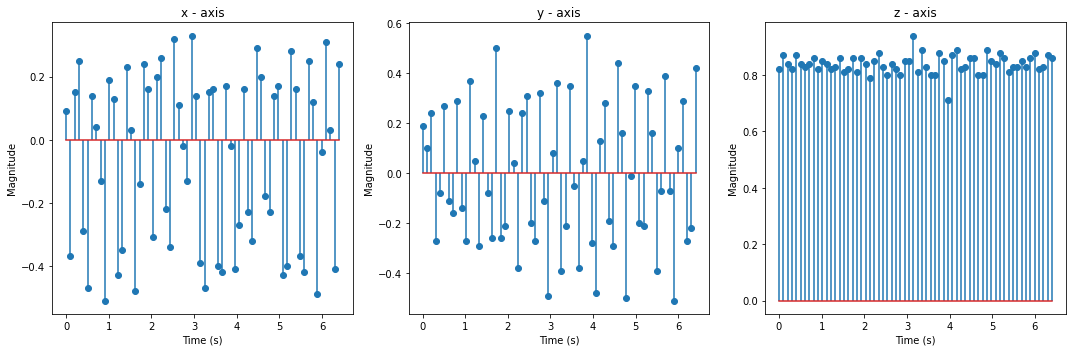

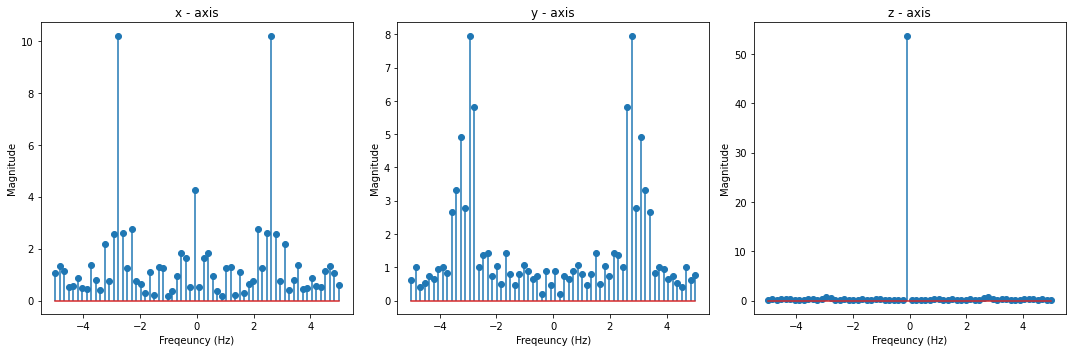

y
[0.09, -0.37, 0.15, 0.25, -0.29, -0.47, 0.14, 0.04, -0.13, -0.51, 0.19, 0.13, -0.43, -0.35, 0.23, 0.03, -0.48, -0.14, 0.24, 0.16, -0.31, 0.2, 0.26, -0.22, -0.34, 0.32, 0.11, -0.02, -0.13, 0.33, 0.14, -0.39, -0.47, 0.15, 0.16, -0.4, -0.42, 0.17, -0.02, -0.41, -0.27, 0.16, -0.23, -0.32, 0.29, 0.2, -0.18, -0.23, 0.14, 0.17, -0.43, -0.4, 0.28, 0.16, -0.37, -0.42, 0.25, 0.12, -0.49, -0.04, 0.31, 0.03, -0.41, 0.24]
[0.42, -0.19, -0.23, 0.35, 0.14, -0.35, -0.22, 0.5, -0.05, -0.61, -0.23, 0.46, -0.24, -0.43, -0.01, 0.3, 0.04, -0.52, -0.02, 0.39, -0.16, -0.49, 0.2, 0.36, -0.23, -0.22, -0.08, 0.42, -0.41, -0.28, 0.4, -0.13, -0.33, -0.19, 0.35, -0.02, -0.31, 0.74, 0.35, -0.14, -0.46, -0.18, 0.27, 0.21, -0.38, 0.08, 0.33, -0.35, -0.19, 0.37, 0.08, -0.4, -0.2, 0.34, 0.12, -0.47, -0.13, 0.47, -0.05, -0.51, 0.01, 0.39, -0.18, -0.35]
[0.82, 0.87, 0.84, 0.82, 0.87, 0.84, 0.83, 0.84, 0.86, 0.82, 0.85, 0.84, 0.82, 0.83, 0.86, 0.81, 0.82, 0.86, 0.81, 0.86, 0.84, 0.79, 0.85, 0.88, 0.83, 0.8, 0.84, 0.82, 

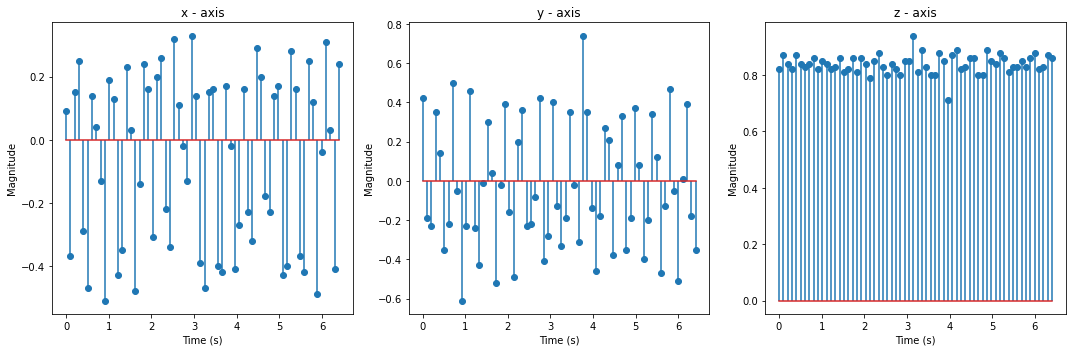

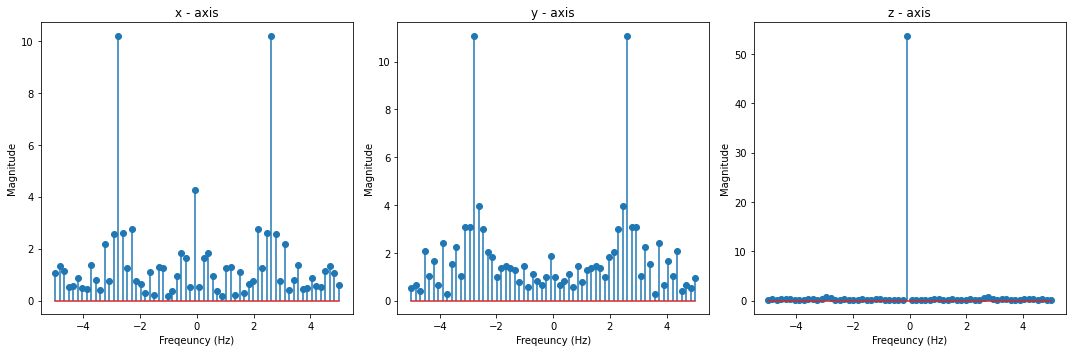

z
[0.09, -0.37, 0.15, 0.25, -0.29, -0.47, 0.14, 0.04, -0.13, -0.51, 0.19, 0.13, -0.43, -0.35, 0.23, 0.03, -0.48, -0.14, 0.24, 0.16, -0.31, 0.2, 0.26, -0.22, -0.34, 0.32, 0.11, -0.02, -0.13, 0.33, 0.14, -0.39, -0.47, 0.15, 0.16, -0.4, -0.42, 0.17, -0.02, -0.41, -0.27, 0.16, -0.23, -0.32, 0.29, 0.2, -0.18, -0.23, 0.14, 0.17, -0.43, -0.4, 0.28, 0.16, -0.37, -0.42, 0.25, 0.12, -0.49, -0.04, 0.31, 0.03, -0.41, 0.24]
[0.42, -0.19, -0.23, 0.35, 0.14, -0.35, -0.22, 0.5, -0.05, -0.61, -0.23, 0.46, -0.24, -0.43, -0.01, 0.3, 0.04, -0.52, -0.02, 0.39, -0.16, -0.49, 0.2, 0.36, -0.23, -0.22, -0.08, 0.42, -0.41, -0.28, 0.4, -0.13, -0.33, -0.19, 0.35, -0.02, -0.31, 0.74, 0.35, -0.14, -0.46, -0.18, 0.27, 0.21, -0.38, 0.08, 0.33, -0.35, -0.19, 0.37, 0.08, -0.4, -0.2, 0.34, 0.12, -0.47, -0.13, 0.47, -0.05, -0.51, 0.01, 0.39, -0.18, -0.35]
[0.84, 0.81, 0.86, 0.88, 0.8, 0.81, 0.89, 0.83, 0.83, 0.72, 0.87, 0.87, 0.8, 0.8, 0.87, 0.85, 0.81, 0.83, 0.86, 0.91, 0.83, 0.86, 0.87, 0.84, 0.79, 0.87, 0.86, 0.84, 0.

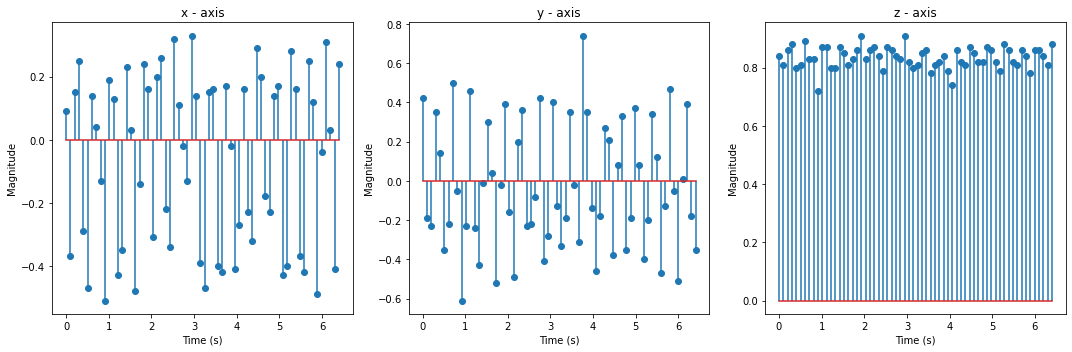

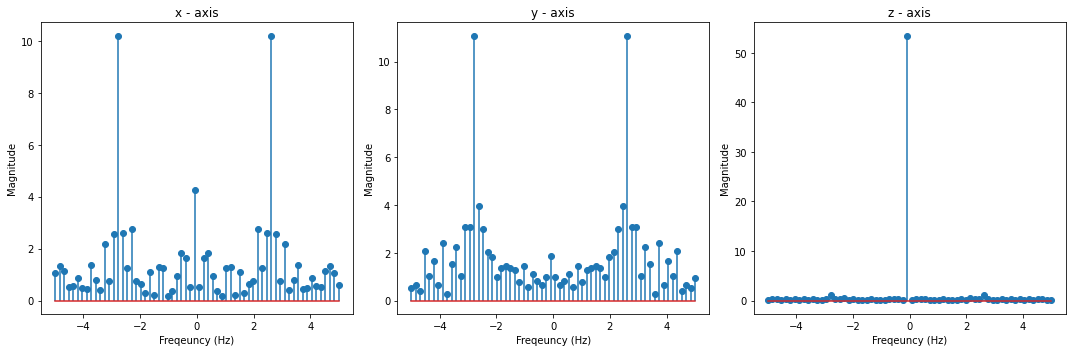

x
[0.26, -0.48, -0.37, 0.27, -0.03, -0.46, 0.08, 0.33, -0.26, -0.29, 0.19, 0.08, -0.45, -0.13, 0.4, -0.08, -0.43, 0.23, 0.1, -0.39, -0.1, 0.29, 0.07, -0.35, 0.09, 0.28, -0.14, -0.4, 0.43, 0.15, -0.34, -0.41, 0.26, 0.26, -0.6, -0.21, 0.33, -0.08, -0.46, 0.07, 0.29, -0.15, -0.31, 0.3, 0.41, -0.57, -0.58, 0.31, 0.11, -0.46, -0.21, 0.3, -0.09, -0.55, 0.42, 0.28, -0.45, -0.39, 0.27, 0.14, -0.5, -0.27, 0.49, 0.08]
[0.42, -0.19, -0.23, 0.35, 0.14, -0.35, -0.22, 0.5, -0.05, -0.61, -0.23, 0.46, -0.24, -0.43, -0.01, 0.3, 0.04, -0.52, -0.02, 0.39, -0.16, -0.49, 0.2, 0.36, -0.23, -0.22, -0.08, 0.42, -0.41, -0.28, 0.4, -0.13, -0.33, -0.19, 0.35, -0.02, -0.31, 0.74, 0.35, -0.14, -0.46, -0.18, 0.27, 0.21, -0.38, 0.08, 0.33, -0.35, -0.19, 0.37, 0.08, -0.4, -0.2, 0.34, 0.12, -0.47, -0.13, 0.47, -0.05, -0.51, 0.01, 0.39, -0.18, -0.35]
[0.84, 0.81, 0.86, 0.88, 0.8, 0.81, 0.89, 0.83, 0.83, 0.72, 0.87, 0.87, 0.8, 0.8, 0.87, 0.85, 0.81, 0.83, 0.86, 0.91, 0.83, 0.86, 0.87, 0.84, 0.79, 0.87, 0.86, 0.84, 0.83,

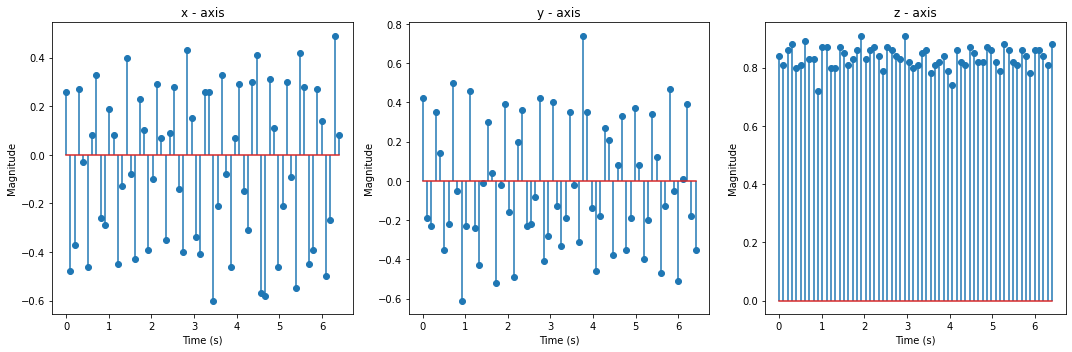

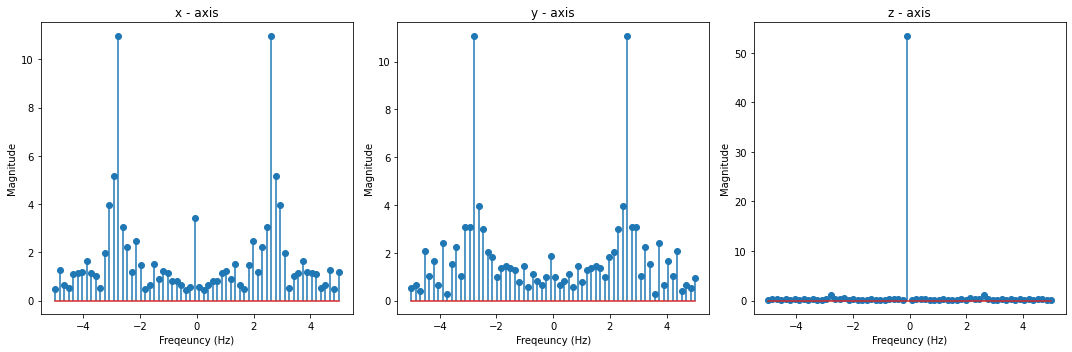

y
[0.26, -0.48, -0.37, 0.27, -0.03, -0.46, 0.08, 0.33, -0.26, -0.29, 0.19, 0.08, -0.45, -0.13, 0.4, -0.08, -0.43, 0.23, 0.1, -0.39, -0.1, 0.29, 0.07, -0.35, 0.09, 0.28, -0.14, -0.4, 0.43, 0.15, -0.34, -0.41, 0.26, 0.26, -0.6, -0.21, 0.33, -0.08, -0.46, 0.07, 0.29, -0.15, -0.31, 0.3, 0.41, -0.57, -0.58, 0.31, 0.11, -0.46, -0.21, 0.3, -0.09, -0.55, 0.42, 0.28, -0.45, -0.39, 0.27, 0.14, -0.5, -0.27, 0.49, 0.08]
[-0.35, 0.22, -0.33, -0.23, 0.51, 0.05, -0.51, 0.19, 0.28, -0.33, -0.28, 0.44, 0.1, -0.49, -0.0, 0.42, -0.12, -0.34, 0.38, 0.1, -0.5, -0.07, 0.41, -0.21, -0.45, 0.24, 0.35, -0.26, -0.25, 0.27, 0.18, -0.44, -0.3, 0.47, -0.03, -0.52, -0.08, 0.44, -0.09, -0.52, 0.01, 0.38, -0.25, -0.33, 0.34, 0.27, -0.42, -0.21, 0.54, -0.06, -0.63, 0.21, 0.35, -0.3, -0.42, 0.31, 0.17, -0.38, -0.41, 0.22, -0.04, -0.41, -0.44, 0.45]
[0.84, 0.81, 0.86, 0.88, 0.8, 0.81, 0.89, 0.83, 0.83, 0.72, 0.87, 0.87, 0.8, 0.8, 0.87, 0.85, 0.81, 0.83, 0.86, 0.91, 0.83, 0.86, 0.87, 0.84, 0.79, 0.87, 0.86, 0.84, 0.83, 0

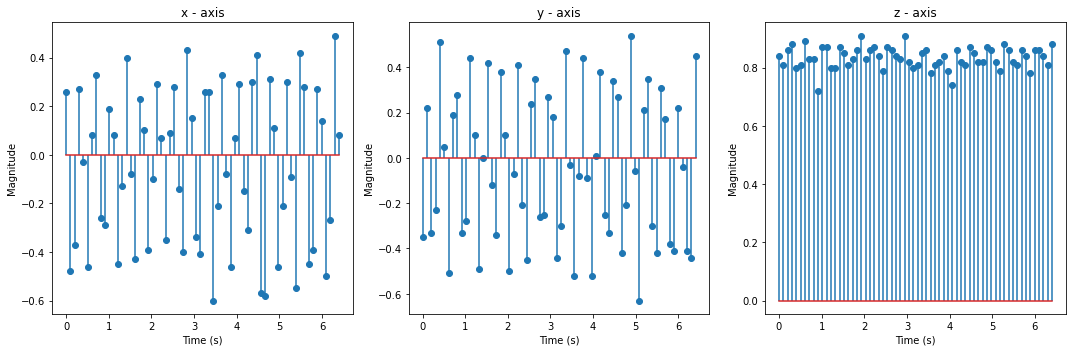

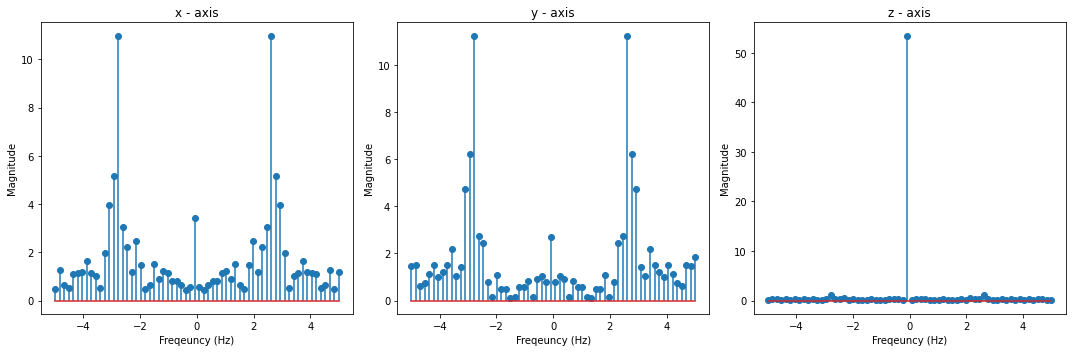

z
[0.26, -0.48, -0.37, 0.27, -0.03, -0.46, 0.08, 0.33, -0.26, -0.29, 0.19, 0.08, -0.45, -0.13, 0.4, -0.08, -0.43, 0.23, 0.1, -0.39, -0.1, 0.29, 0.07, -0.35, 0.09, 0.28, -0.14, -0.4, 0.43, 0.15, -0.34, -0.41, 0.26, 0.26, -0.6, -0.21, 0.33, -0.08, -0.46, 0.07, 0.29, -0.15, -0.31, 0.3, 0.41, -0.57, -0.58, 0.31, 0.11, -0.46, -0.21, 0.3, -0.09, -0.55, 0.42, 0.28, -0.45, -0.39, 0.27, 0.14, -0.5, -0.27, 0.49, 0.08]
[-0.35, 0.22, -0.33, -0.23, 0.51, 0.05, -0.51, 0.19, 0.28, -0.33, -0.28, 0.44, 0.1, -0.49, -0.0, 0.42, -0.12, -0.34, 0.38, 0.1, -0.5, -0.07, 0.41, -0.21, -0.45, 0.24, 0.35, -0.26, -0.25, 0.27, 0.18, -0.44, -0.3, 0.47, -0.03, -0.52, -0.08, 0.44, -0.09, -0.52, 0.01, 0.38, -0.25, -0.33, 0.34, 0.27, -0.42, -0.21, 0.54, -0.06, -0.63, 0.21, 0.35, -0.3, -0.42, 0.31, 0.17, -0.38, -0.41, 0.22, -0.04, -0.41, -0.44, 0.45]
[0.87, 0.78, 0.82, 0.86, 0.85, 0.79, 0.88, 0.84, 0.81, 0.82, 0.86, 0.85, 0.8, 0.85, 0.88, 0.84, 0.82, 0.87, 0.85, 0.8, 0.83, 0.87, 0.86, 0.8, 0.86, 0.86, 0.83, 0.79, 0.88, 0

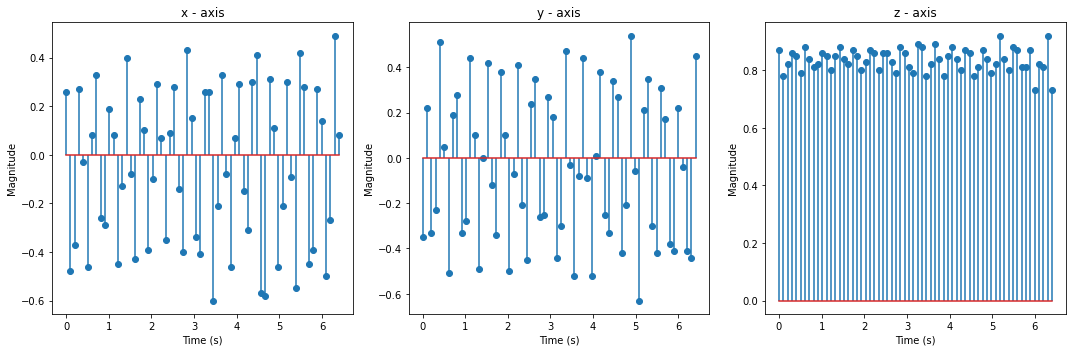

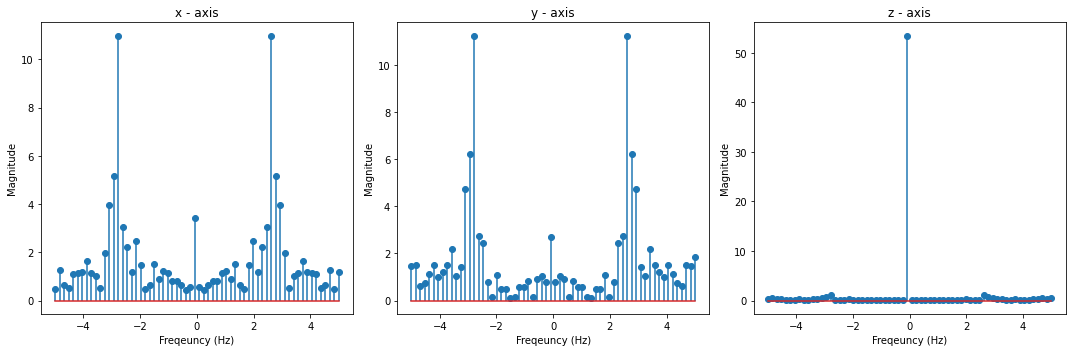

x
[0.08, 0.26, 0.21, -0.32, -0.41, 0.21, 0.26, -0.51, -0.35, 0.35, 0.11, -0.54, -0.29, 0.33, -0.06, -0.39, 0.32, 0.34, -0.35, -0.52, 0.48, 0.07, -0.47, 0.3, 0.24, -0.02, -0.43, 0.08, 0.33, -0.04, -0.32, 0.33, 0.27, -0.6, -0.17, 0.39, 0.32, -0.69, 0.02, 0.21, 0.13, -0.48, 0.0, 0.18, -0.14, -0.46, 0.11, 0.3, -0.41, -0.33, 0.34, 0.28, -0.5, -0.29, 0.24, 0.16, -0.65, 0.19, 0.43, -0.41, -0.7, 0.39, 0.47, -0.5]
[-0.35, 0.22, -0.33, -0.23, 0.51, 0.05, -0.51, 0.19, 0.28, -0.33, -0.28, 0.44, 0.1, -0.49, -0.0, 0.42, -0.12, -0.34, 0.38, 0.1, -0.5, -0.07, 0.41, -0.21, -0.45, 0.24, 0.35, -0.26, -0.25, 0.27, 0.18, -0.44, -0.3, 0.47, -0.03, -0.52, -0.08, 0.44, -0.09, -0.52, 0.01, 0.38, -0.25, -0.33, 0.34, 0.27, -0.42, -0.21, 0.54, -0.06, -0.63, 0.21, 0.35, -0.3, -0.42, 0.31, 0.17, -0.38, -0.41, 0.22, -0.04, -0.41, -0.44, 0.45]
[0.87, 0.78, 0.82, 0.86, 0.85, 0.79, 0.88, 0.84, 0.81, 0.82, 0.86, 0.85, 0.8, 0.85, 0.88, 0.84, 0.82, 0.87, 0.85, 0.8, 0.83, 0.87, 0.86, 0.8, 0.86, 0.86, 0.83, 0.79, 0.88, 0.86

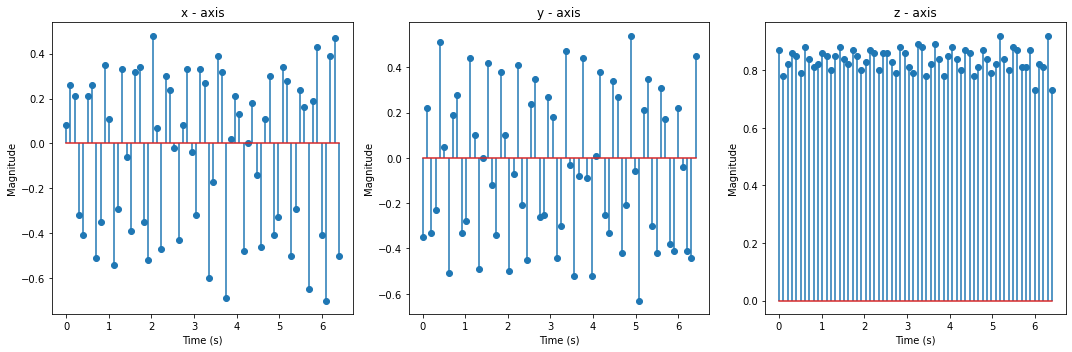

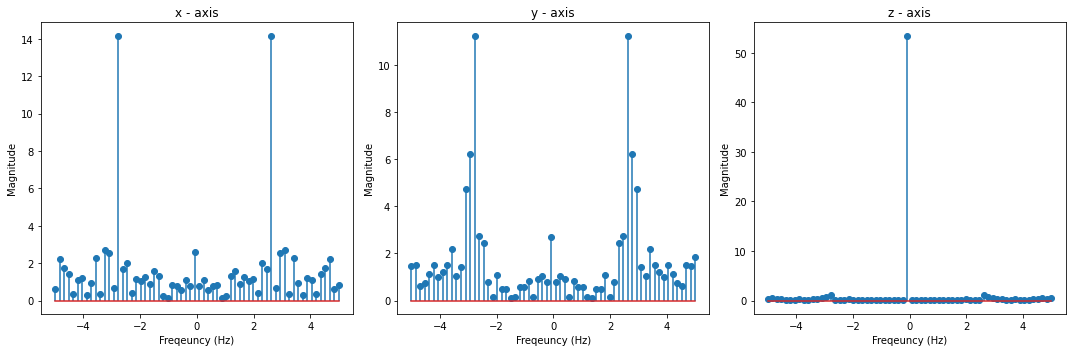

y
[0.08, 0.26, 0.21, -0.32, -0.41, 0.21, 0.26, -0.51, -0.35, 0.35, 0.11, -0.54, -0.29, 0.33, -0.06, -0.39, 0.32, 0.34, -0.35, -0.52, 0.48, 0.07, -0.47, 0.3, 0.24, -0.02, -0.43, 0.08, 0.33, -0.04, -0.32, 0.33, 0.27, -0.6, -0.17, 0.39, 0.32, -0.69, 0.02, 0.21, 0.13, -0.48, 0.0, 0.18, -0.14, -0.46, 0.11, 0.3, -0.41, -0.33, 0.34, 0.28, -0.5, -0.29, 0.24, 0.16, -0.65, 0.19, 0.43, -0.41, -0.7, 0.39, 0.47, -0.5]
[0.44, -0.57, 0.26, 0.35, -0.29, -0.44, 0.44, 0.08, -0.45, -0.17, 0.48, -0.45, -0.47, 0.11, 0.32, -0.2, 0.12, 0.22, 0.23, -0.29, -0.15, 0.59, 0.02, -0.55, 0.27, 0.53, -0.35, -0.44, 0.24, 0.41, -0.04, -0.38, 0.37, 0.23, -0.41, -0.2, 0.53, 0.04, -0.57, -0.1, 0.52, -0.43, -0.51, 0.36, 0.27, -0.08, -0.46, 0.28, 0.18, -0.51, -0.04, 0.57, -0.3, -0.52, -0.05, 0.58, -0.26, -0.49, 0.35, 0.24, -0.29, -0.3, 0.17, 0.26]
[0.87, 0.78, 0.82, 0.86, 0.85, 0.79, 0.88, 0.84, 0.81, 0.82, 0.86, 0.85, 0.8, 0.85, 0.88, 0.84, 0.82, 0.87, 0.85, 0.8, 0.83, 0.87, 0.86, 0.8, 0.86, 0.86, 0.83, 0.79, 0.88, 0.86, 0

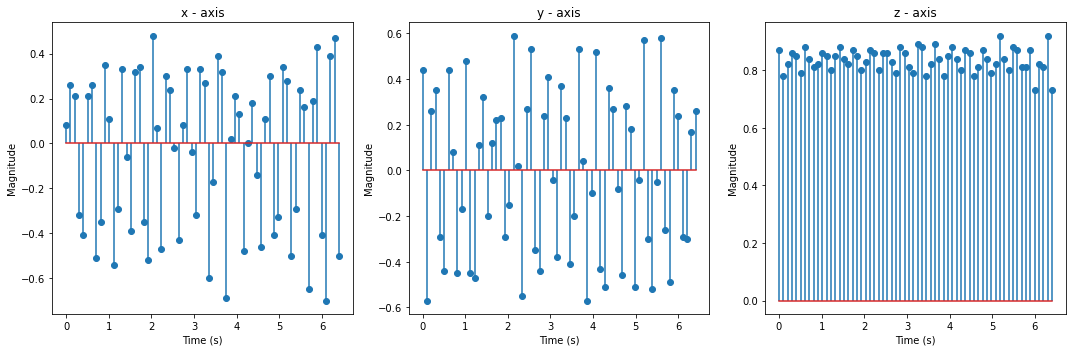

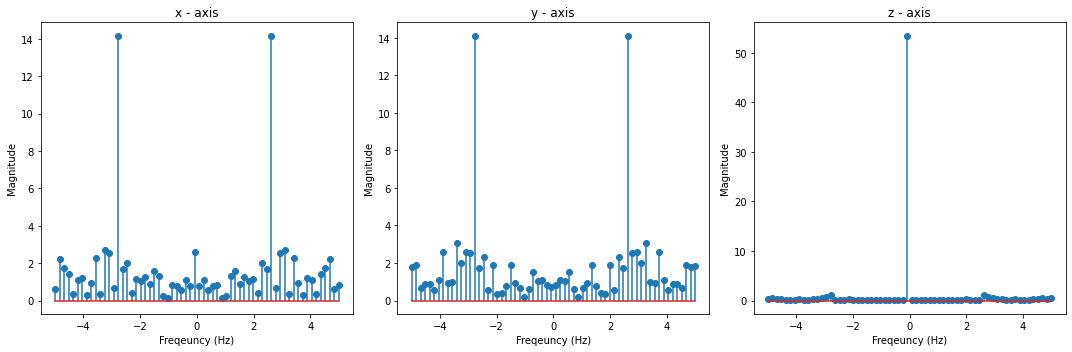

z
[0.08, 0.26, 0.21, -0.32, -0.41, 0.21, 0.26, -0.51, -0.35, 0.35, 0.11, -0.54, -0.29, 0.33, -0.06, -0.39, 0.32, 0.34, -0.35, -0.52, 0.48, 0.07, -0.47, 0.3, 0.24, -0.02, -0.43, 0.08, 0.33, -0.04, -0.32, 0.33, 0.27, -0.6, -0.17, 0.39, 0.32, -0.69, 0.02, 0.21, 0.13, -0.48, 0.0, 0.18, -0.14, -0.46, 0.11, 0.3, -0.41, -0.33, 0.34, 0.28, -0.5, -0.29, 0.24, 0.16, -0.65, 0.19, 0.43, -0.41, -0.7, 0.39, 0.47, -0.5]
[0.44, -0.57, 0.26, 0.35, -0.29, -0.44, 0.44, 0.08, -0.45, -0.17, 0.48, -0.45, -0.47, 0.11, 0.32, -0.2, 0.12, 0.22, 0.23, -0.29, -0.15, 0.59, 0.02, -0.55, 0.27, 0.53, -0.35, -0.44, 0.24, 0.41, -0.04, -0.38, 0.37, 0.23, -0.41, -0.2, 0.53, 0.04, -0.57, -0.1, 0.52, -0.43, -0.51, 0.36, 0.27, -0.08, -0.46, 0.28, 0.18, -0.51, -0.04, 0.57, -0.3, -0.52, -0.05, 0.58, -0.26, -0.49, 0.35, 0.24, -0.29, -0.3, 0.17, 0.26]
[0.73, 0.88, 0.87, 0.8, 0.81, 0.85, 0.87, 0.78, 0.79, 0.87, 0.87, 0.81, 0.81, 0.92, 0.84, 0.82, 0.88, 0.88, 0.84, 0.8, 0.91, 0.92, 0.8, 0.91, 0.87, 0.86, 0.78, 0.85, 0.87, 0.85, 0

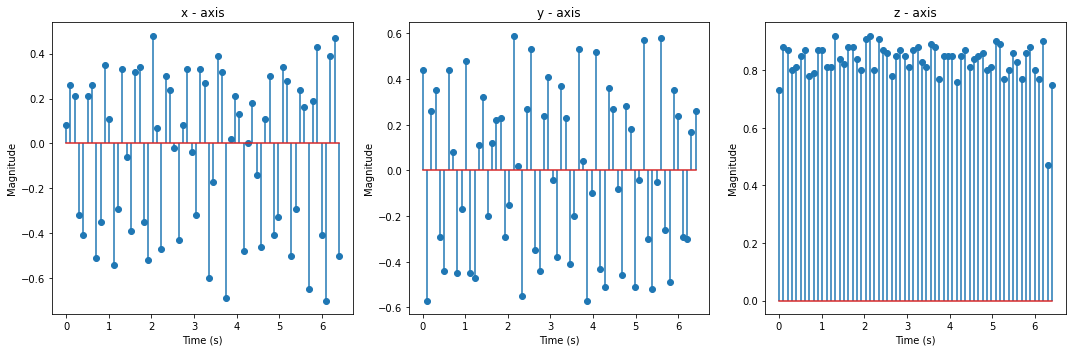

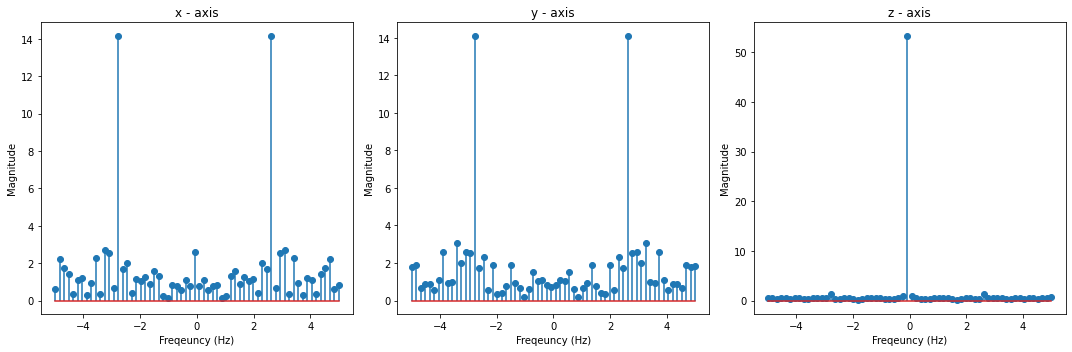

x
[-0.29, 0.4, 0.31, -0.59, 0.07, 0.45, -0.04, -0.52, 0.57, 0.35, -0.26, -0.56, 0.33, 0.43, -0.64, -0.23, 0.51, -0.41, -0.63, 0.39, 0.18, -0.12, -0.27, 0.2, 0.3, -0.58, -0.55, 0.06, 0.3, -0.53, -0.02, 0.35, -0.25, -0.43, 0.28, 0.43, -0.63, -0.03, 0.18, -0.13, -0.63, -0.07, 0.4, -0.59, -0.23, 0.32, -0.26, -0.72, 0.31, 0.44, -0.51, -0.69, 0.26, 0.24, -0.55, -0.16, 0.6, -0.1, -0.45, 0.35, 0.42, -0.16, -0.57, 0.38]
[0.44, -0.57, 0.26, 0.35, -0.29, -0.44, 0.44, 0.08, -0.45, -0.17, 0.48, -0.45, -0.47, 0.11, 0.32, -0.2, 0.12, 0.22, 0.23, -0.29, -0.15, 0.59, 0.02, -0.55, 0.27, 0.53, -0.35, -0.44, 0.24, 0.41, -0.04, -0.38, 0.37, 0.23, -0.41, -0.2, 0.53, 0.04, -0.57, -0.1, 0.52, -0.43, -0.51, 0.36, 0.27, -0.08, -0.46, 0.28, 0.18, -0.51, -0.04, 0.57, -0.3, -0.52, -0.05, 0.58, -0.26, -0.49, 0.35, 0.24, -0.29, -0.3, 0.17, 0.26]
[0.73, 0.88, 0.87, 0.8, 0.81, 0.85, 0.87, 0.78, 0.79, 0.87, 0.87, 0.81, 0.81, 0.92, 0.84, 0.82, 0.88, 0.88, 0.84, 0.8, 0.91, 0.92, 0.8, 0.91, 0.87, 0.86, 0.78, 0.85, 0.87, 0

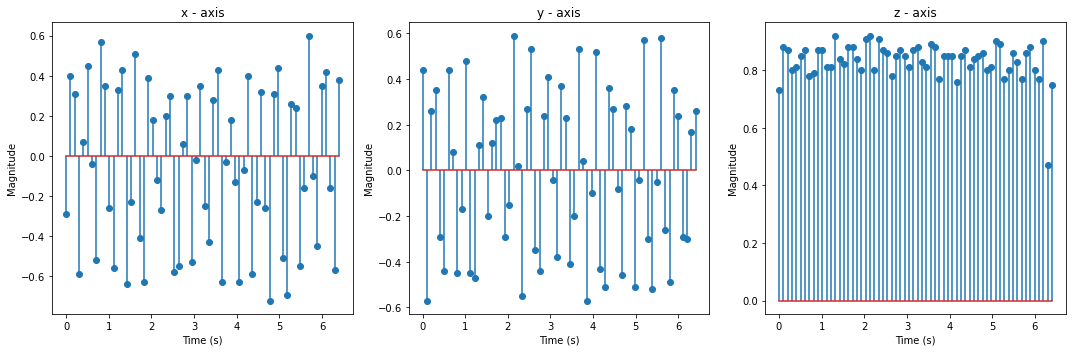

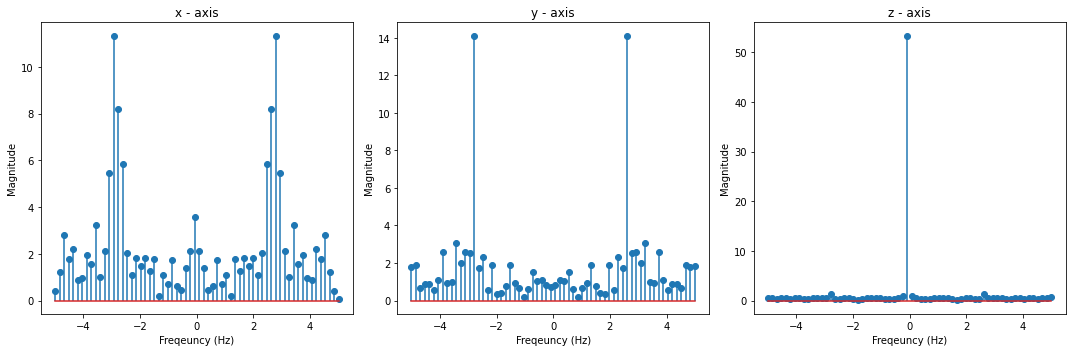

y
[-0.29, 0.4, 0.31, -0.59, 0.07, 0.45, -0.04, -0.52, 0.57, 0.35, -0.26, -0.56, 0.33, 0.43, -0.64, -0.23, 0.51, -0.41, -0.63, 0.39, 0.18, -0.12, -0.27, 0.2, 0.3, -0.58, -0.55, 0.06, 0.3, -0.53, -0.02, 0.35, -0.25, -0.43, 0.28, 0.43, -0.63, -0.03, 0.18, -0.13, -0.63, -0.07, 0.4, -0.59, -0.23, 0.32, -0.26, -0.72, 0.31, 0.44, -0.51, -0.69, 0.26, 0.24, -0.55, -0.16, 0.6, -0.1, -0.45, 0.35, 0.42, -0.16, -0.57, 0.38]
[-0.74, -0.16, 0.53, -0.08, -0.68, 0.03, 0.48, -0.08, -0.52, 0.17, 0.5, -0.39, -0.44, 0.41, 0.01, -0.42, -0.05, 0.53, -0.19, -0.41, 0.25, 0.31, -0.47, -0.45, 0.36, 0.11, -0.28, -0.52, 0.43, -0.27, -0.54, 0.16, 0.5, -0.27, -0.37, 0.44, -0.14, -0.53, -0.1, 0.53, -0.37, -0.51, 0.48, -0.03, -0.5, 0.01, 0.46, -0.28, -0.5, 0.2, 0.32, -0.17, -0.38, 0.47, 0.2, -0.66, 0.14, 0.38, -0.08, -0.48, 0.1, 0.32, -0.3, -0.28]
[0.73, 0.88, 0.87, 0.8, 0.81, 0.85, 0.87, 0.78, 0.79, 0.87, 0.87, 0.81, 0.81, 0.92, 0.84, 0.82, 0.88, 0.88, 0.84, 0.8, 0.91, 0.92, 0.8, 0.91, 0.87, 0.86, 0.78, 0.85, 0.87, 0

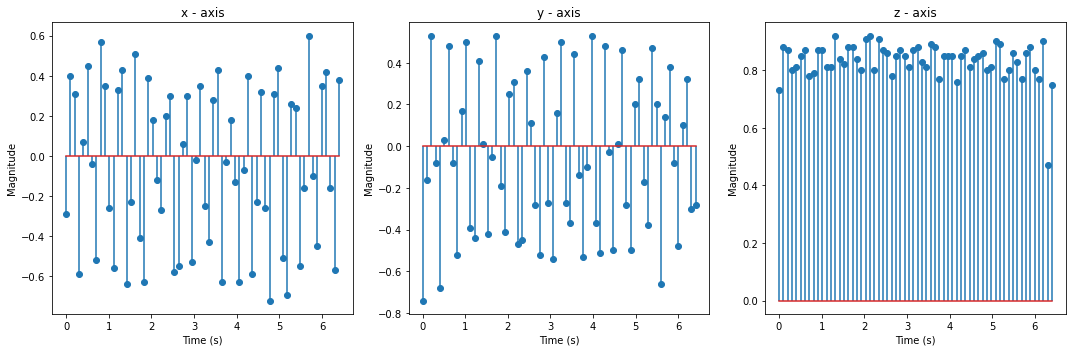

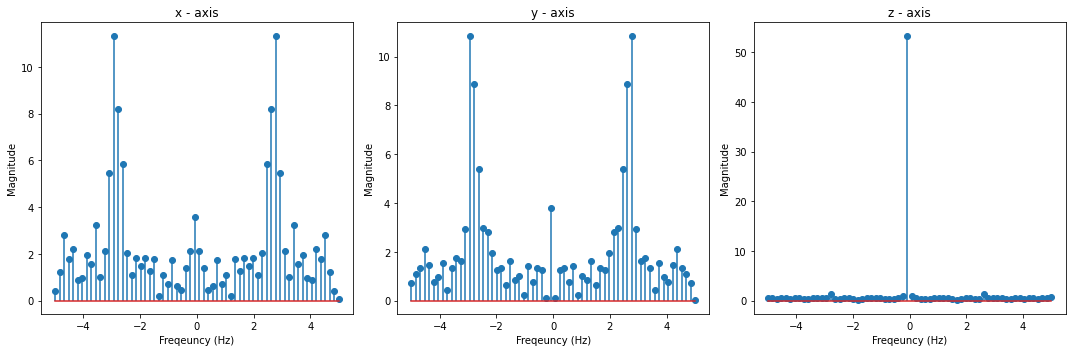

z
[-0.29, 0.4, 0.31, -0.59, 0.07, 0.45, -0.04, -0.52, 0.57, 0.35, -0.26, -0.56, 0.33, 0.43, -0.64, -0.23, 0.51, -0.41, -0.63, 0.39, 0.18, -0.12, -0.27, 0.2, 0.3, -0.58, -0.55, 0.06, 0.3, -0.53, -0.02, 0.35, -0.25, -0.43, 0.28, 0.43, -0.63, -0.03, 0.18, -0.13, -0.63, -0.07, 0.4, -0.59, -0.23, 0.32, -0.26, -0.72, 0.31, 0.44, -0.51, -0.69, 0.26, 0.24, -0.55, -0.16, 0.6, -0.1, -0.45, 0.35, 0.42, -0.16, -0.57, 0.38]
[-0.74, -0.16, 0.53, -0.08, -0.68, 0.03, 0.48, -0.08, -0.52, 0.17, 0.5, -0.39, -0.44, 0.41, 0.01, -0.42, -0.05, 0.53, -0.19, -0.41, 0.25, 0.31, -0.47, -0.45, 0.36, 0.11, -0.28, -0.52, 0.43, -0.27, -0.54, 0.16, 0.5, -0.27, -0.37, 0.44, -0.14, -0.53, -0.1, 0.53, -0.37, -0.51, 0.48, -0.03, -0.5, 0.01, 0.46, -0.28, -0.5, 0.2, 0.32, -0.17, -0.38, 0.47, 0.2, -0.66, 0.14, 0.38, -0.08, -0.48, 0.1, 0.32, -0.3, -0.28]
[0.81, 0.88, 0.87, 0.78, 0.84, 0.87, 0.86, 0.71, 0.9, 0.88, 0.84, 0.84, 0.88, 0.87, 0.81, 0.82, 0.89, 0.83, 0.79, 0.89, 0.85, 0.84, 0.8, 0.88, 0.86, 0.8, 0.79, 0.83, 0.87, 0

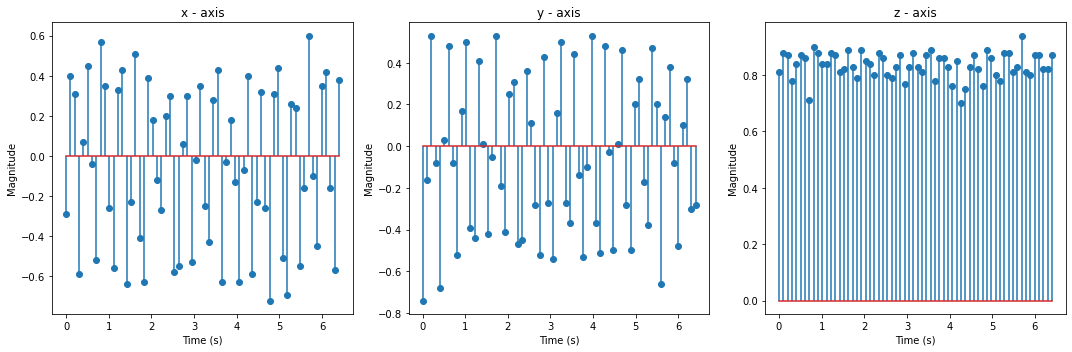

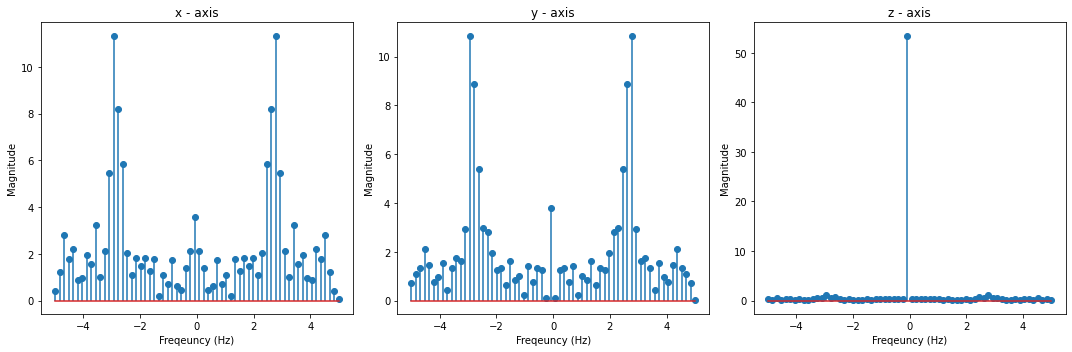

x
[-0.45, -0.08, 0.37, -0.28, -0.71, 0.34, 0.25, -0.52, -0.14, 0.4, 0.01, -0.64, 0.52, 0.21, -0.49, -0.29, 0.25, 0.02, -0.56, 0.11, 0.44, -0.4, -0.54, 0.28, 0.08, -0.52, 0.05, 0.44, 0.06, -0.67, 0.21, 0.21, -0.41, -0.56, 0.29, 0.32, -0.55, 0.44, 0.39, -0.16, -0.76, 0.21, 0.32, -0.66, -0.42, 0.29, -0.09, -0.67, 0.05, 0.29, -0.39, -0.6, 0.28, 0.1, -0.4, 0.14, 0.51, -0.47, -0.72, 0.26, 0.29, -0.45, -0.12, 0.32]
[-0.74, -0.16, 0.53, -0.08, -0.68, 0.03, 0.48, -0.08, -0.52, 0.17, 0.5, -0.39, -0.44, 0.41, 0.01, -0.42, -0.05, 0.53, -0.19, -0.41, 0.25, 0.31, -0.47, -0.45, 0.36, 0.11, -0.28, -0.52, 0.43, -0.27, -0.54, 0.16, 0.5, -0.27, -0.37, 0.44, -0.14, -0.53, -0.1, 0.53, -0.37, -0.51, 0.48, -0.03, -0.5, 0.01, 0.46, -0.28, -0.5, 0.2, 0.32, -0.17, -0.38, 0.47, 0.2, -0.66, 0.14, 0.38, -0.08, -0.48, 0.1, 0.32, -0.3, -0.28]
[0.81, 0.88, 0.87, 0.78, 0.84, 0.87, 0.86, 0.71, 0.9, 0.88, 0.84, 0.84, 0.88, 0.87, 0.81, 0.82, 0.89, 0.83, 0.79, 0.89, 0.85, 0.84, 0.8, 0.88, 0.86, 0.8, 0.79, 0.83, 0.87, 0.77

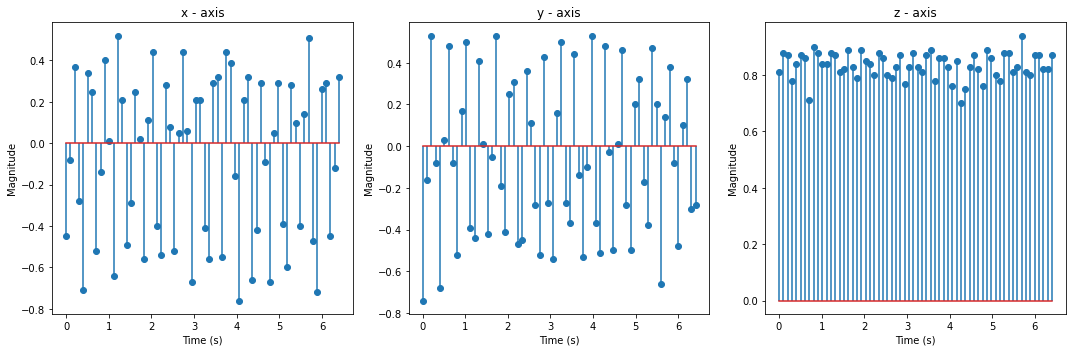

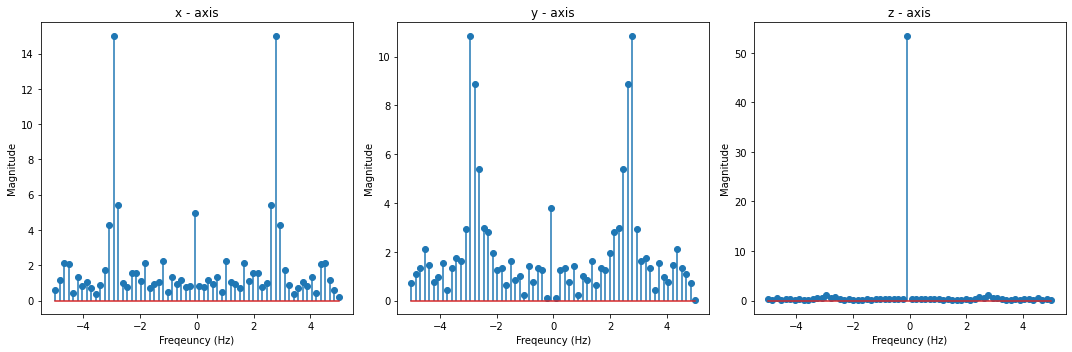

y
[-0.45, -0.08, 0.37, -0.28, -0.71, 0.34, 0.25, -0.52, -0.14, 0.4, 0.01, -0.64, 0.52, 0.21, -0.49, -0.29, 0.25, 0.02, -0.56, 0.11, 0.44, -0.4, -0.54, 0.28, 0.08, -0.52, 0.05, 0.44, 0.06, -0.67, 0.21, 0.21, -0.41, -0.56, 0.29, 0.32, -0.55, 0.44, 0.39, -0.16, -0.76, 0.21, 0.32, -0.66, -0.42, 0.29, -0.09, -0.67, 0.05, 0.29, -0.39, -0.6, 0.28, 0.1, -0.4, 0.14, 0.51, -0.47, -0.72, 0.26, 0.29, -0.45, -0.12, 0.32]
[0.24, -0.58, 0.06, 0.3, -0.11, -0.35, 0.26, 0.32, -0.61, 0.02, 0.52, -0.15, -0.3, 0.28, 0.13, -0.53, -0.14, 0.47, -0.07, -0.49, 0.3, 0.27, -0.23, -0.26, 0.43, 0.18, -0.72, -0.03, 0.52, -0.09, -0.47, 0.78, 0.13, -0.41, -0.12, 0.43, -0.15, -0.59, 0.05, 0.52, -0.43, -0.49, 0.33, 0.11, -0.55, -0.1, 0.53, -0.07, -0.55, 0.42, 0.3, -0.3, -0.42, 0.54, 0.16, -0.64, 0.1, 0.34, -0.09, -0.5, -0.07, 0.29, -0.68, -0.19]
[0.81, 0.88, 0.87, 0.78, 0.84, 0.87, 0.86, 0.71, 0.9, 0.88, 0.84, 0.84, 0.88, 0.87, 0.81, 0.82, 0.89, 0.83, 0.79, 0.89, 0.85, 0.84, 0.8, 0.88, 0.86, 0.8, 0.79, 0.83, 0.87, 0.77,

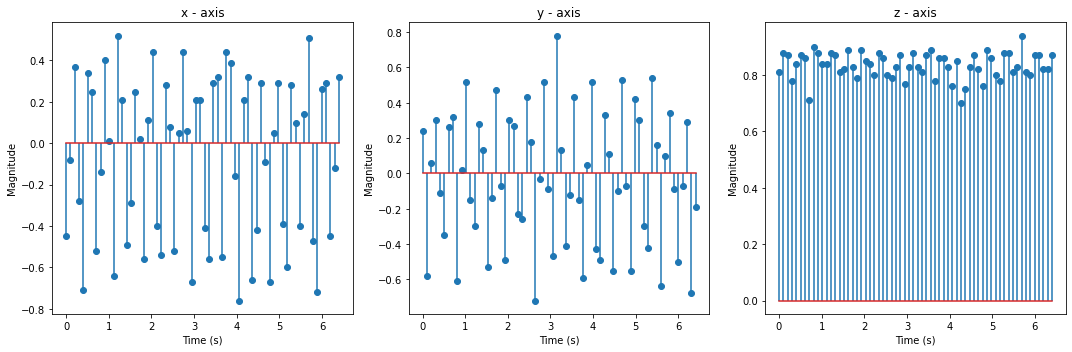

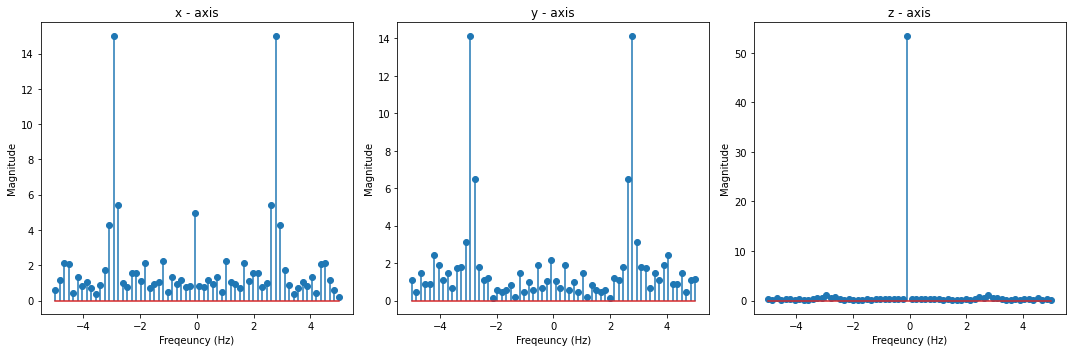

z
[-0.45, -0.08, 0.37, -0.28, -0.71, 0.34, 0.25, -0.52, -0.14, 0.4, 0.01, -0.64, 0.52, 0.21, -0.49, -0.29, 0.25, 0.02, -0.56, 0.11, 0.44, -0.4, -0.54, 0.28, 0.08, -0.52, 0.05, 0.44, 0.06, -0.67, 0.21, 0.21, -0.41, -0.56, 0.29, 0.32, -0.55, 0.44, 0.39, -0.16, -0.76, 0.21, 0.32, -0.66, -0.42, 0.29, -0.09, -0.67, 0.05, 0.29, -0.39, -0.6, 0.28, 0.1, -0.4, 0.14, 0.51, -0.47, -0.72, 0.26, 0.29, -0.45, -0.12, 0.32]
[0.24, -0.58, 0.06, 0.3, -0.11, -0.35, 0.26, 0.32, -0.61, 0.02, 0.52, -0.15, -0.3, 0.28, 0.13, -0.53, -0.14, 0.47, -0.07, -0.49, 0.3, 0.27, -0.23, -0.26, 0.43, 0.18, -0.72, -0.03, 0.52, -0.09, -0.47, 0.78, 0.13, -0.41, -0.12, 0.43, -0.15, -0.59, 0.05, 0.52, -0.43, -0.49, 0.33, 0.11, -0.55, -0.1, 0.53, -0.07, -0.55, 0.42, 0.3, -0.3, -0.42, 0.54, 0.16, -0.64, 0.1, 0.34, -0.09, -0.5, -0.07, 0.29, -0.68, -0.19]
[0.79, 0.84, 0.88, 0.82, 0.79, 0.88, 0.86, 0.78, 0.84, 0.85, 0.82, 0.79, 0.89, 0.88, 0.8, 0.82, 0.86, 0.82, 0.79, 0.86, 0.86, 0.85, 0.8, 0.89, 0.85, 0.79, 0.87, 0.88, 0.84, 0.77

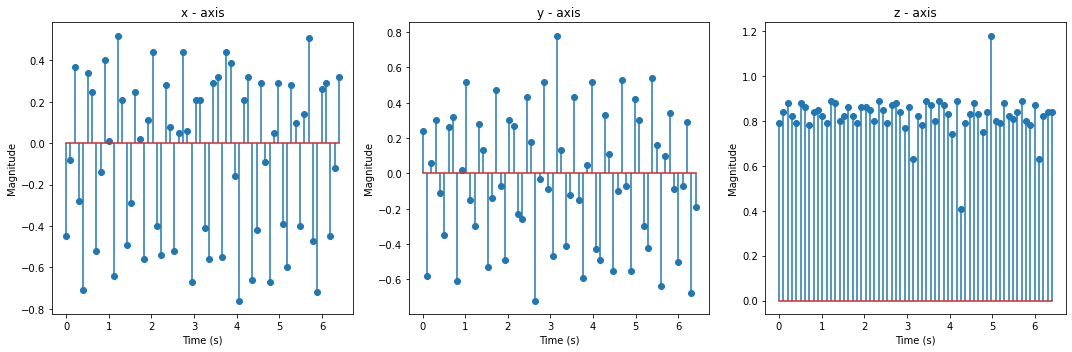

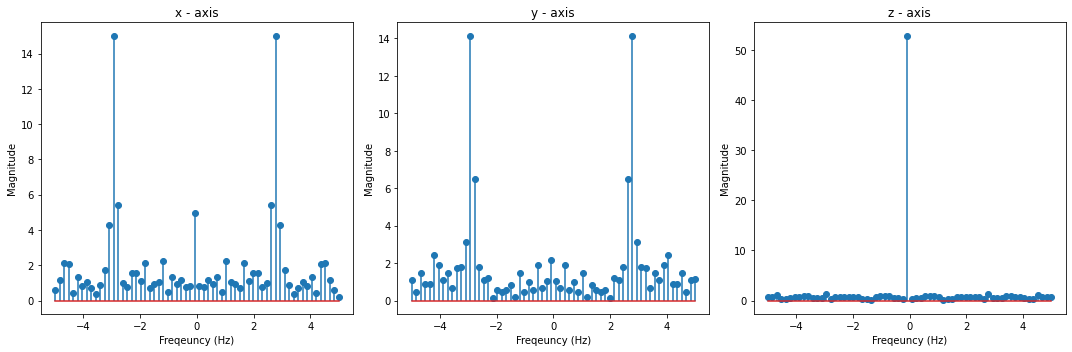

x
[0.27, -0.61, -0.22, 0.33, -0.09, -0.48, 0.21, 0.27, -0.56, -0.61, 0.28, 0.41, -0.61, 0.12, 0.43, -0.16, -0.67, 0.1, 0.47, -0.42, -0.66, 0.09, -0.65, -0.51, -0.16, 0.44, 0.01, -0.53, 0.14, 0.32, -0.21, -0.7, 0.26, -0.05, -0.41, -0.26, 0.06, 0.33, -0.61, -0.17, 0.29, -0.3, -0.67, 0.17, 0.39, -0.4, -0.64, 0.31, 0.26, -0.47, -0.21, 0.41, -0.14, -0.84, 0.11, 0.48, -0.54, -0.65, 0.26, 0.35, -0.41, -0.1, 0.33, 0.02]
[0.24, -0.58, 0.06, 0.3, -0.11, -0.35, 0.26, 0.32, -0.61, 0.02, 0.52, -0.15, -0.3, 0.28, 0.13, -0.53, -0.14, 0.47, -0.07, -0.49, 0.3, 0.27, -0.23, -0.26, 0.43, 0.18, -0.72, -0.03, 0.52, -0.09, -0.47, 0.78, 0.13, -0.41, -0.12, 0.43, -0.15, -0.59, 0.05, 0.52, -0.43, -0.49, 0.33, 0.11, -0.55, -0.1, 0.53, -0.07, -0.55, 0.42, 0.3, -0.3, -0.42, 0.54, 0.16, -0.64, 0.1, 0.34, -0.09, -0.5, -0.07, 0.29, -0.68, -0.19]
[0.79, 0.84, 0.88, 0.82, 0.79, 0.88, 0.86, 0.78, 0.84, 0.85, 0.82, 0.79, 0.89, 0.88, 0.8, 0.82, 0.86, 0.82, 0.79, 0.86, 0.86, 0.85, 0.8, 0.89, 0.85, 0.79, 0.87, 0.88, 0.84, 

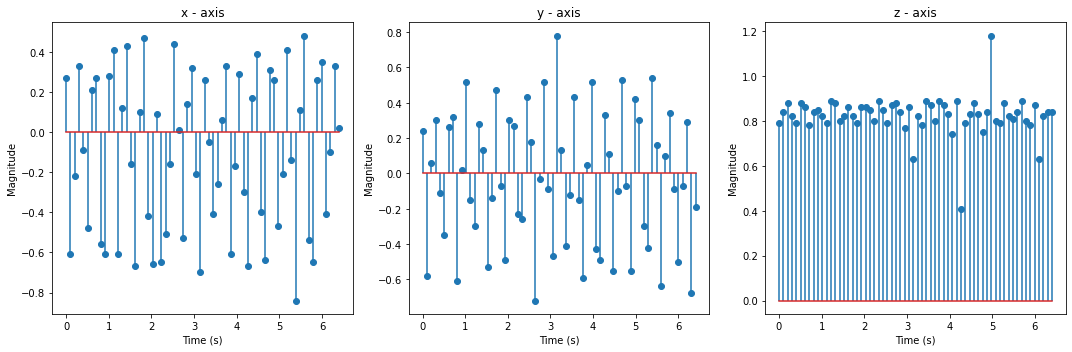

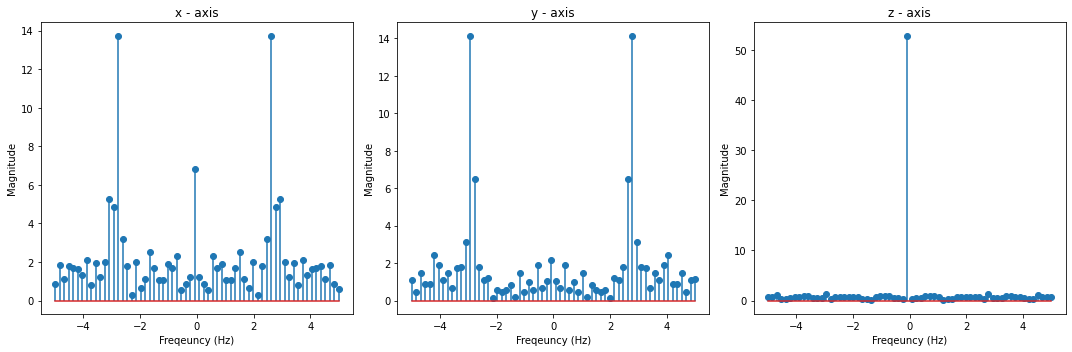

y
[0.27, -0.61, -0.22, 0.33, -0.09, -0.48, 0.21, 0.27, -0.56, -0.61, 0.28, 0.41, -0.61, 0.12, 0.43, -0.16, -0.67, 0.1, 0.47, -0.42, -0.66, 0.09, -0.65, -0.51, -0.16, 0.44, 0.01, -0.53, 0.14, 0.32, -0.21, -0.7, 0.26, -0.05, -0.41, -0.26, 0.06, 0.33, -0.61, -0.17, 0.29, -0.3, -0.67, 0.17, 0.39, -0.4, -0.64, 0.31, 0.26, -0.47, -0.21, 0.41, -0.14, -0.84, 0.11, 0.48, -0.54, -0.65, 0.26, 0.35, -0.41, -0.1, 0.33, 0.02]
[-0.14, -0.16, -0.51, 0.11, 0.44, -0.28, -0.47, 0.32, 0.12, -0.37, -0.26, 0.44, 0.22, -0.72, 0.08, 0.45, -0.18, -0.45, 0.32, 0.3, -0.36, -0.36, 1.31, 0.14, -0.7, -0.19, 0.85, -0.13, -0.59, 0.07, 0.47, -0.21, -0.5, 0.81, 0.37, -0.54, -0.17, 0.81, -0.08, -0.63, 0.04, 0.49, -0.27, -0.49, 0.37, 0.2, -0.31, -0.28, 0.55, 0.1, -0.62, -0.18, 0.57, -0.25, -0.55, 0.26, 0.29, -0.37, -0.28, 0.3, 0.23, -0.71, 0.05, 0.58]
[0.79, 0.84, 0.88, 0.82, 0.79, 0.88, 0.86, 0.78, 0.84, 0.85, 0.82, 0.79, 0.89, 0.88, 0.8, 0.82, 0.86, 0.82, 0.79, 0.86, 0.86, 0.85, 0.8, 0.89, 0.85, 0.79, 0.87, 0.88, 0.84,

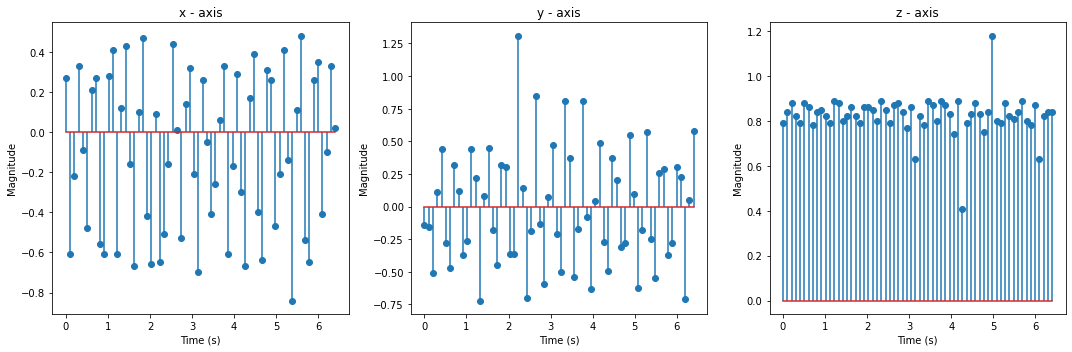

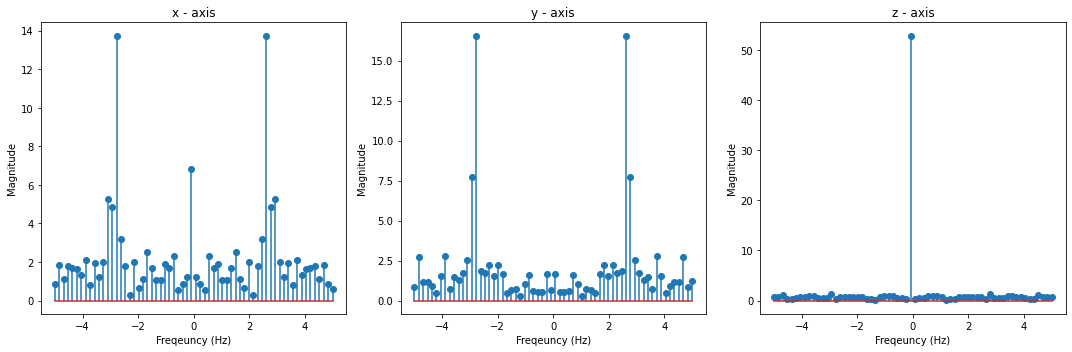

z
[0.27, -0.61, -0.22, 0.33, -0.09, -0.48, 0.21, 0.27, -0.56, -0.61, 0.28, 0.41, -0.61, 0.12, 0.43, -0.16, -0.67, 0.1, 0.47, -0.42, -0.66, 0.09, -0.65, -0.51, -0.16, 0.44, 0.01, -0.53, 0.14, 0.32, -0.21, -0.7, 0.26, -0.05, -0.41, -0.26, 0.06, 0.33, -0.61, -0.17, 0.29, -0.3, -0.67, 0.17, 0.39, -0.4, -0.64, 0.31, 0.26, -0.47, -0.21, 0.41, -0.14, -0.84, 0.11, 0.48, -0.54, -0.65, 0.26, 0.35, -0.41, -0.1, 0.33, 0.02]
[-0.14, -0.16, -0.51, 0.11, 0.44, -0.28, -0.47, 0.32, 0.12, -0.37, -0.26, 0.44, 0.22, -0.72, 0.08, 0.45, -0.18, -0.45, 0.32, 0.3, -0.36, -0.36, 1.31, 0.14, -0.7, -0.19, 0.85, -0.13, -0.59, 0.07, 0.47, -0.21, -0.5, 0.81, 0.37, -0.54, -0.17, 0.81, -0.08, -0.63, 0.04, 0.49, -0.27, -0.49, 0.37, 0.2, -0.31, -0.28, 0.55, 0.1, -0.62, -0.18, 0.57, -0.25, -0.55, 0.26, 0.29, -0.37, -0.28, 0.3, 0.23, -0.71, 0.05, 0.58]
[0.9, 0.76, 0.84, 0.87, 0.83, 0.79, 0.85, 0.88, 0.84, 0.77, 0.88, 0.74, 0.79, 0.83, 0.89, 0.82, 0.79, 0.85, 0.91, 0.79, 0.78, 0.86, 1.2, 0.79, 0.81, 0.88, 1.43, 0.75, 0.86,

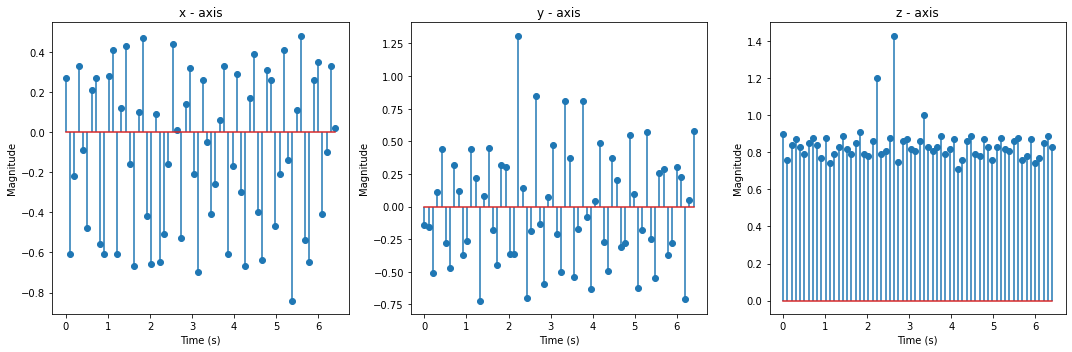

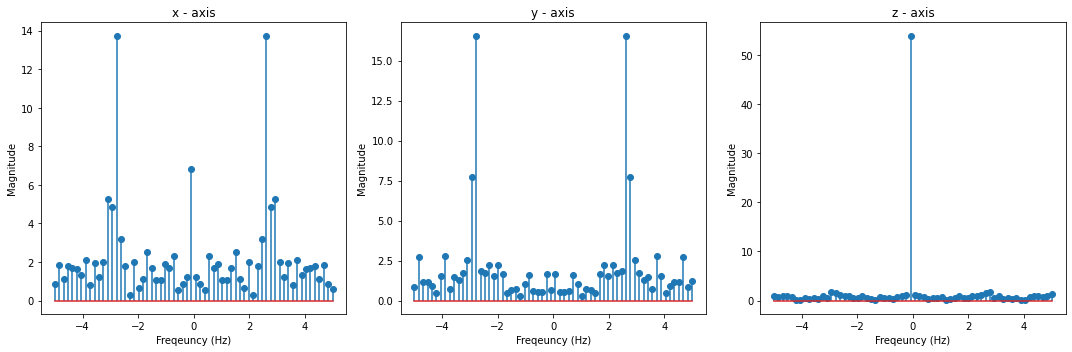

x
[0.0, 0.34, 0.31, -0.53, -0.56, 0.41, 0.01, -0.64, 0.29, 0.35, -0.27, -0.77, 0.18, 0.58, -0.52, -0.3, 0.44, -0.11, -0.55, 0.17, 0.4, -0.22, -0.55, 0.2, 0.63, -0.46, -0.5, 0.55, 0.08, -0.57, 0.16, 0.39, 0.03, -0.48, 0.22, 0.37, -0.5, -0.73, 0.36, 0.19, -0.48, 0.15, 0.48, 0.34, -0.58, 0.44, 0.32, -0.33, -0.49, 0.27, 0.0, -0.61, 0.25, 0.53, -0.53, -0.62, 0.32, 0.26, -0.24, -0.23, 0.33, 0.11, -0.45, 0.2]
[-0.14, -0.16, -0.51, 0.11, 0.44, -0.28, -0.47, 0.32, 0.12, -0.37, -0.26, 0.44, 0.22, -0.72, 0.08, 0.45, -0.18, -0.45, 0.32, 0.3, -0.36, -0.36, 1.31, 0.14, -0.7, -0.19, 0.85, -0.13, -0.59, 0.07, 0.47, -0.21, -0.5, 0.81, 0.37, -0.54, -0.17, 0.81, -0.08, -0.63, 0.04, 0.49, -0.27, -0.49, 0.37, 0.2, -0.31, -0.28, 0.55, 0.1, -0.62, -0.18, 0.57, -0.25, -0.55, 0.26, 0.29, -0.37, -0.28, 0.3, 0.23, -0.71, 0.05, 0.58]
[0.9, 0.76, 0.84, 0.87, 0.83, 0.79, 0.85, 0.88, 0.84, 0.77, 0.88, 0.74, 0.79, 0.83, 0.89, 0.82, 0.79, 0.85, 0.91, 0.79, 0.78, 0.86, 1.2, 0.79, 0.81, 0.88, 1.43, 0.75, 0.86, 0.87, 0.8

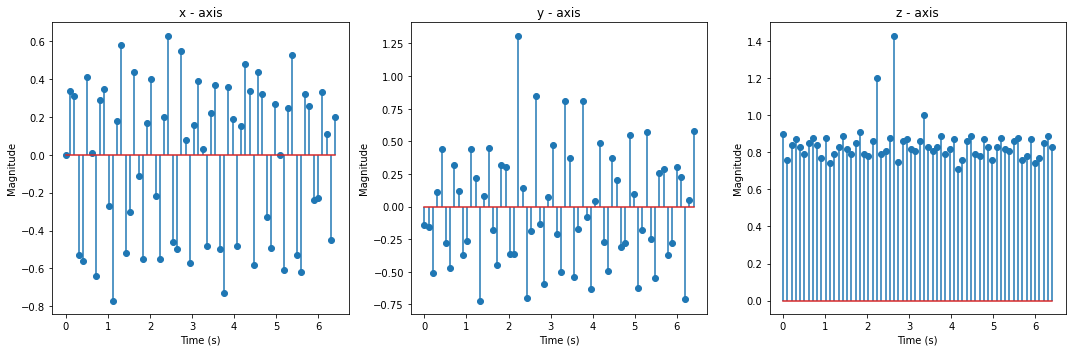

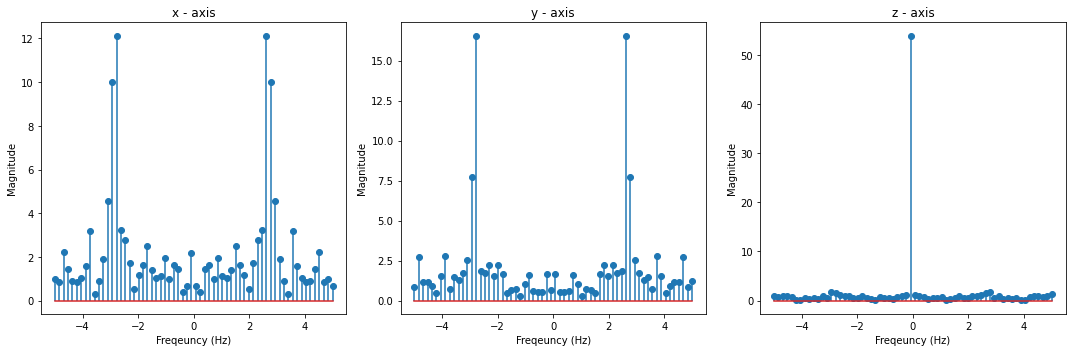

y
[0.0, 0.34, 0.31, -0.53, -0.56, 0.41, 0.01, -0.64, 0.29, 0.35, -0.27, -0.77, 0.18, 0.58, -0.52, -0.3, 0.44, -0.11, -0.55, 0.17, 0.4, -0.22, -0.55, 0.2, 0.63, -0.46, -0.5, 0.55, 0.08, -0.57, 0.16, 0.39, 0.03, -0.48, 0.22, 0.37, -0.5, -0.73, 0.36, 0.19, -0.48, 0.15, 0.48, 0.34, -0.58, 0.44, 0.32, -0.33, -0.49, 0.27, 0.0, -0.61, 0.25, 0.53, -0.53, -0.62, 0.32, 0.26, -0.24, -0.23, 0.33, 0.11, -0.45, 0.2]
[0.57, -0.57, 0.64, 0.26, -0.36, -0.33, 0.84, -0.1, -0.61, 0.22, 0.37, -0.39, -0.38, 0.39, 0.09, -0.55, -0.12, 0.53, -0.15, -0.62, 0.02, 0.46, -0.41, -0.38, 0.23, 0.19, -0.54, -0.11, 0.44, 0.08, -0.57, 0.14, 0.45, -0.45, -0.44, 0.17, 0.09, -0.28, -0.35, 0.48, 0.26, -0.68, -0.09, 0.99, -0.07, -0.55, 0.29, 0.35, -0.52, -0.19, 0.46, -0.06, -0.61, 0.12, 0.38, -0.12, -0.38, 0.39, 0.43, -0.64, -0.04, 0.56, -0.0, -0.54]
[0.9, 0.76, 0.84, 0.87, 0.83, 0.79, 0.85, 0.88, 0.84, 0.77, 0.88, 0.74, 0.79, 0.83, 0.89, 0.82, 0.79, 0.85, 0.91, 0.79, 0.78, 0.86, 1.2, 0.79, 0.81, 0.88, 1.43, 0.75, 0.86, 0.87

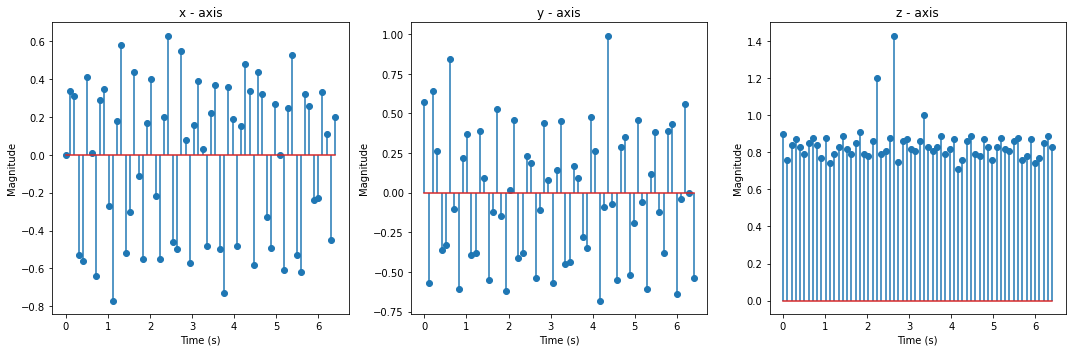

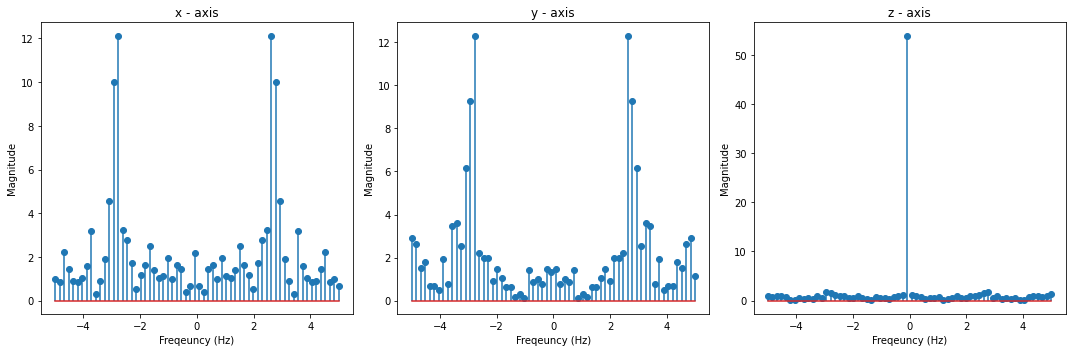

z
[0.0, 0.34, 0.31, -0.53, -0.56, 0.41, 0.01, -0.64, 0.29, 0.35, -0.27, -0.77, 0.18, 0.58, -0.52, -0.3, 0.44, -0.11, -0.55, 0.17, 0.4, -0.22, -0.55, 0.2, 0.63, -0.46, -0.5, 0.55, 0.08, -0.57, 0.16, 0.39, 0.03, -0.48, 0.22, 0.37, -0.5, -0.73, 0.36, 0.19, -0.48, 0.15, 0.48, 0.34, -0.58, 0.44, 0.32, -0.33, -0.49, 0.27, 0.0, -0.61, 0.25, 0.53, -0.53, -0.62, 0.32, 0.26, -0.24, -0.23, 0.33, 0.11, -0.45, 0.2]
[0.57, -0.57, 0.64, 0.26, -0.36, -0.33, 0.84, -0.1, -0.61, 0.22, 0.37, -0.39, -0.38, 0.39, 0.09, -0.55, -0.12, 0.53, -0.15, -0.62, 0.02, 0.46, -0.41, -0.38, 0.23, 0.19, -0.54, -0.11, 0.44, 0.08, -0.57, 0.14, 0.45, -0.45, -0.44, 0.17, 0.09, -0.28, -0.35, 0.48, 0.26, -0.68, -0.09, 0.99, -0.07, -0.55, 0.29, 0.35, -0.52, -0.19, 0.46, -0.06, -0.61, 0.12, 0.38, -0.12, -0.38, 0.39, 0.43, -0.64, -0.04, 0.56, -0.0, -0.54]
[0.85, 0.88, 0.72, 0.8, 0.78, 0.88, 1.16, 0.79, 0.88, 0.87, 0.79, 0.77, 0.87, 0.82, 0.81, 0.81, 0.91, 0.73, 0.85, 0.88, 0.86, 0.81, 0.82, 0.86, 0.87, 0.81, 0.78, 0.91, 0.73, 0.7

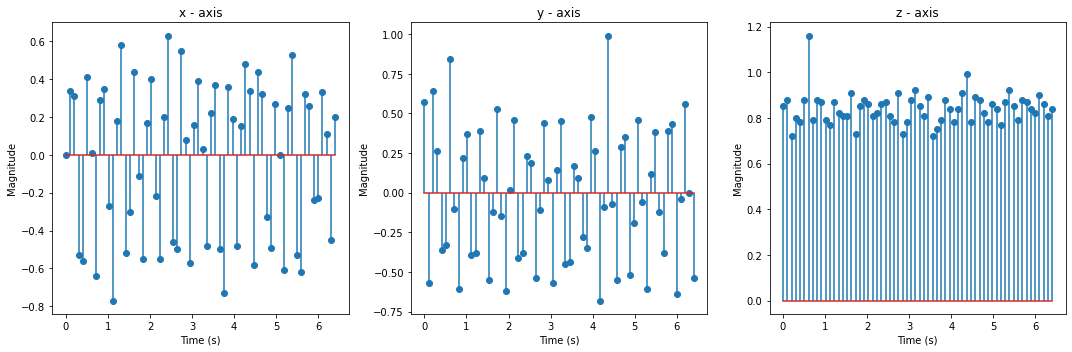

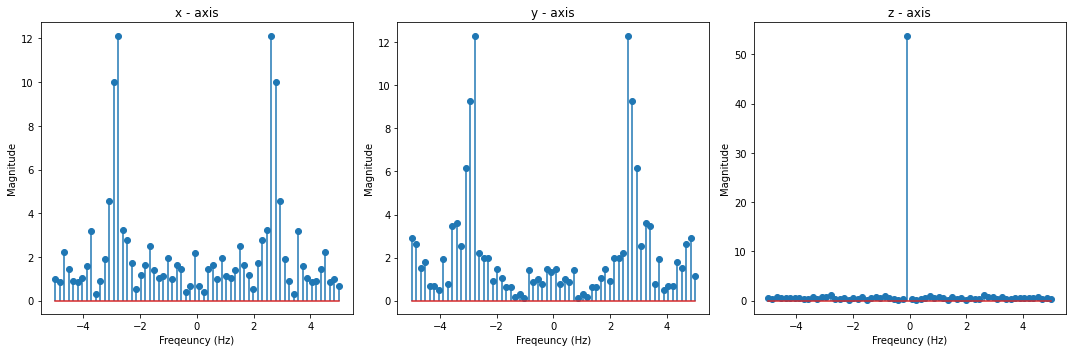

x
[0.1, -0.13, -0.74, 0.22, 0.27, -0.67, -0.44, 0.23, 0.28, -0.55, 0.14, 0.49, -0.7, -0.46, 0.27, 0.05, -0.42, -0.41, 0.39, -0.1, -0.38, 0.23, 0.37, -0.58, -0.26, 0.45, 0.26, -0.61, -0.57, 0.41, 0.02, -0.44, 0.26, 0.37, -0.29, -0.32, 0.28, 0.11, -0.2, -0.72, 0.47, 0.03, -0.52, 0.04, 0.3, -0.03, -0.72, 0.1, 0.36, -0.03, -0.39, 0.35, 0.27, -0.22, -0.22, 0.24, 0.17, -0.54, -0.36, 0.32, -0.06, -0.52, 0.07, 0.37]
[0.57, -0.57, 0.64, 0.26, -0.36, -0.33, 0.84, -0.1, -0.61, 0.22, 0.37, -0.39, -0.38, 0.39, 0.09, -0.55, -0.12, 0.53, -0.15, -0.62, 0.02, 0.46, -0.41, -0.38, 0.23, 0.19, -0.54, -0.11, 0.44, 0.08, -0.57, 0.14, 0.45, -0.45, -0.44, 0.17, 0.09, -0.28, -0.35, 0.48, 0.26, -0.68, -0.09, 0.99, -0.07, -0.55, 0.29, 0.35, -0.52, -0.19, 0.46, -0.06, -0.61, 0.12, 0.38, -0.12, -0.38, 0.39, 0.43, -0.64, -0.04, 0.56, -0.0, -0.54]
[0.85, 0.88, 0.72, 0.8, 0.78, 0.88, 1.16, 0.79, 0.88, 0.87, 0.79, 0.77, 0.87, 0.82, 0.81, 0.81, 0.91, 0.73, 0.85, 0.88, 0.86, 0.81, 0.82, 0.86, 0.87, 0.81, 0.78, 0.91, 0.7

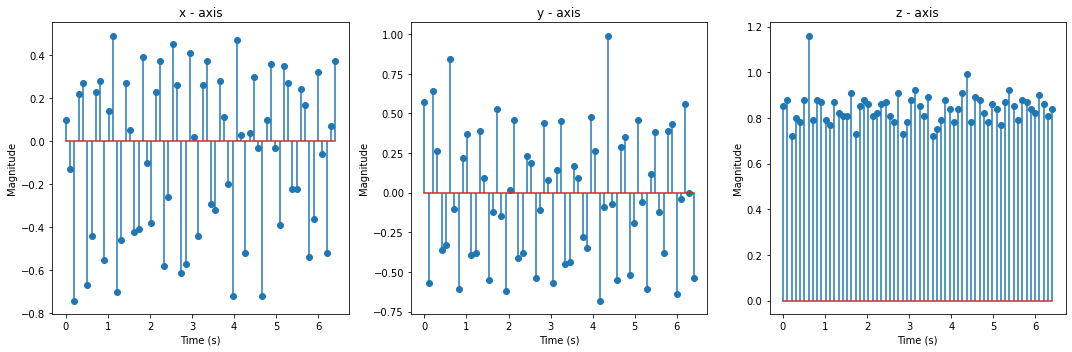

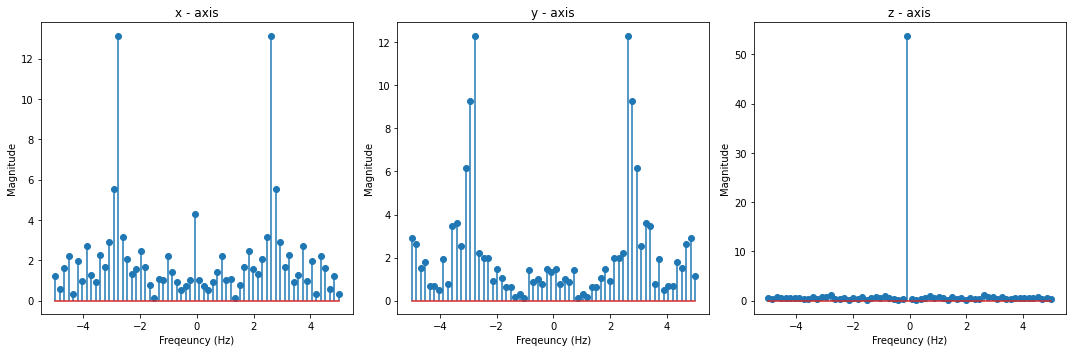

y
[0.1, -0.13, -0.74, 0.22, 0.27, -0.67, -0.44, 0.23, 0.28, -0.55, 0.14, 0.49, -0.7, -0.46, 0.27, 0.05, -0.42, -0.41, 0.39, -0.1, -0.38, 0.23, 0.37, -0.58, -0.26, 0.45, 0.26, -0.61, -0.57, 0.41, 0.02, -0.44, 0.26, 0.37, -0.29, -0.32, 0.28, 0.11, -0.2, -0.72, 0.47, 0.03, -0.52, 0.04, 0.3, -0.03, -0.72, 0.1, 0.36, -0.03, -0.39, 0.35, 0.27, -0.22, -0.22, 0.24, 0.17, -0.54, -0.36, 0.32, -0.06, -0.52, 0.07, 0.37]
[0.72, 0.35, -0.18, -0.41, 0.69, 0.17, -0.54, -0.34, 0.64, -0.52, -0.64, -0.27, 0.28, -0.31, -0.29, 0.64, 0.17, -0.54, -0.01, 0.57, -0.15, -0.41, 0.33, 0.19, -0.45, -0.49, 0.85, -0.15, -0.47, -0.23, 0.53, 0.0, -0.6, 0.12, 0.4, -0.26, -0.38, 0.43, 0.26, -0.54, -0.11, 0.41, -0.11, -0.69, -0.05, 0.41, -0.1, -0.5, 0.12, 0.42, -0.35, -0.42, 0.26, 0.3, -0.36, -0.35, 0.39, -0.05, -0.45, -0.08, 0.39, -0.12, -0.51, 0.11]
[0.85, 0.88, 0.72, 0.8, 0.78, 0.88, 1.16, 0.79, 0.88, 0.87, 0.79, 0.77, 0.87, 0.82, 0.81, 0.81, 0.91, 0.73, 0.85, 0.88, 0.86, 0.81, 0.82, 0.86, 0.87, 0.81, 0.78, 0.91, 0.73

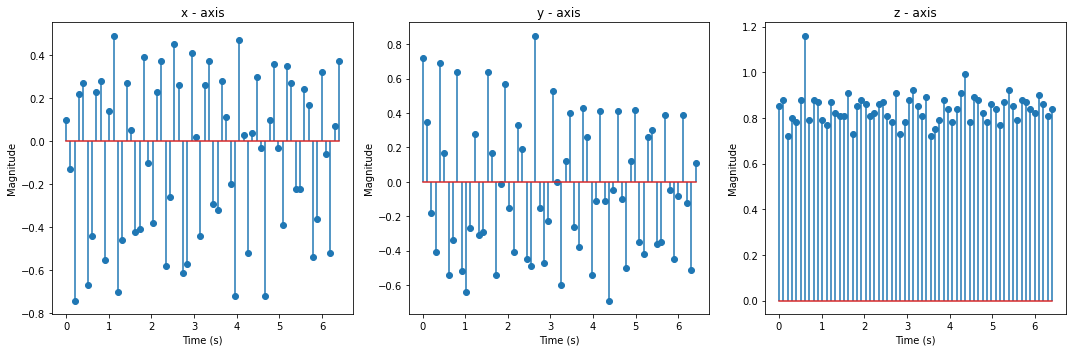

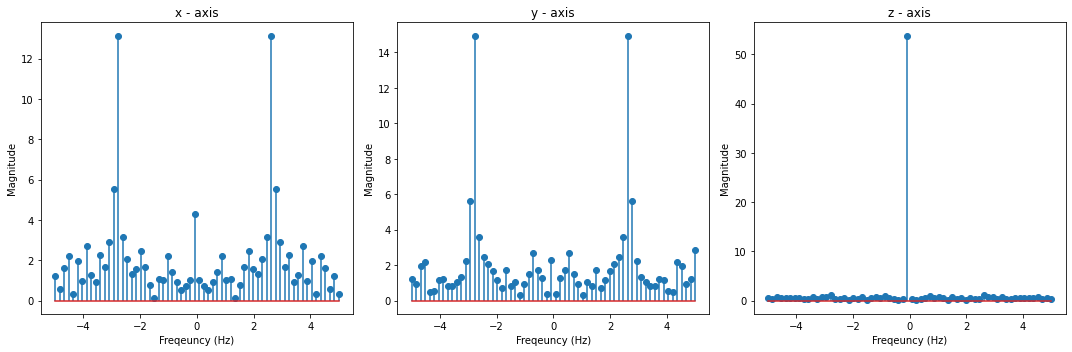

z
[0.1, -0.13, -0.74, 0.22, 0.27, -0.67, -0.44, 0.23, 0.28, -0.55, 0.14, 0.49, -0.7, -0.46, 0.27, 0.05, -0.42, -0.41, 0.39, -0.1, -0.38, 0.23, 0.37, -0.58, -0.26, 0.45, 0.26, -0.61, -0.57, 0.41, 0.02, -0.44, 0.26, 0.37, -0.29, -0.32, 0.28, 0.11, -0.2, -0.72, 0.47, 0.03, -0.52, 0.04, 0.3, -0.03, -0.72, 0.1, 0.36, -0.03, -0.39, 0.35, 0.27, -0.22, -0.22, 0.24, 0.17, -0.54, -0.36, 0.32, -0.06, -0.52, 0.07, 0.37]
[0.72, 0.35, -0.18, -0.41, 0.69, 0.17, -0.54, -0.34, 0.64, -0.52, -0.64, -0.27, 0.28, -0.31, -0.29, 0.64, 0.17, -0.54, -0.01, 0.57, -0.15, -0.41, 0.33, 0.19, -0.45, -0.49, 0.85, -0.15, -0.47, -0.23, 0.53, 0.0, -0.6, 0.12, 0.4, -0.26, -0.38, 0.43, 0.26, -0.54, -0.11, 0.41, -0.11, -0.69, -0.05, 0.41, -0.1, -0.5, 0.12, 0.42, -0.35, -0.42, 0.26, 0.3, -0.36, -0.35, 0.39, -0.05, -0.45, -0.08, 0.39, -0.12, -0.51, 0.11]
[0.98, 0.83, 0.78, 0.88, 0.91, 0.72, 0.8, 0.87, 0.86, 0.76, 0.87, 0.39, 0.9, 0.8, 0.86, 0.95, 0.75, 0.81, 0.9, 0.87, 0.78, 0.86, 0.9, 0.96, 0.8, 0.87, 0.98, 0.81, 0.8, 0.86

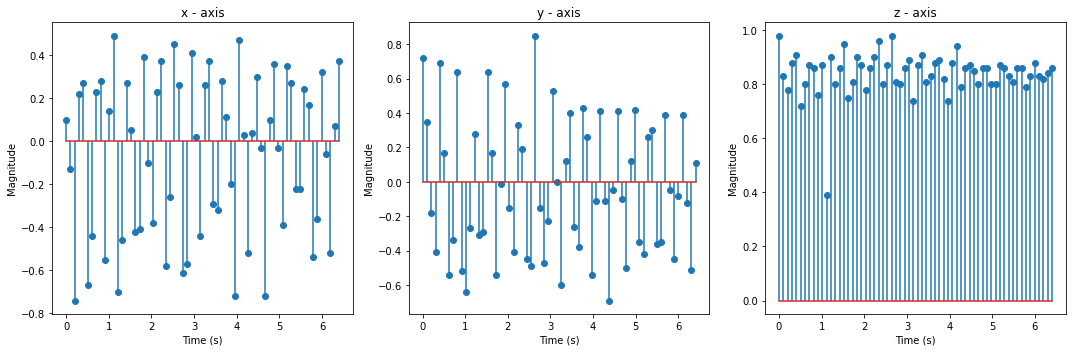

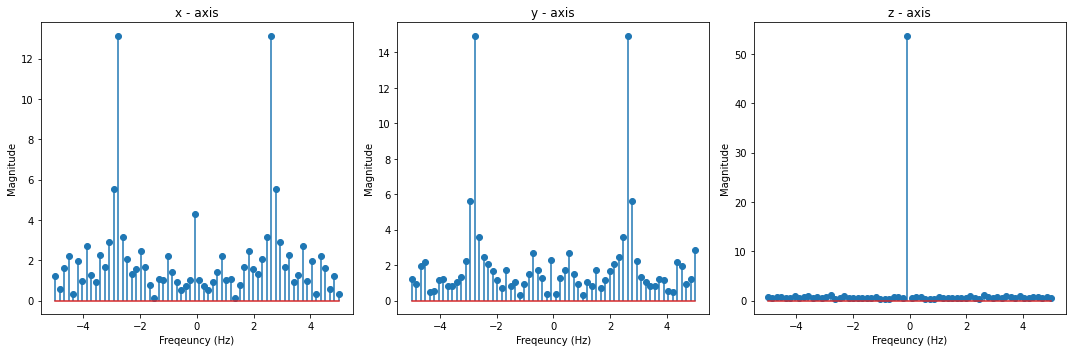

x
[0.41, -0.38, 0.36, 0.28, -0.49, 0.14, 0.3, -0.25, -0.44, 0.09, 0.31, -0.44, -0.41, 0.41, -0.25, -0.5, 0.17, 0.3, -0.51, -0.09, 0.23, 0.24, -0.48, 0.17, 0.52, -0.52, -0.05, 0.24, -0.14, -0.53, 0.06, 0.32, -0.34, -0.29, 0.33, 0.05, -0.31, 0.08, 0.48, -0.35, -0.64, -0.18, 0.27, -0.57, -0.4, 0.41, 0.22, -0.66, -0.1, 0.25, -0.47, -0.7, 0.05, 0.14, -0.47, -0.1, 0.26, -0.12, -0.63, 0.05, 0.36, -0.19, -0.4, 0.24]
[0.72, 0.35, -0.18, -0.41, 0.69, 0.17, -0.54, -0.34, 0.64, -0.52, -0.64, -0.27, 0.28, -0.31, -0.29, 0.64, 0.17, -0.54, -0.01, 0.57, -0.15, -0.41, 0.33, 0.19, -0.45, -0.49, 0.85, -0.15, -0.47, -0.23, 0.53, 0.0, -0.6, 0.12, 0.4, -0.26, -0.38, 0.43, 0.26, -0.54, -0.11, 0.41, -0.11, -0.69, -0.05, 0.41, -0.1, -0.5, 0.12, 0.42, -0.35, -0.42, 0.26, 0.3, -0.36, -0.35, 0.39, -0.05, -0.45, -0.08, 0.39, -0.12, -0.51, 0.11]
[0.98, 0.83, 0.78, 0.88, 0.91, 0.72, 0.8, 0.87, 0.86, 0.76, 0.87, 0.39, 0.9, 0.8, 0.86, 0.95, 0.75, 0.81, 0.9, 0.87, 0.78, 0.86, 0.9, 0.96, 0.8, 0.87, 0.98, 0.81, 0.8, 0.86

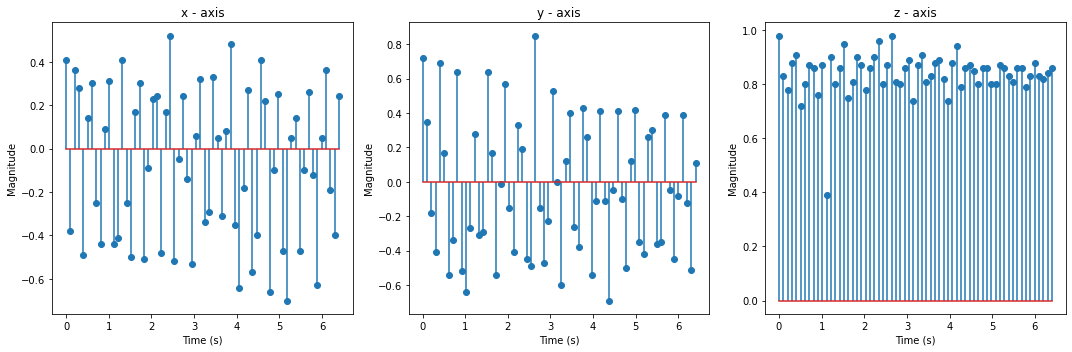

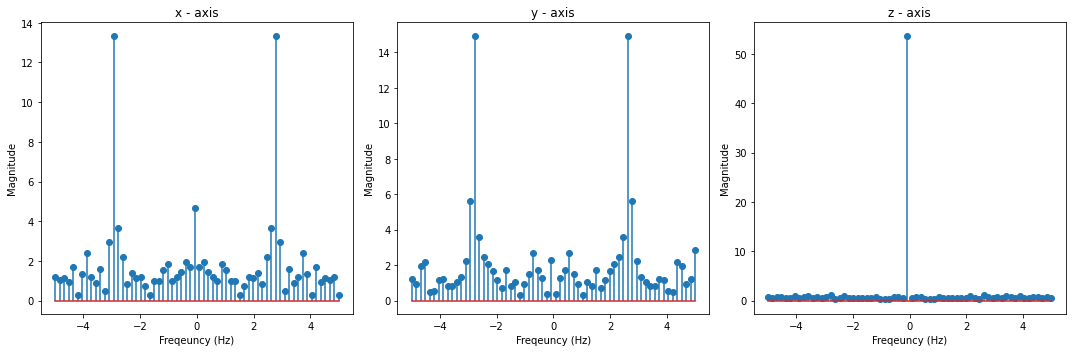

y
[0.41, -0.38, 0.36, 0.28, -0.49, 0.14, 0.3, -0.25, -0.44, 0.09, 0.31, -0.44, -0.41, 0.41, -0.25, -0.5, 0.17, 0.3, -0.51, -0.09, 0.23, 0.24, -0.48, 0.17, 0.52, -0.52, -0.05, 0.24, -0.14, -0.53, 0.06, 0.32, -0.34, -0.29, 0.33, 0.05, -0.31, 0.08, 0.48, -0.35, -0.64, -0.18, 0.27, -0.57, -0.4, 0.41, 0.22, -0.66, -0.1, 0.25, -0.47, -0.7, 0.05, 0.14, -0.47, -0.1, 0.26, -0.12, -0.63, 0.05, 0.36, -0.19, -0.4, 0.24]
[0.14, -0.35, -0.37, 0.61, 0.14, -0.57, -0.13, 0.46, -0.34, -0.36, 0.3, 0.12, -0.54, -0.36, 0.51, -0.01, -0.43, 0.15, 0.3, -0.51, -0.06, 0.5, -0.12, -0.25, 0.26, 0.19, -0.53, -0.03, 0.43, -0.06, -0.51, 0.02, 0.37, -0.25, -0.3, 0.37, 0.07, -0.54, 0.01, 0.45, -0.21, -0.45, 0.5, 0.2, -0.47, -0.09, 0.41, -0.24, -0.43, 0.1, 0.31, -0.32, -0.48, 0.51, -0.08, -0.5, 0.18, 0.43, -0.4, -0.45, 0.22, 0.53, -0.53, 0.03]
[0.98, 0.83, 0.78, 0.88, 0.91, 0.72, 0.8, 0.87, 0.86, 0.76, 0.87, 0.39, 0.9, 0.8, 0.86, 0.95, 0.75, 0.81, 0.9, 0.87, 0.78, 0.86, 0.9, 0.96, 0.8, 0.87, 0.98, 0.81, 0.8, 0.86, 0.89

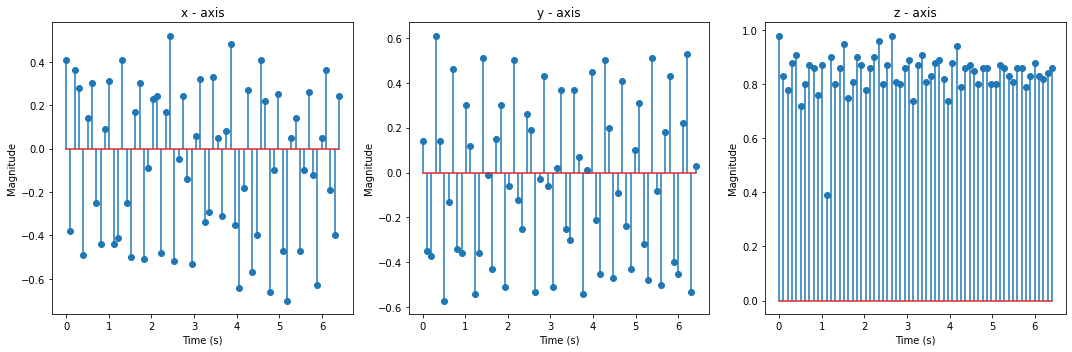

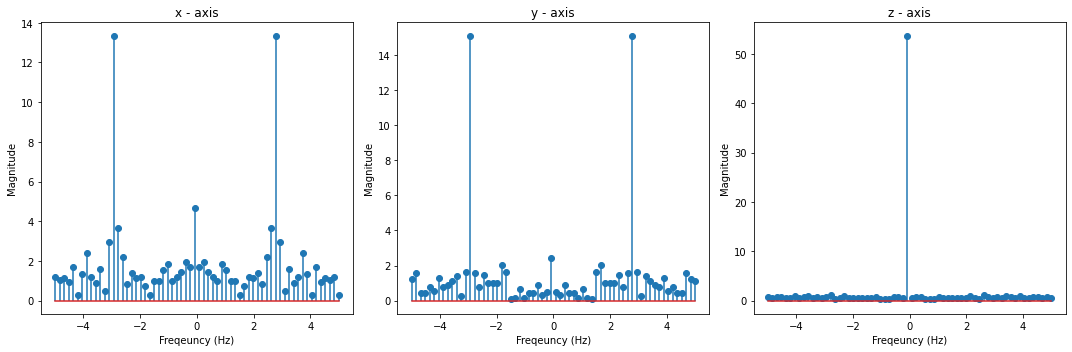

z
[0.41, -0.38, 0.36, 0.28, -0.49, 0.14, 0.3, -0.25, -0.44, 0.09, 0.31, -0.44, -0.41, 0.41, -0.25, -0.5, 0.17, 0.3, -0.51, -0.09, 0.23, 0.24, -0.48, 0.17, 0.52, -0.52, -0.05, 0.24, -0.14, -0.53, 0.06, 0.32, -0.34, -0.29, 0.33, 0.05, -0.31, 0.08, 0.48, -0.35, -0.64, -0.18, 0.27, -0.57, -0.4, 0.41, 0.22, -0.66, -0.1, 0.25, -0.47, -0.7, 0.05, 0.14, -0.47, -0.1, 0.26, -0.12, -0.63, 0.05, 0.36, -0.19, -0.4, 0.24]
[0.14, -0.35, -0.37, 0.61, 0.14, -0.57, -0.13, 0.46, -0.34, -0.36, 0.3, 0.12, -0.54, -0.36, 0.51, -0.01, -0.43, 0.15, 0.3, -0.51, -0.06, 0.5, -0.12, -0.25, 0.26, 0.19, -0.53, -0.03, 0.43, -0.06, -0.51, 0.02, 0.37, -0.25, -0.3, 0.37, 0.07, -0.54, 0.01, 0.45, -0.21, -0.45, 0.5, 0.2, -0.47, -0.09, 0.41, -0.24, -0.43, 0.1, 0.31, -0.32, -0.48, 0.51, -0.08, -0.5, 0.18, 0.43, -0.4, -0.45, 0.22, 0.53, -0.53, 0.03]
[0.84, 0.8, 0.89, 0.79, 0.81, 0.86, 0.86, 0.73, 0.81, 0.87, 0.84, 0.78, 0.81, 0.89, 0.82, 0.8, 0.85, 0.85, 0.81, 0.84, 0.88, 0.87, 0.79, 0.88, 0.89, 0.79, 0.74, 0.86, 0.82, 0.76,

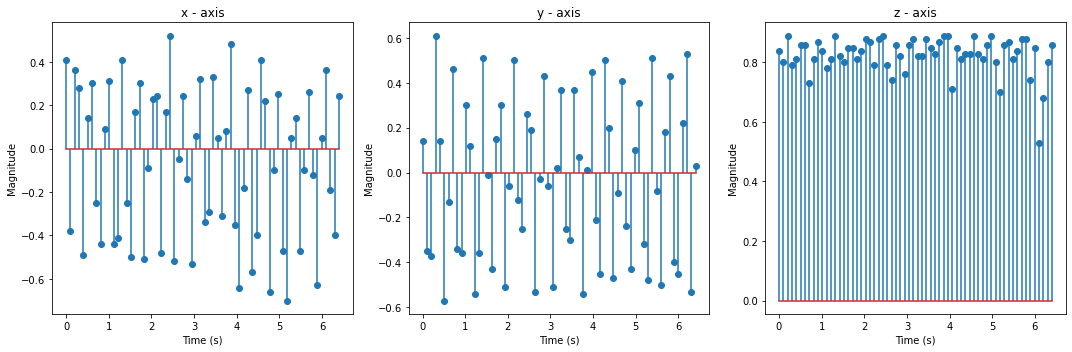

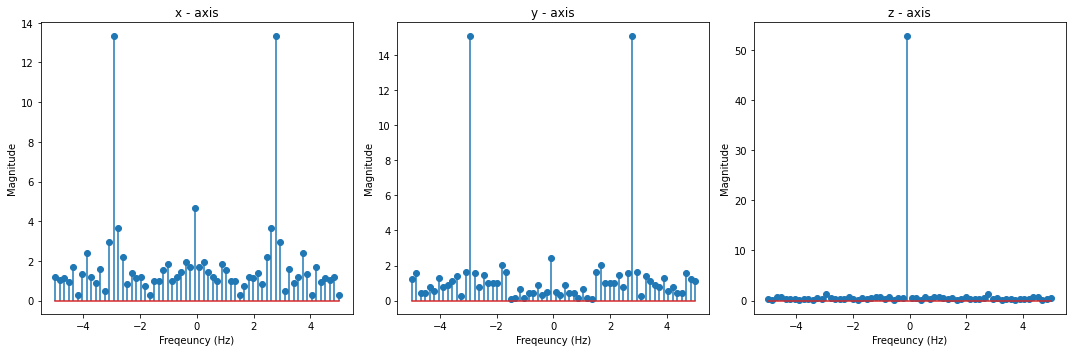

x
[0.22, -0.77, 0.08, 0.28, -0.17, -0.63, 0.32, 0.29, -0.68, 0.43, 0.39, -0.25, -0.73, 0.06, 0.58, -0.67, -0.41, 0.31, -0.65, -0.92, 0.35, 0.22, -0.45, -0.9, 0.35, 0.14, -0.72, 0.18, 0.38, -0.12, -0.23, 0.45, 0.47, -0.58, 0.57, 0.32, -0.36, -0.58, 0.35, 0.35, -0.78, -0.44, 0.27, 0.09, -0.49, 0.19, 0.27, -0.03, -0.43, 0.33, 0.07, -0.48, 0.52, 0.45, 0.02, -0.62, 0.42, 0.31, -0.23, 0.13, 0.33, -0.06, -0.75, -0.2]
[0.14, -0.35, -0.37, 0.61, 0.14, -0.57, -0.13, 0.46, -0.34, -0.36, 0.3, 0.12, -0.54, -0.36, 0.51, -0.01, -0.43, 0.15, 0.3, -0.51, -0.06, 0.5, -0.12, -0.25, 0.26, 0.19, -0.53, -0.03, 0.43, -0.06, -0.51, 0.02, 0.37, -0.25, -0.3, 0.37, 0.07, -0.54, 0.01, 0.45, -0.21, -0.45, 0.5, 0.2, -0.47, -0.09, 0.41, -0.24, -0.43, 0.1, 0.31, -0.32, -0.48, 0.51, -0.08, -0.5, 0.18, 0.43, -0.4, -0.45, 0.22, 0.53, -0.53, 0.03]
[0.84, 0.8, 0.89, 0.79, 0.81, 0.86, 0.86, 0.73, 0.81, 0.87, 0.84, 0.78, 0.81, 0.89, 0.82, 0.8, 0.85, 0.85, 0.81, 0.84, 0.88, 0.87, 0.79, 0.88, 0.89, 0.79, 0.74, 0.86, 0.82, 0.7

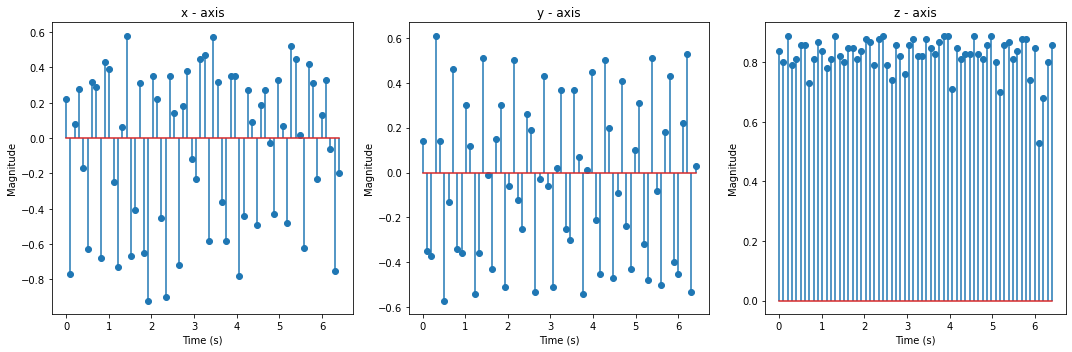

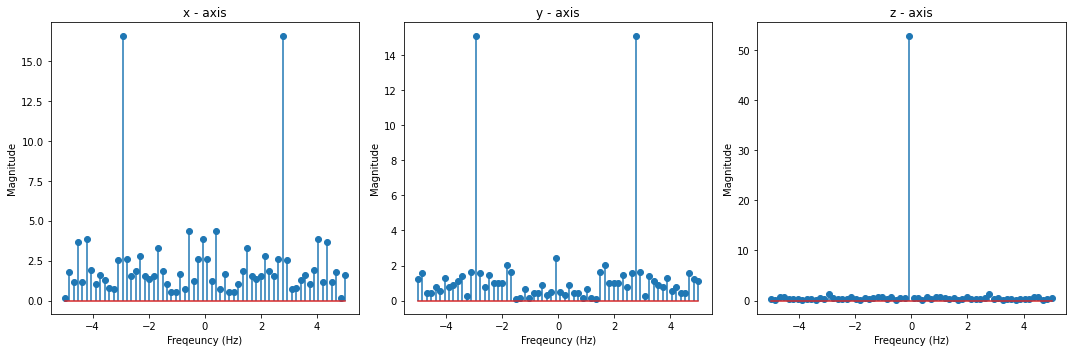

y
[0.22, -0.77, 0.08, 0.28, -0.17, -0.63, 0.32, 0.29, -0.68, 0.43, 0.39, -0.25, -0.73, 0.06, 0.58, -0.67, -0.41, 0.31, -0.65, -0.92, 0.35, 0.22, -0.45, -0.9, 0.35, 0.14, -0.72, 0.18, 0.38, -0.12, -0.23, 0.45, 0.47, -0.58, 0.57, 0.32, -0.36, -0.58, 0.35, 0.35, -0.78, -0.44, 0.27, 0.09, -0.49, 0.19, 0.27, -0.03, -0.43, 0.33, 0.07, -0.48, 0.52, 0.45, 0.02, -0.62, 0.42, 0.31, -0.23, 0.13, 0.33, -0.06, -0.75, -0.2]
[0.05, -0.32, -0.48, 0.25, 0.34, -0.46, -0.34, 0.54, 0.07, -0.47, -0.08, 0.4, -0.23, -0.4, 0.44, -0.02, -0.66, 0.11, 0.35, -0.38, -0.44, 0.42, 0.07, -0.55, -0.11, 0.55, 0.14, -0.62, 0.04, 0.45, -0.53, -0.38, 0.48, 0.03, -0.55, 0.1, 0.3, -0.51, -0.52, 0.42, 0.13, -0.54, -0.15, 0.61, 0.04, -0.66, 0.29, 0.38, -0.53, -0.44, 0.67, -0.02, -0.66, 0.14, 0.37, -0.16, -0.41, 0.47, -0.22, -0.76, 0.02, 0.53, -0.07, -0.54]
[0.84, 0.8, 0.89, 0.79, 0.81, 0.86, 0.86, 0.73, 0.81, 0.87, 0.84, 0.78, 0.81, 0.89, 0.82, 0.8, 0.85, 0.85, 0.81, 0.84, 0.88, 0.87, 0.79, 0.88, 0.89, 0.79, 0.74, 0.86, 0.82,

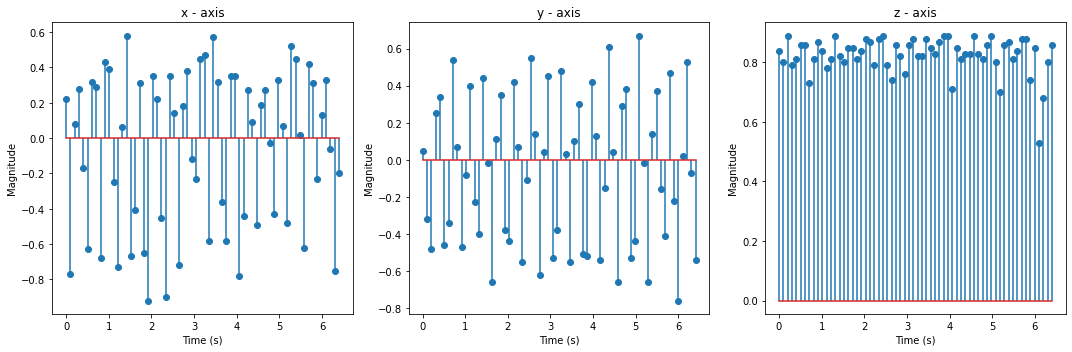

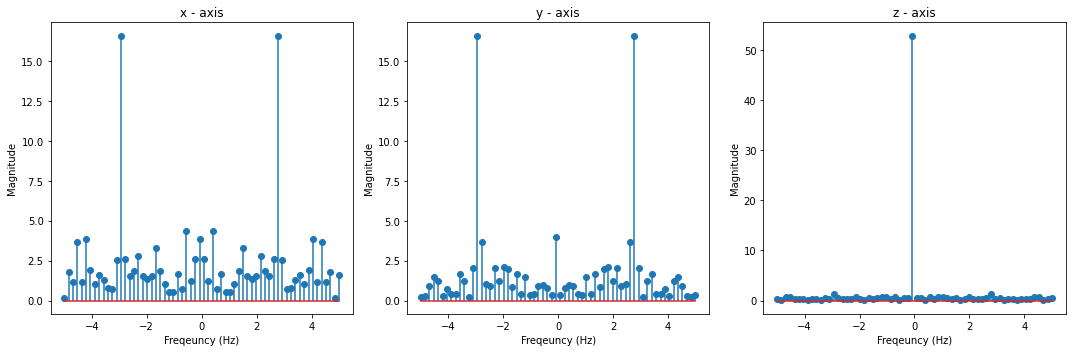

z
[0.22, -0.77, 0.08, 0.28, -0.17, -0.63, 0.32, 0.29, -0.68, 0.43, 0.39, -0.25, -0.73, 0.06, 0.58, -0.67, -0.41, 0.31, -0.65, -0.92, 0.35, 0.22, -0.45, -0.9, 0.35, 0.14, -0.72, 0.18, 0.38, -0.12, -0.23, 0.45, 0.47, -0.58, 0.57, 0.32, -0.36, -0.58, 0.35, 0.35, -0.78, -0.44, 0.27, 0.09, -0.49, 0.19, 0.27, -0.03, -0.43, 0.33, 0.07, -0.48, 0.52, 0.45, 0.02, -0.62, 0.42, 0.31, -0.23, 0.13, 0.33, -0.06, -0.75, -0.2]
[0.05, -0.32, -0.48, 0.25, 0.34, -0.46, -0.34, 0.54, 0.07, -0.47, -0.08, 0.4, -0.23, -0.4, 0.44, -0.02, -0.66, 0.11, 0.35, -0.38, -0.44, 0.42, 0.07, -0.55, -0.11, 0.55, 0.14, -0.62, 0.04, 0.45, -0.53, -0.38, 0.48, 0.03, -0.55, 0.1, 0.3, -0.51, -0.52, 0.42, 0.13, -0.54, -0.15, 0.61, 0.04, -0.66, 0.29, 0.38, -0.53, -0.44, 0.67, -0.02, -0.66, 0.14, 0.37, -0.16, -0.41, 0.47, -0.22, -0.76, 0.02, 0.53, -0.07, -0.54]
[0.88, 0.65, 0.82, 0.88, 0.85, 0.76, 0.87, 0.88, 0.78, 0.88, 0.87, 0.82, 0.81, 0.84, 0.86, 0.8, 0.95, 0.88, 0.83, 0.98, 0.89, 0.83, 0.84, 0.74, 0.88, 0.83, 0.75, 0.87, 0.89

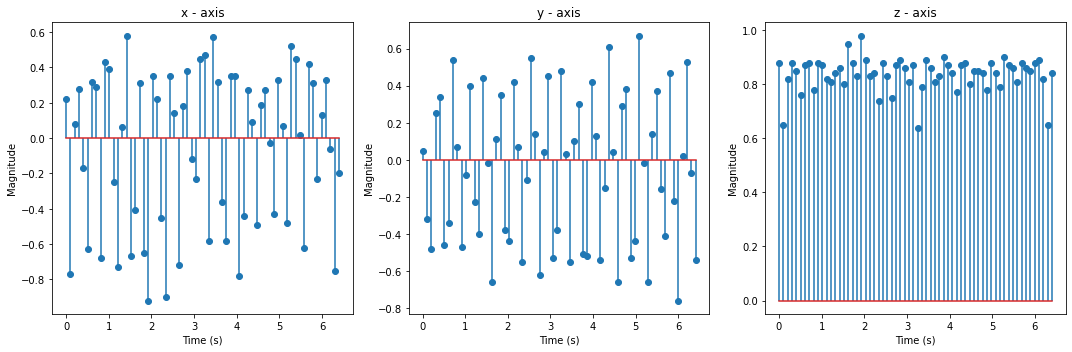

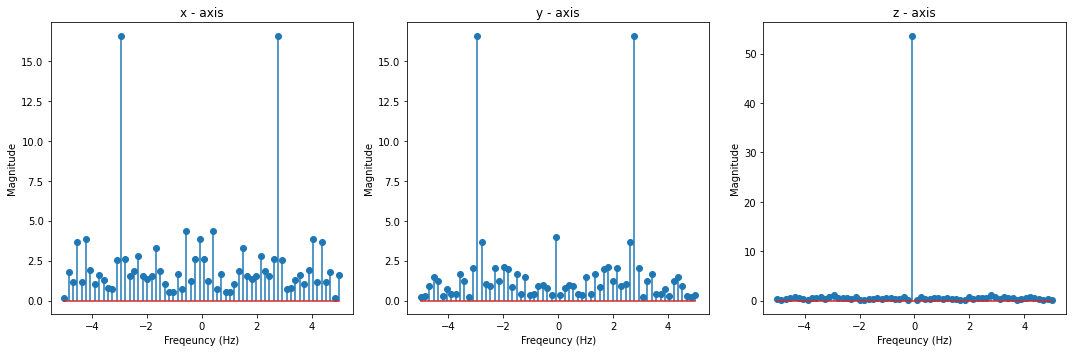

x
[0.67, -0.04, -1.11, 0.2, 0.38, -0.55, 0.1, 0.39, 0.03, -0.47, 0.37, 0.38, -0.36, -0.9, 0.49, 0.18, -0.8, -0.05, 0.31, -0.36, -1.11, 0.48, 0.11, -0.48, -0.03, 0.45, 0.01, -0.74, 0.43, 0.34, -0.71, -0.28, 0.41, -0.32, -0.24, 0.47, 0.24, -0.74, 0.1, 0.42, -0.42, -0.41, 0.49, 0.0, -0.65, 0.03, 0.34, -0.34, -0.46, 0.41, 0.27, -0.51, -0.14, 0.11, -0.1, -0.51, 0.29, 0.28, -0.5, 0.04, 0.38, -0.5, -0.4, 0.25]
[0.05, -0.32, -0.48, 0.25, 0.34, -0.46, -0.34, 0.54, 0.07, -0.47, -0.08, 0.4, -0.23, -0.4, 0.44, -0.02, -0.66, 0.11, 0.35, -0.38, -0.44, 0.42, 0.07, -0.55, -0.11, 0.55, 0.14, -0.62, 0.04, 0.45, -0.53, -0.38, 0.48, 0.03, -0.55, 0.1, 0.3, -0.51, -0.52, 0.42, 0.13, -0.54, -0.15, 0.61, 0.04, -0.66, 0.29, 0.38, -0.53, -0.44, 0.67, -0.02, -0.66, 0.14, 0.37, -0.16, -0.41, 0.47, -0.22, -0.76, 0.02, 0.53, -0.07, -0.54]
[0.88, 0.65, 0.82, 0.88, 0.85, 0.76, 0.87, 0.88, 0.78, 0.88, 0.87, 0.82, 0.81, 0.84, 0.86, 0.8, 0.95, 0.88, 0.83, 0.98, 0.89, 0.83, 0.84, 0.74, 0.88, 0.83, 0.75, 0.87, 0.89, 0.86,

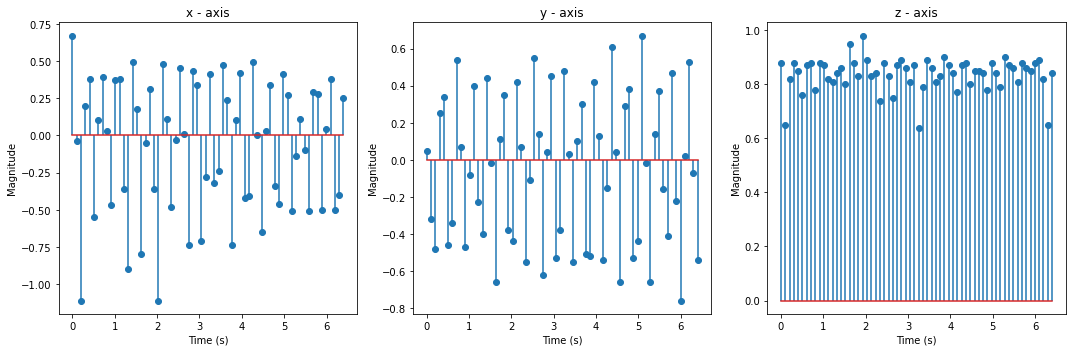

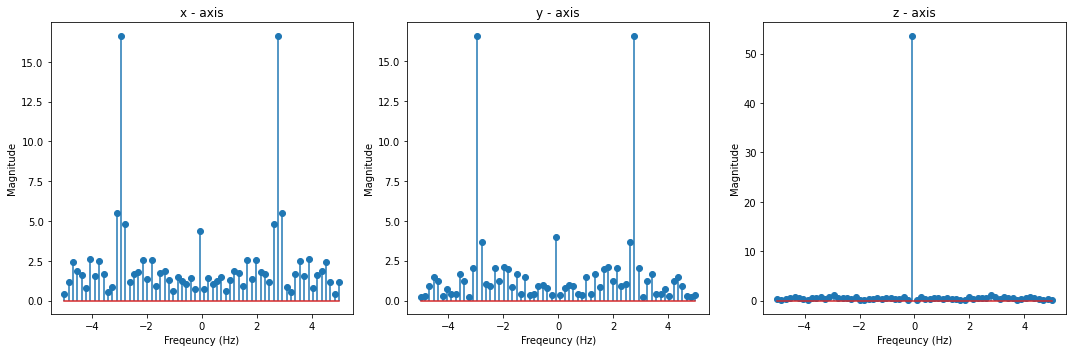

y
[0.67, -0.04, -1.11, 0.2, 0.38, -0.55, 0.1, 0.39, 0.03, -0.47, 0.37, 0.38, -0.36, -0.9, 0.49, 0.18, -0.8, -0.05, 0.31, -0.36, -1.11, 0.48, 0.11, -0.48, -0.03, 0.45, 0.01, -0.74, 0.43, 0.34, -0.71, -0.28, 0.41, -0.32, -0.24, 0.47, 0.24, -0.74, 0.1, 0.42, -0.42, -0.41, 0.49, 0.0, -0.65, 0.03, 0.34, -0.34, -0.46, 0.41, 0.27, -0.51, -0.14, 0.11, -0.1, -0.51, 0.29, 0.28, -0.5, 0.04, 0.38, -0.5, -0.4, 0.25]
[0.39, 0.35, -0.22, -0.33, 0.35, 0.28, -0.6, -0.09, 0.54, -0.43, -0.61, 0.22, 0.38, -0.44, -0.42, 0.51, -0.23, -0.5, 0.11, 0.42, -0.14, -0.54, 0.51, 0.09, -0.69, 0.04, 0.49, -0.39, -0.51, 0.84, -0.14, -0.64, 0.22, 0.41, -0.44, -0.39, 1.0, -0.17, -0.59, -0.21, 0.23, -0.48, -0.07, 0.43, 0.03, -0.54, 0.21, 0.37, -0.27, -0.32, 0.78, 0.32, -0.59, 1.41, 0.4, -0.25, -0.38, 1.26, -0.07, -0.63, 0.14, 0.37, -0.41, -0.38]
[0.88, 0.65, 0.82, 0.88, 0.85, 0.76, 0.87, 0.88, 0.78, 0.88, 0.87, 0.82, 0.81, 0.84, 0.86, 0.8, 0.95, 0.88, 0.83, 0.98, 0.89, 0.83, 0.84, 0.74, 0.88, 0.83, 0.75, 0.87, 0.89, 0.86

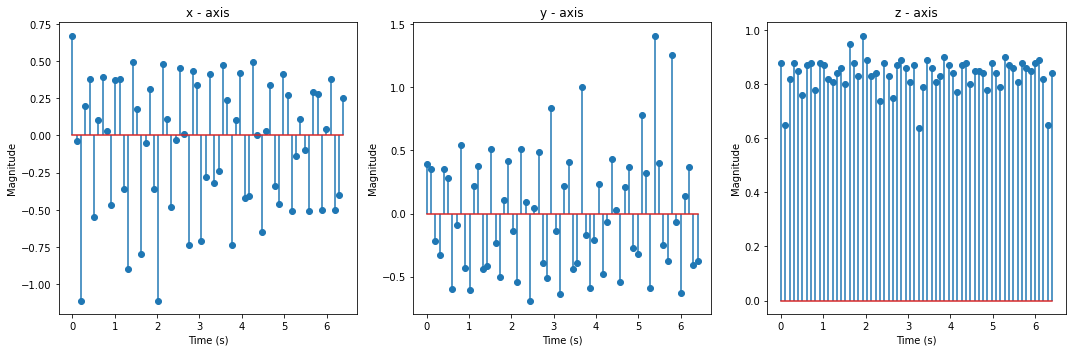

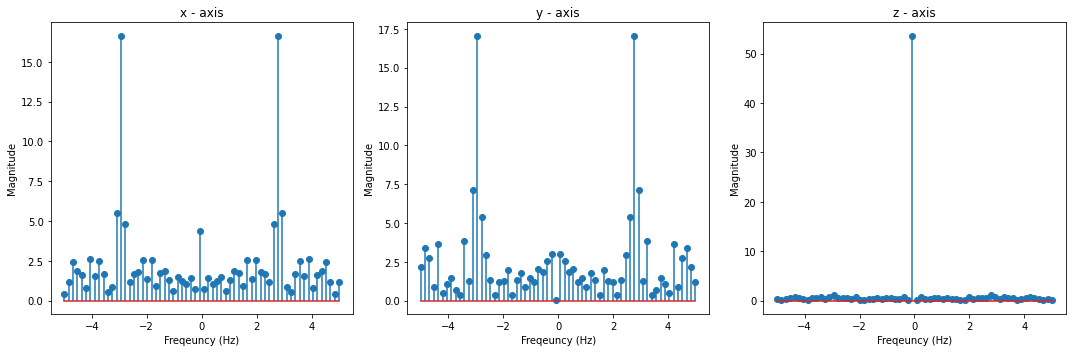

z
[0.67, -0.04, -1.11, 0.2, 0.38, -0.55, 0.1, 0.39, 0.03, -0.47, 0.37, 0.38, -0.36, -0.9, 0.49, 0.18, -0.8, -0.05, 0.31, -0.36, -1.11, 0.48, 0.11, -0.48, -0.03, 0.45, 0.01, -0.74, 0.43, 0.34, -0.71, -0.28, 0.41, -0.32, -0.24, 0.47, 0.24, -0.74, 0.1, 0.42, -0.42, -0.41, 0.49, 0.0, -0.65, 0.03, 0.34, -0.34, -0.46, 0.41, 0.27, -0.51, -0.14, 0.11, -0.1, -0.51, 0.29, 0.28, -0.5, 0.04, 0.38, -0.5, -0.4, 0.25]
[0.39, 0.35, -0.22, -0.33, 0.35, 0.28, -0.6, -0.09, 0.54, -0.43, -0.61, 0.22, 0.38, -0.44, -0.42, 0.51, -0.23, -0.5, 0.11, 0.42, -0.14, -0.54, 0.51, 0.09, -0.69, 0.04, 0.49, -0.39, -0.51, 0.84, -0.14, -0.64, 0.22, 0.41, -0.44, -0.39, 1.0, -0.17, -0.59, -0.21, 0.23, -0.48, -0.07, 0.43, 0.03, -0.54, 0.21, 0.37, -0.27, -0.32, 0.78, 0.32, -0.59, 1.41, 0.4, -0.25, -0.38, 1.26, -0.07, -0.63, 0.14, 0.37, -0.41, -0.38]
[1.33, 0.84, 0.76, 0.84, 0.73, 0.79, 0.87, 0.9, 0.84, 0.79, 0.87, 0.76, 0.79, 1.01, 0.86, 0.86, 0.73, 0.86, 0.88, 0.82, 1.18, 0.88, 0.91, 0.85, 0.84, 0.9, 0.83, 0.69, 0.91, 0.94,

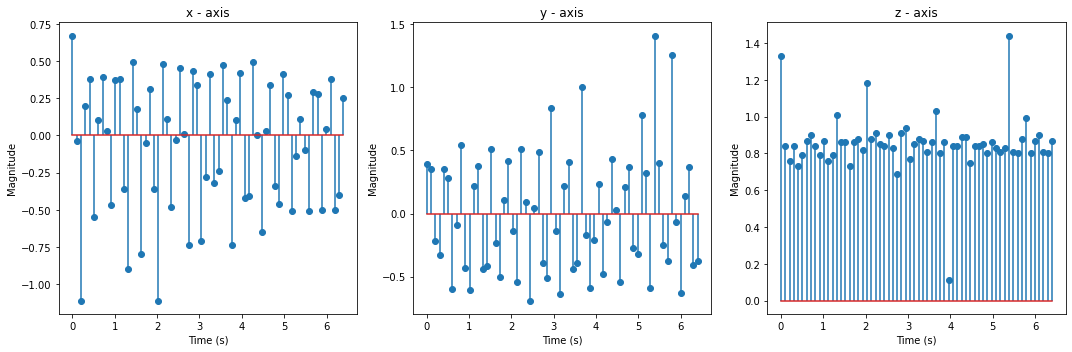

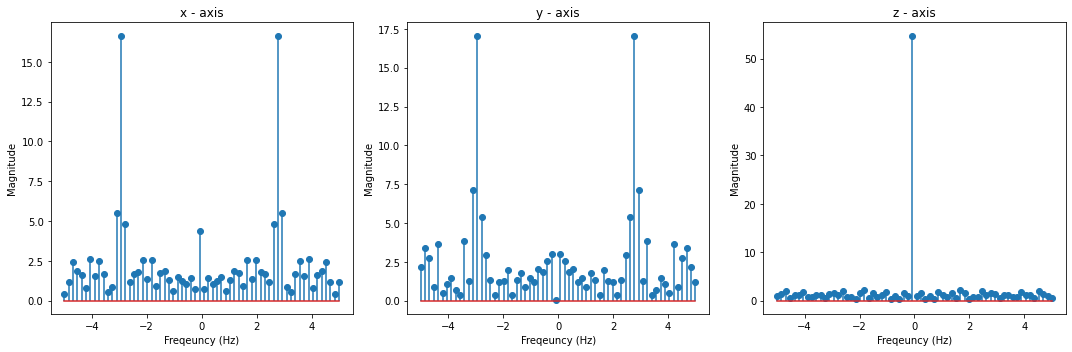

x
[0.27, -0.32, 0.09, 0.34, -0.17, -0.59, 0.37, 0.15, -0.47, -0.33, 0.38, -0.15, -0.57, 0.23, 0.56, -0.55, -0.38, 0.51, -0.11, -0.43, 0.68, 0.41, -0.56, -0.36, 0.43, -0.05, -0.35, 0.15, 0.49, -0.23, -0.68, 0.47, 0.24, -0.52, 0.09, 0.3, -0.06, -0.58, 0.51, 0.39, -0.42, 0.29, 0.36, 0.19, -0.44, 0.3, 0.52, -0.66, -0.63, 0.09, 0.53, -0.45, -0.13, 0.39, 0.39, -0.69, 0.1, 0.47, -0.68, -0.55, 0.62, -0.12, -0.55, 0.16]
[0.39, 0.35, -0.22, -0.33, 0.35, 0.28, -0.6, -0.09, 0.54, -0.43, -0.61, 0.22, 0.38, -0.44, -0.42, 0.51, -0.23, -0.5, 0.11, 0.42, -0.14, -0.54, 0.51, 0.09, -0.69, 0.04, 0.49, -0.39, -0.51, 0.84, -0.14, -0.64, 0.22, 0.41, -0.44, -0.39, 1.0, -0.17, -0.59, -0.21, 0.23, -0.48, -0.07, 0.43, 0.03, -0.54, 0.21, 0.37, -0.27, -0.32, 0.78, 0.32, -0.59, 1.41, 0.4, -0.25, -0.38, 1.26, -0.07, -0.63, 0.14, 0.37, -0.41, -0.38]
[1.33, 0.84, 0.76, 0.84, 0.73, 0.79, 0.87, 0.9, 0.84, 0.79, 0.87, 0.76, 0.79, 1.01, 0.86, 0.86, 0.73, 0.86, 0.88, 0.82, 1.18, 0.88, 0.91, 0.85, 0.84, 0.9, 0.83, 0.69, 0.9

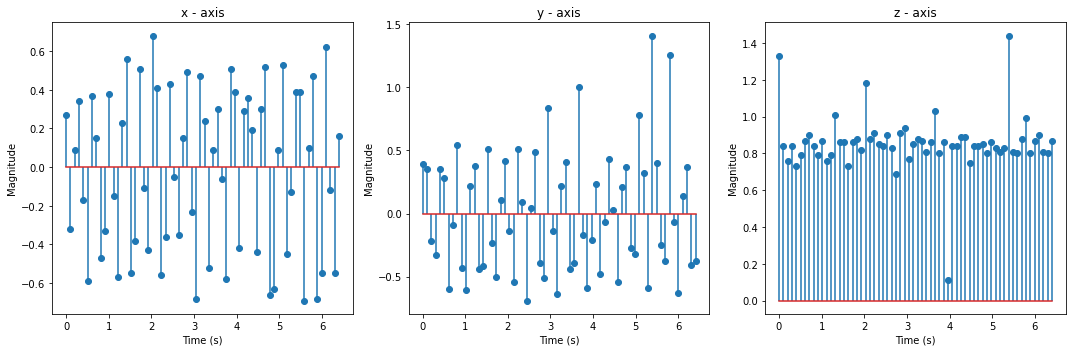

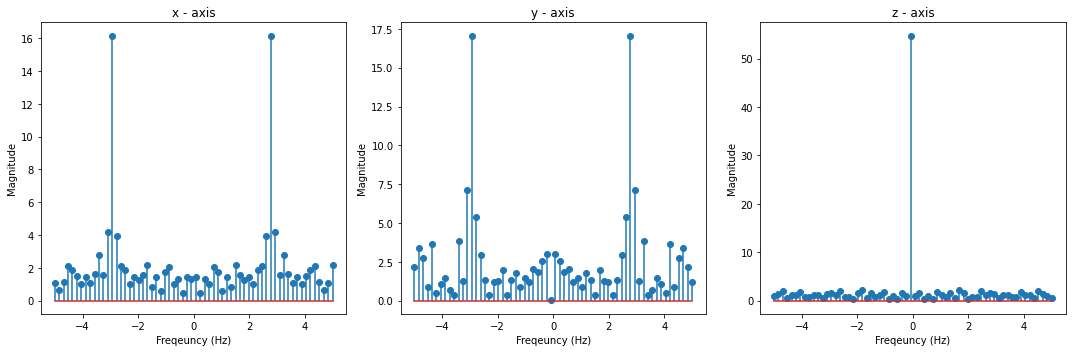

y
[0.27, -0.32, 0.09, 0.34, -0.17, -0.59, 0.37, 0.15, -0.47, -0.33, 0.38, -0.15, -0.57, 0.23, 0.56, -0.55, -0.38, 0.51, -0.11, -0.43, 0.68, 0.41, -0.56, -0.36, 0.43, -0.05, -0.35, 0.15, 0.49, -0.23, -0.68, 0.47, 0.24, -0.52, 0.09, 0.3, -0.06, -0.58, 0.51, 0.39, -0.42, 0.29, 0.36, 0.19, -0.44, 0.3, 0.52, -0.66, -0.63, 0.09, 0.53, -0.45, -0.13, 0.39, 0.39, -0.69, 0.1, 0.47, -0.68, -0.55, 0.62, -0.12, -0.55, 0.16]
[-0.35, -0.29, -0.47, -0.97, 0.43, -0.43, -0.27, 0.5, 0.1, -0.65, -0.02, 0.34, -0.09, -0.55, 0.29, 0.08, -0.6, -0.22, 0.41, -0.07, -0.63, 0.45, 0.06, -0.56, -0.26, 0.51, -0.19, -0.58, 0.23, 0.53, -0.43, -0.26, 0.44, -0.05, -0.59, 0.27, 0.4, -0.22, -0.39, 0.45, 0.17, -0.62, -0.22, 0.64, -0.22, -0.7, 0.28, 0.37, -0.16, -0.23, 0.65, 0.33, -0.46, -0.42, 0.71, -0.06, -0.32, 0.29, -0.65, -0.45, -0.39, 0.46, -0.48, -0.44]
[1.33, 0.84, 0.76, 0.84, 0.73, 0.79, 0.87, 0.9, 0.84, 0.79, 0.87, 0.76, 0.79, 1.01, 0.86, 0.86, 0.73, 0.86, 0.88, 0.82, 1.18, 0.88, 0.91, 0.85, 0.84, 0.9, 0.83, 0.69,

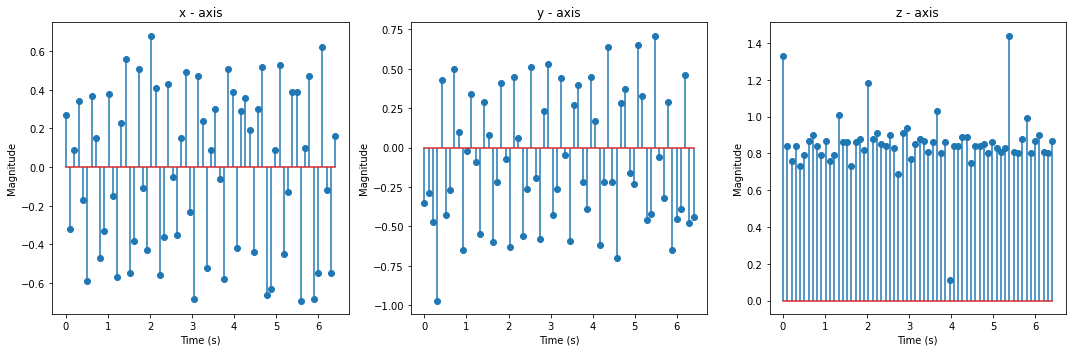

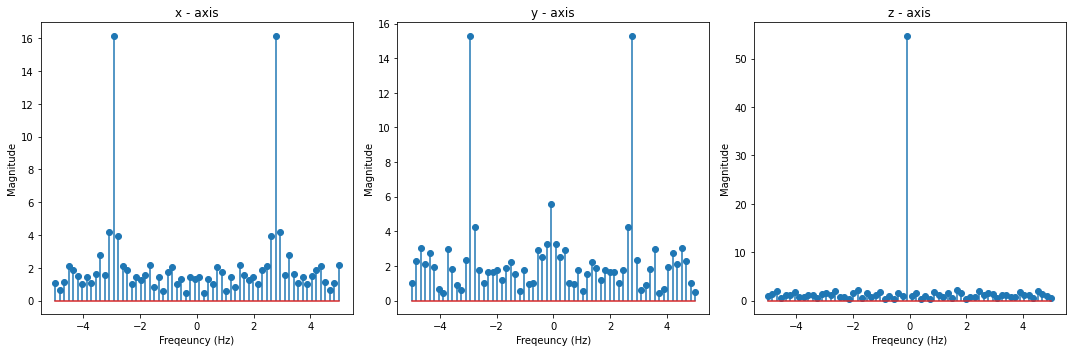

z
[0.27, -0.32, 0.09, 0.34, -0.17, -0.59, 0.37, 0.15, -0.47, -0.33, 0.38, -0.15, -0.57, 0.23, 0.56, -0.55, -0.38, 0.51, -0.11, -0.43, 0.68, 0.41, -0.56, -0.36, 0.43, -0.05, -0.35, 0.15, 0.49, -0.23, -0.68, 0.47, 0.24, -0.52, 0.09, 0.3, -0.06, -0.58, 0.51, 0.39, -0.42, 0.29, 0.36, 0.19, -0.44, 0.3, 0.52, -0.66, -0.63, 0.09, 0.53, -0.45, -0.13, 0.39, 0.39, -0.69, 0.1, 0.47, -0.68, -0.55, 0.62, -0.12, -0.55, 0.16]
[-0.35, -0.29, -0.47, -0.97, 0.43, -0.43, -0.27, 0.5, 0.1, -0.65, -0.02, 0.34, -0.09, -0.55, 0.29, 0.08, -0.6, -0.22, 0.41, -0.07, -0.63, 0.45, 0.06, -0.56, -0.26, 0.51, -0.19, -0.58, 0.23, 0.53, -0.43, -0.26, 0.44, -0.05, -0.59, 0.27, 0.4, -0.22, -0.39, 0.45, 0.17, -0.62, -0.22, 0.64, -0.22, -0.7, 0.28, 0.37, -0.16, -0.23, 0.65, 0.33, -0.46, -0.42, 0.71, -0.06, -0.32, 0.29, -0.65, -0.45, -0.39, 0.46, -0.48, -0.44]
[0.87, 0.81, 0.86, 0.87, 0.82, 0.73, 0.88, 0.89, 0.86, 0.81, 0.88, 0.81, 0.79, 0.86, 0.72, 0.77, 0.79, 0.81, 0.84, 0.84, 0.91, 0.79, 0.85, 0.84, 0.89, 0.86, 0.82, 0.8

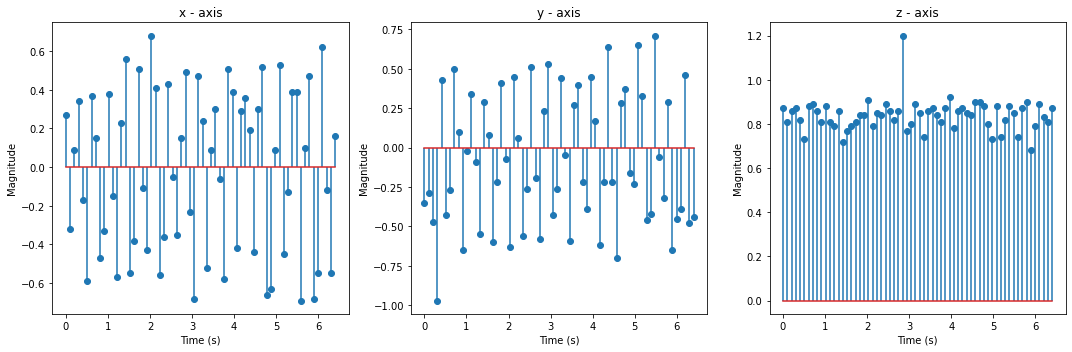

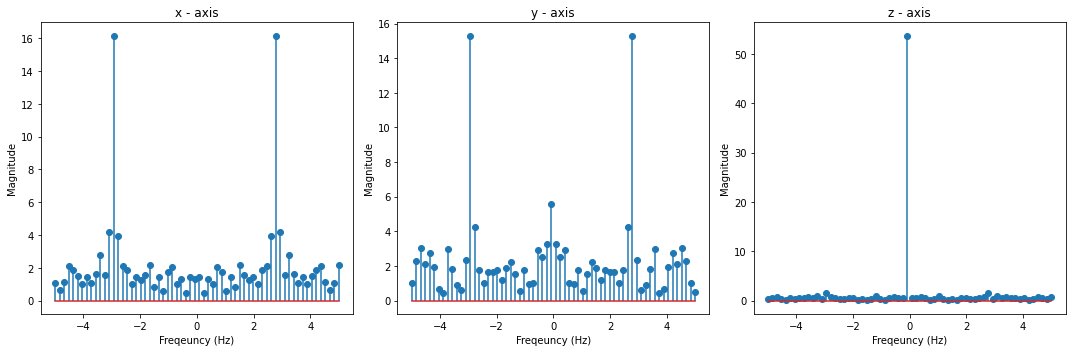

x
[-0.45, -0.32, 0.46, 0.15, -0.53, 0.47, 0.17, -0.56, -0.29, 0.51, -0.15, -0.52, 0.27, 0.44, -0.5, -0.64, 0.47, 0.22, -0.18, 0.53, 0.32, -0.34, -0.48, 0.07, 0.15, -0.48, -0.03, 0.49, -0.04, -0.52, -0.0, 0.41, -0.96, 0.15, 0.44, 0.03, -0.46, -0.08, 0.23, -0.68, -0.5, 0.29, 0.23, -0.37, 0.21, 0.38, -0.26, -0.58, 0.51, 0.31, -0.68, -0.08, 0.37, -0.43, -0.59, 0.14, 0.3, -0.6, -0.54, 0.35, 0.15, -0.49, 0.55, 0.07]
[-0.35, -0.29, -0.47, -0.97, 0.43, -0.43, -0.27, 0.5, 0.1, -0.65, -0.02, 0.34, -0.09, -0.55, 0.29, 0.08, -0.6, -0.22, 0.41, -0.07, -0.63, 0.45, 0.06, -0.56, -0.26, 0.51, -0.19, -0.58, 0.23, 0.53, -0.43, -0.26, 0.44, -0.05, -0.59, 0.27, 0.4, -0.22, -0.39, 0.45, 0.17, -0.62, -0.22, 0.64, -0.22, -0.7, 0.28, 0.37, -0.16, -0.23, 0.65, 0.33, -0.46, -0.42, 0.71, -0.06, -0.32, 0.29, -0.65, -0.45, -0.39, 0.46, -0.48, -0.44]
[0.87, 0.81, 0.86, 0.87, 0.82, 0.73, 0.88, 0.89, 0.86, 0.81, 0.88, 0.81, 0.79, 0.86, 0.72, 0.77, 0.79, 0.81, 0.84, 0.84, 0.91, 0.79, 0.85, 0.84, 0.89, 0.86, 0.82, 0.86

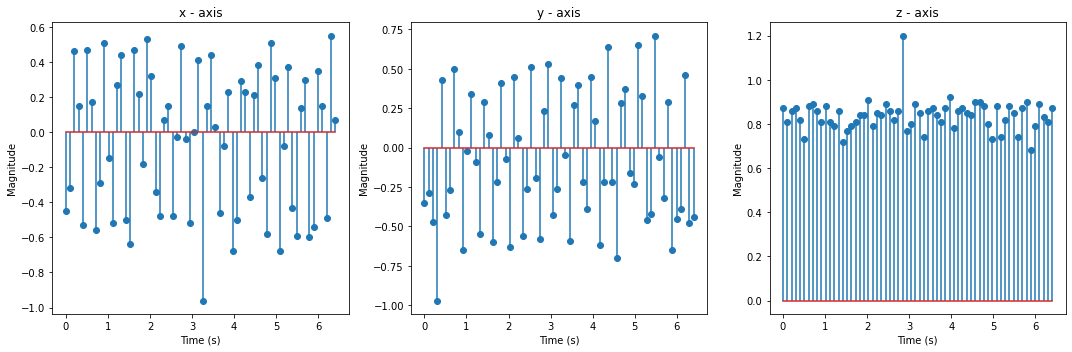

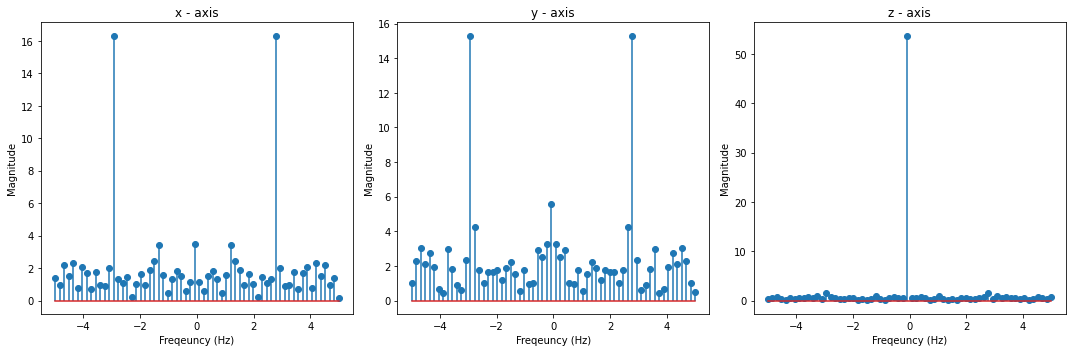

y
[-0.45, -0.32, 0.46, 0.15, -0.53, 0.47, 0.17, -0.56, -0.29, 0.51, -0.15, -0.52, 0.27, 0.44, -0.5, -0.64, 0.47, 0.22, -0.18, 0.53, 0.32, -0.34, -0.48, 0.07, 0.15, -0.48, -0.03, 0.49, -0.04, -0.52, -0.0, 0.41, -0.96, 0.15, 0.44, 0.03, -0.46, -0.08, 0.23, -0.68, -0.5, 0.29, 0.23, -0.37, 0.21, 0.38, -0.26, -0.58, 0.51, 0.31, -0.68, -0.08, 0.37, -0.43, -0.59, 0.14, 0.3, -0.6, -0.54, 0.35, 0.15, -0.49, 0.55, 0.07]
[0.04, -0.66, -0.0, 0.57, 0.12, -0.48, 0.52, -0.07, -0.61, -0.03, 0.38, 0.21, -0.48, 0.42, 0.29, -0.37, -0.25, 0.53, -0.15, -0.6, 0.04, 0.41, -0.36, -0.32, 0.56, -0.14, -0.6, 0.0, 0.41, -0.2, -0.49, 0.51, -0.04, -0.68, -0.1, 0.5, -0.01, -0.51, 0.41, -0.08, -0.32, -0.39, 0.64, 0.08, -0.54, -0.11, 0.5, 0.36, -0.4, 0.43, -0.03, -0.6, 0.01, 0.43, -0.11, -0.49, 0.45, -0.03, -0.6, -0.09, 0.48, -0.07, -0.69, 0.63]
[0.87, 0.81, 0.86, 0.87, 0.82, 0.73, 0.88, 0.89, 0.86, 0.81, 0.88, 0.81, 0.79, 0.86, 0.72, 0.77, 0.79, 0.81, 0.84, 0.84, 0.91, 0.79, 0.85, 0.84, 0.89, 0.86, 0.82, 0.86, 1.2, 0

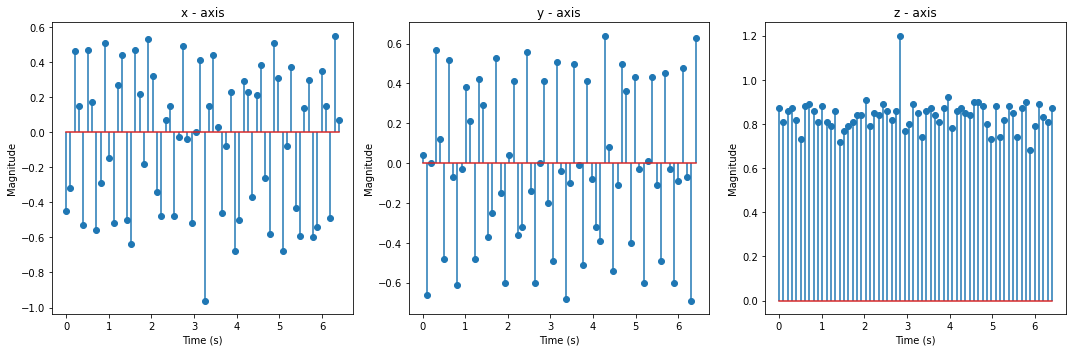

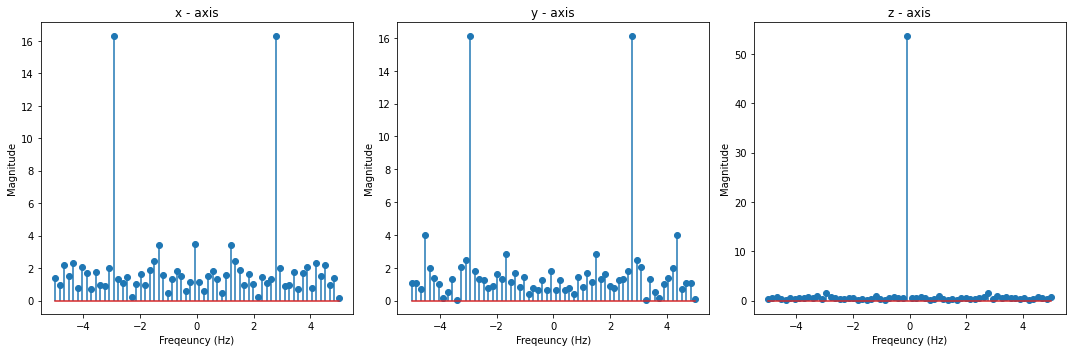

z
[-0.45, -0.32, 0.46, 0.15, -0.53, 0.47, 0.17, -0.56, -0.29, 0.51, -0.15, -0.52, 0.27, 0.44, -0.5, -0.64, 0.47, 0.22, -0.18, 0.53, 0.32, -0.34, -0.48, 0.07, 0.15, -0.48, -0.03, 0.49, -0.04, -0.52, -0.0, 0.41, -0.96, 0.15, 0.44, 0.03, -0.46, -0.08, 0.23, -0.68, -0.5, 0.29, 0.23, -0.37, 0.21, 0.38, -0.26, -0.58, 0.51, 0.31, -0.68, -0.08, 0.37, -0.43, -0.59, 0.14, 0.3, -0.6, -0.54, 0.35, 0.15, -0.49, 0.55, 0.07]
[0.04, -0.66, -0.0, 0.57, 0.12, -0.48, 0.52, -0.07, -0.61, -0.03, 0.38, 0.21, -0.48, 0.42, 0.29, -0.37, -0.25, 0.53, -0.15, -0.6, 0.04, 0.41, -0.36, -0.32, 0.56, -0.14, -0.6, 0.0, 0.41, -0.2, -0.49, 0.51, -0.04, -0.68, -0.1, 0.5, -0.01, -0.51, 0.41, -0.08, -0.32, -0.39, 0.64, 0.08, -0.54, -0.11, 0.5, 0.36, -0.4, 0.43, -0.03, -0.6, 0.01, 0.43, -0.11, -0.49, 0.45, -0.03, -0.6, -0.09, 0.48, -0.07, -0.69, 0.63]
[0.71, 0.82, 0.9, 0.91, 0.87, 0.9, 0.82, 0.77, 0.82, 0.9, 0.84, 0.78, 0.87, 0.89, 0.87, 0.8, 0.9, 0.85, 0.85, 0.9, 0.88, 0.82, 0.81, 0.86, 0.85, 0.8, 0.84, 0.88, 0.84, 0.77, 0

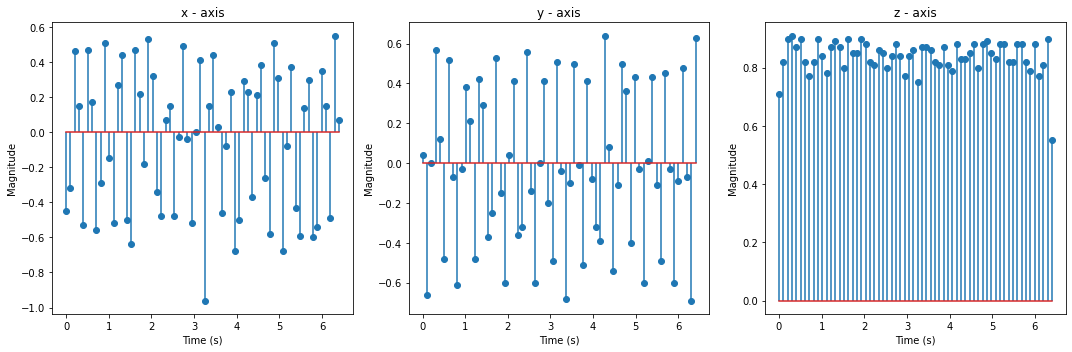

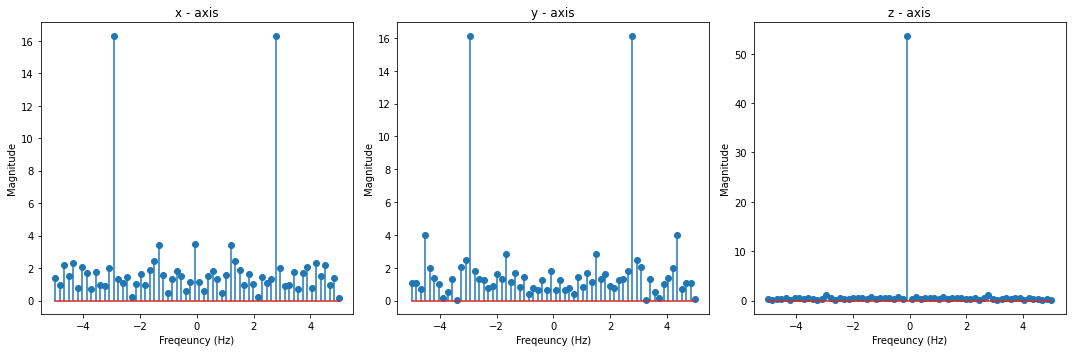

x
[0.33, -0.35, 0.21, 0.27, -0.18, 0.33, 0.2, -0.46, 0.02, 0.35, -0.27, -0.2, 0.65, -0.08, -0.57, 0.4, 0.35, -0.26, -0.56, 0.24, 0.22, -0.48, -0.17, 0.34, 0.07, -0.48, 0.28, 0.32, -0.56, -0.36, 0.3, 0.2, -0.45, -0.19, 0.34, -0.26, -0.2, 0.11, 0.09, -0.32, 0.58, 0.44, -0.51, -0.21, 0.44, 0.31, -0.43, 0.48, 0.22, -0.54, -0.17, 0.22, -0.07, -0.24, 0.04, 0.1, -0.21, -0.03, 0.38, -0.55, -0.03, 0.35, 0.42, -0.72]
[0.04, -0.66, -0.0, 0.57, 0.12, -0.48, 0.52, -0.07, -0.61, -0.03, 0.38, 0.21, -0.48, 0.42, 0.29, -0.37, -0.25, 0.53, -0.15, -0.6, 0.04, 0.41, -0.36, -0.32, 0.56, -0.14, -0.6, 0.0, 0.41, -0.2, -0.49, 0.51, -0.04, -0.68, -0.1, 0.5, -0.01, -0.51, 0.41, -0.08, -0.32, -0.39, 0.64, 0.08, -0.54, -0.11, 0.5, 0.36, -0.4, 0.43, -0.03, -0.6, 0.01, 0.43, -0.11, -0.49, 0.45, -0.03, -0.6, -0.09, 0.48, -0.07, -0.69, 0.63]
[0.71, 0.82, 0.9, 0.91, 0.87, 0.9, 0.82, 0.77, 0.82, 0.9, 0.84, 0.78, 0.87, 0.89, 0.87, 0.8, 0.9, 0.85, 0.85, 0.9, 0.88, 0.82, 0.81, 0.86, 0.85, 0.8, 0.84, 0.88, 0.84, 0.77, 0.84

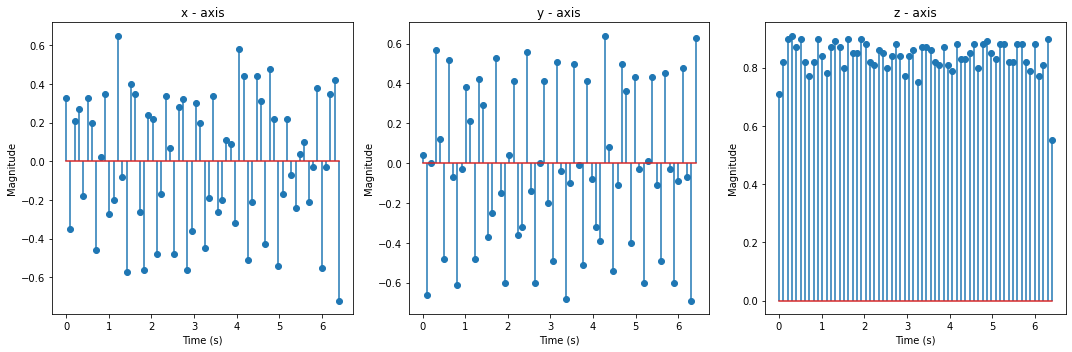

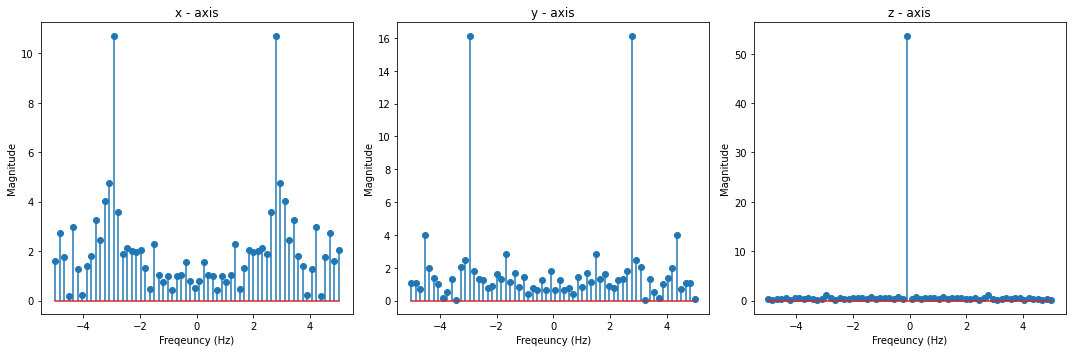

y
[0.33, -0.35, 0.21, 0.27, -0.18, 0.33, 0.2, -0.46, 0.02, 0.35, -0.27, -0.2, 0.65, -0.08, -0.57, 0.4, 0.35, -0.26, -0.56, 0.24, 0.22, -0.48, -0.17, 0.34, 0.07, -0.48, 0.28, 0.32, -0.56, -0.36, 0.3, 0.2, -0.45, -0.19, 0.34, -0.26, -0.2, 0.11, 0.09, -0.32, 0.58, 0.44, -0.51, -0.21, 0.44, 0.31, -0.43, 0.48, 0.22, -0.54, -0.17, 0.22, -0.07, -0.24, 0.04, 0.1, -0.21, -0.03, 0.38, -0.55, -0.03, 0.35, 0.42, -0.72]
[0.24, -0.51, -0.38, 0.68, -0.75, -0.34, 0.34, 0.18, -0.65, -0.08, 0.38, -0.25, -0.27, 0.54, 0.17, -0.49, 0.15, 0.51, -0.43, -0.34, 0.46, -0.14, -0.41, -0.11, 0.52, -0.18, -0.43, 0.27, 0.09, -0.53, -0.25, 0.45, -0.23, -0.46, 0.19, 0.28, -0.34, -0.19, 0.39, 0.07, -0.52, 0.23, 0.22, -0.57, -0.2, 0.59, -0.6, -0.48, 0.44, 0.36, -0.72, -0.03, 0.62, -0.75, -0.23, 0.61, -0.75, -0.44, 0.06, 0.42, -0.57, -0.21, 0.54, -0.25]
[0.71, 0.82, 0.9, 0.91, 0.87, 0.9, 0.82, 0.77, 0.82, 0.9, 0.84, 0.78, 0.87, 0.89, 0.87, 0.8, 0.9, 0.85, 0.85, 0.9, 0.88, 0.82, 0.81, 0.86, 0.85, 0.8, 0.84, 0.88, 0.84, 0.

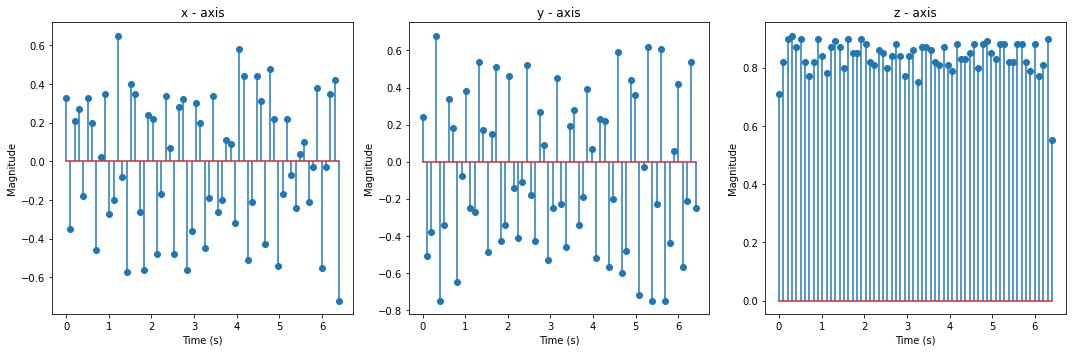

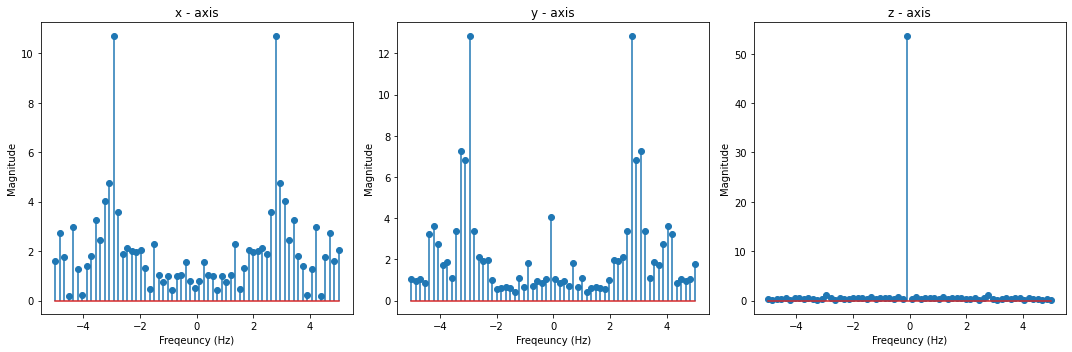

z
[0.33, -0.35, 0.21, 0.27, -0.18, 0.33, 0.2, -0.46, 0.02, 0.35, -0.27, -0.2, 0.65, -0.08, -0.57, 0.4, 0.35, -0.26, -0.56, 0.24, 0.22, -0.48, -0.17, 0.34, 0.07, -0.48, 0.28, 0.32, -0.56, -0.36, 0.3, 0.2, -0.45, -0.19, 0.34, -0.26, -0.2, 0.11, 0.09, -0.32, 0.58, 0.44, -0.51, -0.21, 0.44, 0.31, -0.43, 0.48, 0.22, -0.54, -0.17, 0.22, -0.07, -0.24, 0.04, 0.1, -0.21, -0.03, 0.38, -0.55, -0.03, 0.35, 0.42, -0.72]
[0.24, -0.51, -0.38, 0.68, -0.75, -0.34, 0.34, 0.18, -0.65, -0.08, 0.38, -0.25, -0.27, 0.54, 0.17, -0.49, 0.15, 0.51, -0.43, -0.34, 0.46, -0.14, -0.41, -0.11, 0.52, -0.18, -0.43, 0.27, 0.09, -0.53, -0.25, 0.45, -0.23, -0.46, 0.19, 0.28, -0.34, -0.19, 0.39, 0.07, -0.52, 0.23, 0.22, -0.57, -0.2, 0.59, -0.6, -0.48, 0.44, 0.36, -0.72, -0.03, 0.62, -0.75, -0.23, 0.61, -0.75, -0.44, 0.06, 0.42, -0.57, -0.21, 0.54, -0.25]
[0.18, 0.8, 0.88, 0.7, 0.85, 0.89, 0.85, 0.84, 0.85, 0.9, 0.82, 0.81, 0.89, 0.82, 0.78, 0.86, 0.88, 0.86, 0.8, 0.88, 0.88, 0.82, 0.81, 0.87, 0.89, 0.79, 0.88, 0.87, 0.8, 

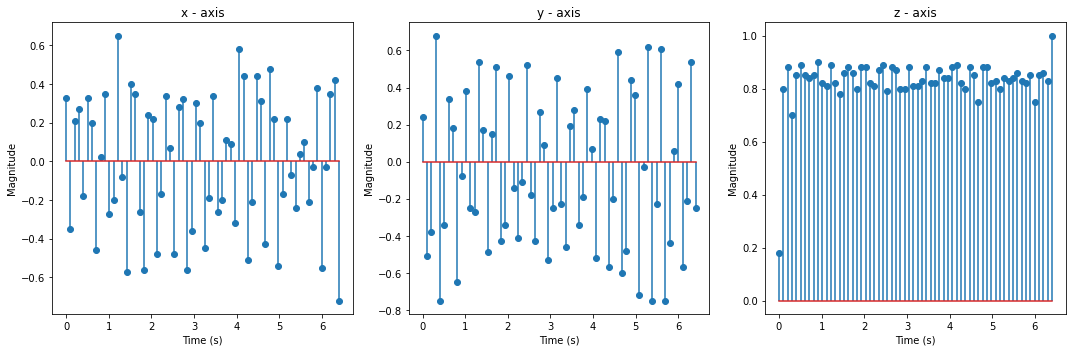

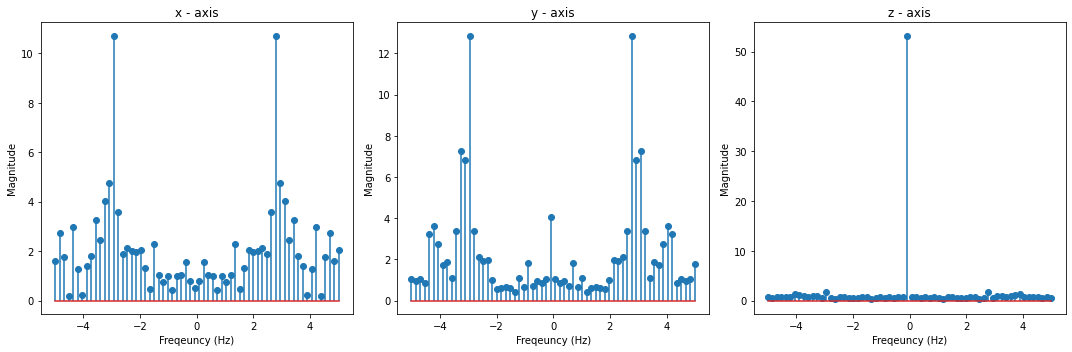

x
[-0.68, 0.33, -0.39, 0.47, 0.46, 0.31, -0.82, 0.66, 0.6, -0.57, -0.43, 0.44, 0.29, -0.67, 0.23, 0.27, 0.1, -0.68, 0.14, 0.41, -0.37, -0.45, 0.45, 0.21, -0.57, 0.26, 0.1, -0.5, -0.83, -0.13, 0.39, -0.39, -0.49, 0.07, 0.16, -0.8, 0.03, 0.27, -0.41, -0.98, 0.32, 0.53, -0.6, 0.16, 0.36, 0.0, -0.14, 0.35, 0.53, -0.25, 0.82, 0.3, -0.24, -0.46, -0.06, 0.27, -0.64, -0.75, 0.57, 0.29, -0.61, 0.67, 0.31, -0.41]
[0.24, -0.51, -0.38, 0.68, -0.75, -0.34, 0.34, 0.18, -0.65, -0.08, 0.38, -0.25, -0.27, 0.54, 0.17, -0.49, 0.15, 0.51, -0.43, -0.34, 0.46, -0.14, -0.41, -0.11, 0.52, -0.18, -0.43, 0.27, 0.09, -0.53, -0.25, 0.45, -0.23, -0.46, 0.19, 0.28, -0.34, -0.19, 0.39, 0.07, -0.52, 0.23, 0.22, -0.57, -0.2, 0.59, -0.6, -0.48, 0.44, 0.36, -0.72, -0.03, 0.62, -0.75, -0.23, 0.61, -0.75, -0.44, 0.06, 0.42, -0.57, -0.21, 0.54, -0.25]
[0.18, 0.8, 0.88, 0.7, 0.85, 0.89, 0.85, 0.84, 0.85, 0.9, 0.82, 0.81, 0.89, 0.82, 0.78, 0.86, 0.88, 0.86, 0.8, 0.88, 0.88, 0.82, 0.81, 0.87, 0.89, 0.79, 0.88, 0.87, 0.8, 0.8,

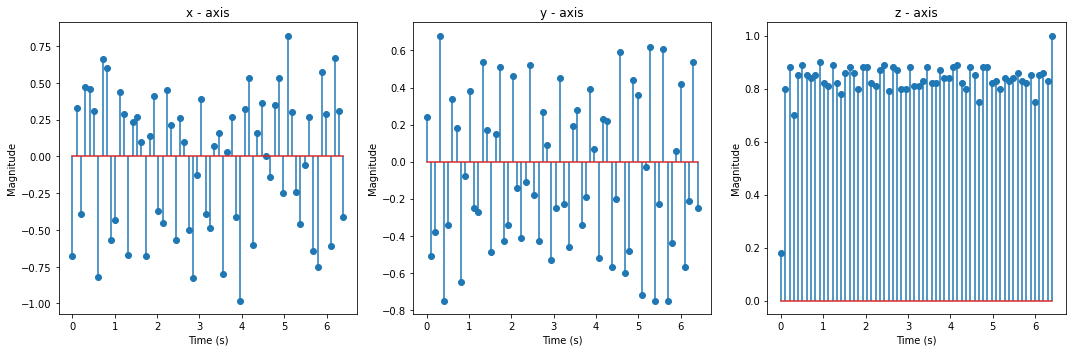

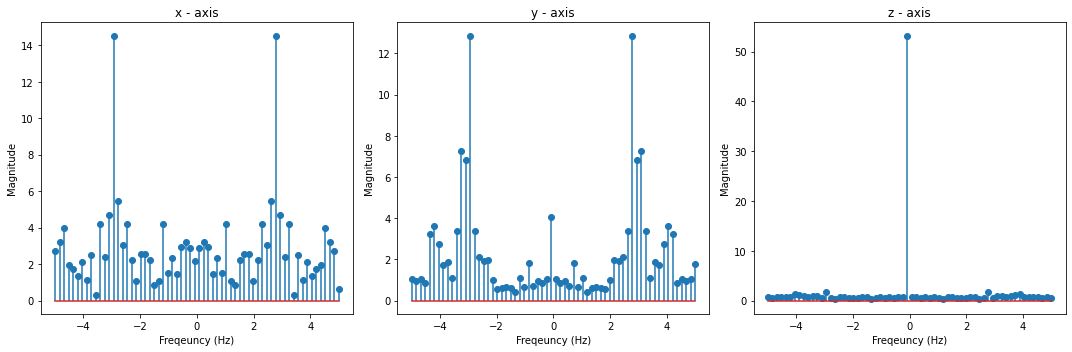

y
[-0.68, 0.33, -0.39, 0.47, 0.46, 0.31, -0.82, 0.66, 0.6, -0.57, -0.43, 0.44, 0.29, -0.67, 0.23, 0.27, 0.1, -0.68, 0.14, 0.41, -0.37, -0.45, 0.45, 0.21, -0.57, 0.26, 0.1, -0.5, -0.83, -0.13, 0.39, -0.39, -0.49, 0.07, 0.16, -0.8, 0.03, 0.27, -0.41, -0.98, 0.32, 0.53, -0.6, 0.16, 0.36, 0.0, -0.14, 0.35, 0.53, -0.25, 0.82, 0.3, -0.24, -0.46, -0.06, 0.27, -0.64, -0.75, 0.57, 0.29, -0.61, 0.67, 0.31, -0.41]
[-0.27, 0.32, 0.45, -0.55, 0.0, 0.45, -0.05, -0.4, 0.2, 0.4, -0.35, -0.25, 0.49, 0.1, -0.57, -0.09, 0.45, 0.0, -0.53, 0.27, 0.09, -0.4, -0.06, 0.35, -0.01, -0.61, 0.27, 0.23, 0.03, -0.59, 0.37, -0.12, -0.49, -0.25, 0.44, -0.19, -0.46, 0.24, 0.18, -0.21, -0.37, 0.57, -0.05, -0.43, 0.21, 0.55, -0.53, -0.3, 0.42, -0.2, -0.54, 0.02, 0.53, -0.28, -0.52, 0.52, 0.12, -0.3, -0.24, 0.53, -0.03, -0.42, 0.31, 0.36]
[0.18, 0.8, 0.88, 0.7, 0.85, 0.89, 0.85, 0.84, 0.85, 0.9, 0.82, 0.81, 0.89, 0.82, 0.78, 0.86, 0.88, 0.86, 0.8, 0.88, 0.88, 0.82, 0.81, 0.87, 0.89, 0.79, 0.88, 0.87, 0.8, 0.8, 0.88, 0.81

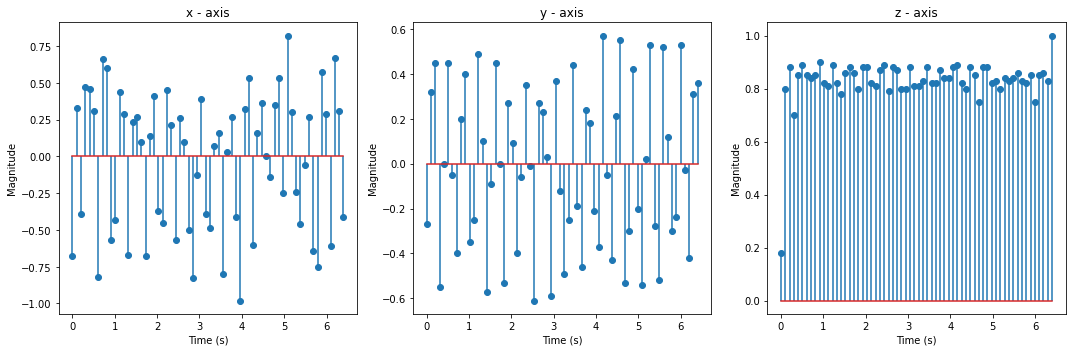

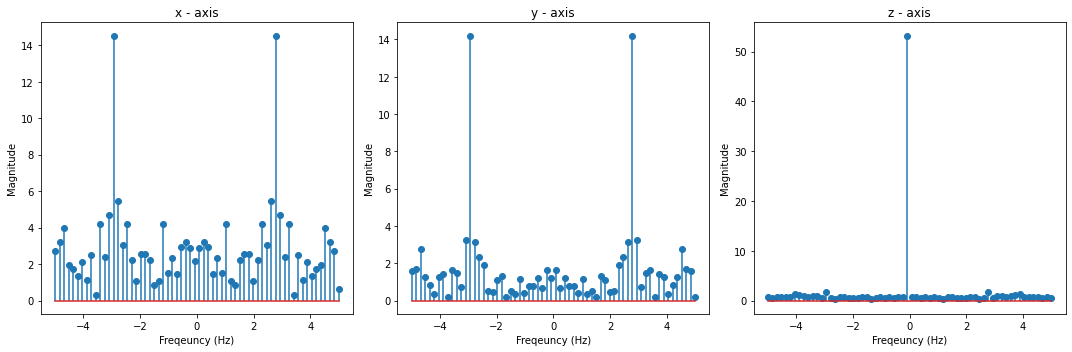

z
[-0.68, 0.33, -0.39, 0.47, 0.46, 0.31, -0.82, 0.66, 0.6, -0.57, -0.43, 0.44, 0.29, -0.67, 0.23, 0.27, 0.1, -0.68, 0.14, 0.41, -0.37, -0.45, 0.45, 0.21, -0.57, 0.26, 0.1, -0.5, -0.83, -0.13, 0.39, -0.39, -0.49, 0.07, 0.16, -0.8, 0.03, 0.27, -0.41, -0.98, 0.32, 0.53, -0.6, 0.16, 0.36, 0.0, -0.14, 0.35, 0.53, -0.25, 0.82, 0.3, -0.24, -0.46, -0.06, 0.27, -0.64, -0.75, 0.57, 0.29, -0.61, 0.67, 0.31, -0.41]
[-0.27, 0.32, 0.45, -0.55, 0.0, 0.45, -0.05, -0.4, 0.2, 0.4, -0.35, -0.25, 0.49, 0.1, -0.57, -0.09, 0.45, 0.0, -0.53, 0.27, 0.09, -0.4, -0.06, 0.35, -0.01, -0.61, 0.27, 0.23, 0.03, -0.59, 0.37, -0.12, -0.49, -0.25, 0.44, -0.19, -0.46, 0.24, 0.18, -0.21, -0.37, 0.57, -0.05, -0.43, 0.21, 0.55, -0.53, -0.3, 0.42, -0.2, -0.54, 0.02, 0.53, -0.28, -0.52, 0.52, 0.12, -0.3, -0.24, 0.53, -0.03, -0.42, 0.31, 0.36]
[0.94, 1.06, 0.83, 0.9, 0.89, 0.85, 0.7, 0.9, 0.89, 0.81, 0.81, 0.86, 0.88, 0.7, 0.86, 0.87, 0.85, 0.75, 0.87, 0.9, 0.79, 0.81, 0.87, 0.85, 0.77, 0.89, 0.85, 0.81, 0.68, 0.84, 0.81, 0.7

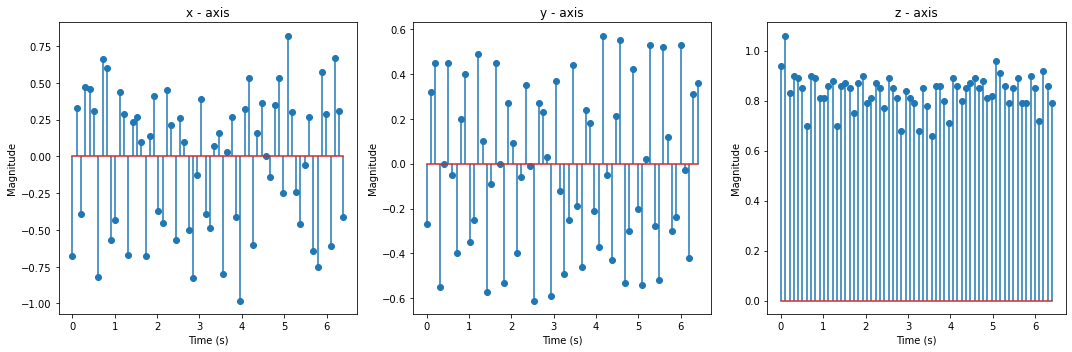

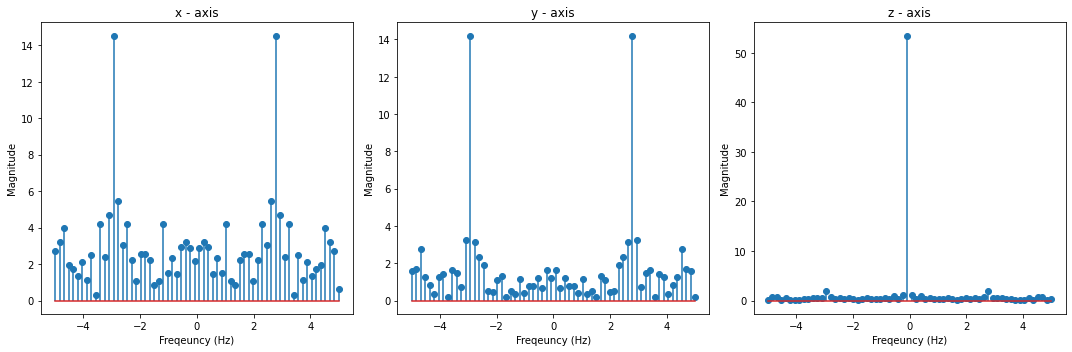

x
[-0.42, 0.18, -0.07, -0.84, -0.28, 0.16, -0.28, -0.6, 0.13, 0.21, -0.58, -0.05, 0.32, -0.06, -0.51, 0.19, 0.2, -0.69, -0.71, 0.73, 0.22, -0.44, -0.08, 0.54, -0.41, -0.3, 0.28, 0.29, -0.56, -0.64, 0.07, 0.29, -0.71, -0.67, 0.43, -0.26, -0.34, 0.23, 0.29, -0.58, -0.66, 0.29, 0.28, -0.27, -0.27, 0.24, -0.33, -0.25, -0.32, 0.47, 0.34, -0.65, -0.24, 0.2, 0.11, -0.86, 0.03, 0.19, 0.17, -0.16, 0.27, 0.22, -0.68, -0.63]
[-0.27, 0.32, 0.45, -0.55, 0.0, 0.45, -0.05, -0.4, 0.2, 0.4, -0.35, -0.25, 0.49, 0.1, -0.57, -0.09, 0.45, 0.0, -0.53, 0.27, 0.09, -0.4, -0.06, 0.35, -0.01, -0.61, 0.27, 0.23, 0.03, -0.59, 0.37, -0.12, -0.49, -0.25, 0.44, -0.19, -0.46, 0.24, 0.18, -0.21, -0.37, 0.57, -0.05, -0.43, 0.21, 0.55, -0.53, -0.3, 0.42, -0.2, -0.54, 0.02, 0.53, -0.28, -0.52, 0.52, 0.12, -0.3, -0.24, 0.53, -0.03, -0.42, 0.31, 0.36]
[0.94, 1.06, 0.83, 0.9, 0.89, 0.85, 0.7, 0.9, 0.89, 0.81, 0.81, 0.86, 0.88, 0.7, 0.86, 0.87, 0.85, 0.75, 0.87, 0.9, 0.79, 0.81, 0.87, 0.85, 0.77, 0.89, 0.85, 0.81, 0.68, 0.84

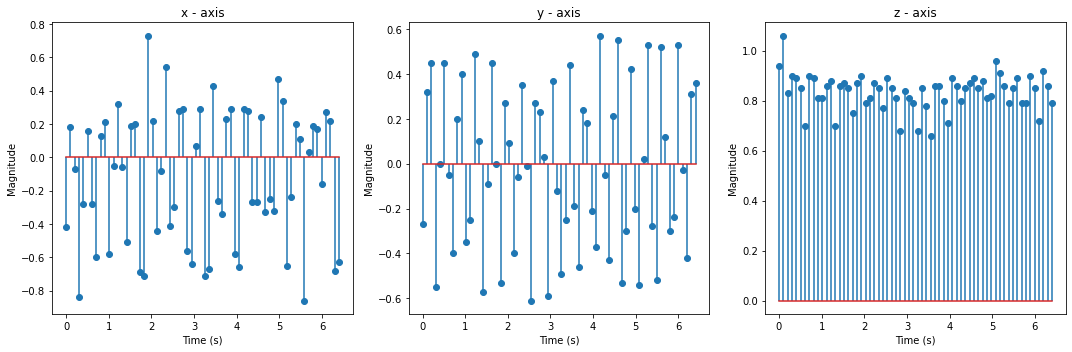

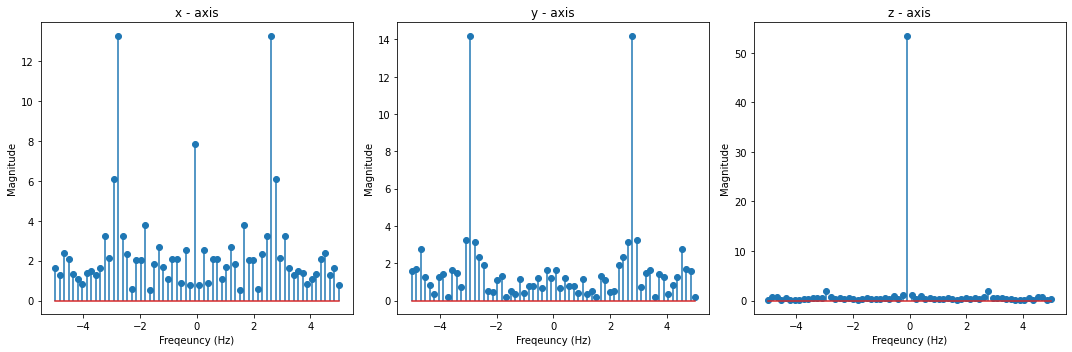

y
[-0.42, 0.18, -0.07, -0.84, -0.28, 0.16, -0.28, -0.6, 0.13, 0.21, -0.58, -0.05, 0.32, -0.06, -0.51, 0.19, 0.2, -0.69, -0.71, 0.73, 0.22, -0.44, -0.08, 0.54, -0.41, -0.3, 0.28, 0.29, -0.56, -0.64, 0.07, 0.29, -0.71, -0.67, 0.43, -0.26, -0.34, 0.23, 0.29, -0.58, -0.66, 0.29, 0.28, -0.27, -0.27, 0.24, -0.33, -0.25, -0.32, 0.47, 0.34, -0.65, -0.24, 0.2, 0.11, -0.86, 0.03, 0.19, 0.17, -0.16, 0.27, 0.22, -0.68, -0.63]
[0.37, -0.45, 1.04, -0.23, -0.47, 0.19, 0.35, -0.27, -0.38, 0.48, -0.04, -0.58, -0.21, 0.5, -0.38, -0.44, 0.56, -0.11, -0.38, -0.13, 0.58, 0.02, -0.52, 0.09, 0.35, -0.14, -0.39, 0.25, 0.28, -0.44, -0.39, 0.4, -0.44, -0.69, -0.07, 0.44, -0.38, -0.4, 0.36, 0.09, -0.26, -0.34, 0.61, -0.69, -0.49, -0.37, 1.19, 0.2, -0.18, -0.34, 0.43, -0.13, -0.57, -0.18, 0.44, 0.01, -0.64, 0.06, 0.62, -0.41, -0.34, 0.3, 0.14, -0.35]
[0.94, 1.06, 0.83, 0.9, 0.89, 0.85, 0.7, 0.9, 0.89, 0.81, 0.81, 0.86, 0.88, 0.7, 0.86, 0.87, 0.85, 0.75, 0.87, 0.9, 0.79, 0.81, 0.87, 0.85, 0.77, 0.89, 0.85, 0.81, 0

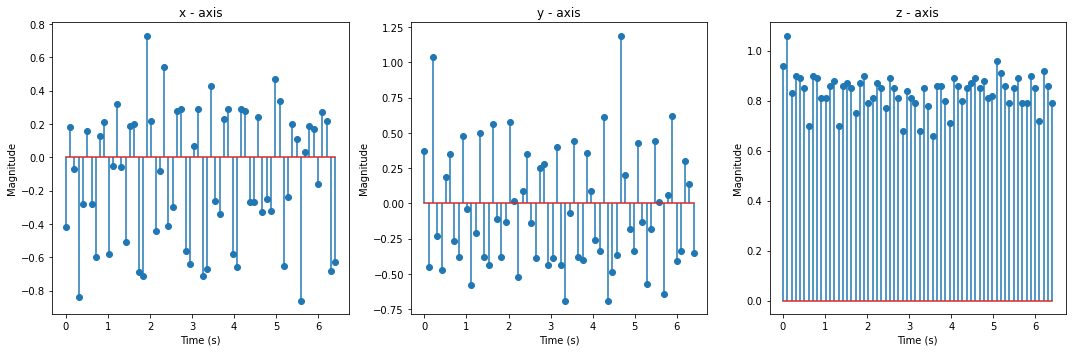

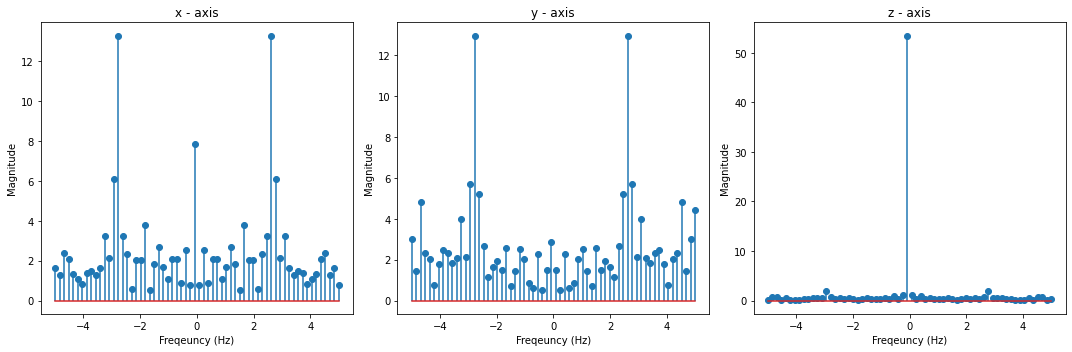

z
[-0.42, 0.18, -0.07, -0.84, -0.28, 0.16, -0.28, -0.6, 0.13, 0.21, -0.58, -0.05, 0.32, -0.06, -0.51, 0.19, 0.2, -0.69, -0.71, 0.73, 0.22, -0.44, -0.08, 0.54, -0.41, -0.3, 0.28, 0.29, -0.56, -0.64, 0.07, 0.29, -0.71, -0.67, 0.43, -0.26, -0.34, 0.23, 0.29, -0.58, -0.66, 0.29, 0.28, -0.27, -0.27, 0.24, -0.33, -0.25, -0.32, 0.47, 0.34, -0.65, -0.24, 0.2, 0.11, -0.86, 0.03, 0.19, 0.17, -0.16, 0.27, 0.22, -0.68, -0.63]
[0.37, -0.45, 1.04, -0.23, -0.47, 0.19, 0.35, -0.27, -0.38, 0.48, -0.04, -0.58, -0.21, 0.5, -0.38, -0.44, 0.56, -0.11, -0.38, -0.13, 0.58, 0.02, -0.52, 0.09, 0.35, -0.14, -0.39, 0.25, 0.28, -0.44, -0.39, 0.4, -0.44, -0.69, -0.07, 0.44, -0.38, -0.4, 0.36, 0.09, -0.26, -0.34, 0.61, -0.69, -0.49, -0.37, 1.19, 0.2, -0.18, -0.34, 0.43, -0.13, -0.57, -0.18, 0.44, 0.01, -0.64, 0.06, 0.62, -0.41, -0.34, 0.3, 0.14, -0.35]
[0.81, 0.88, 0.84, 0.74, 0.79, 0.84, 0.83, 0.78, 0.88, 0.86, 0.77, 0.85, 0.89, 0.85, 0.81, 0.86, 0.86, 0.79, 0.81, 0.91, 0.87, 0.74, 0.82, 0.89, 0.85, 0.85, 0.88, 0.

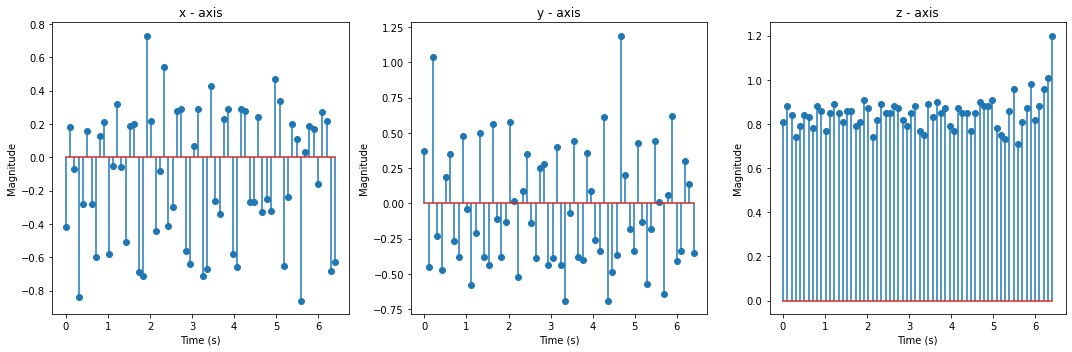

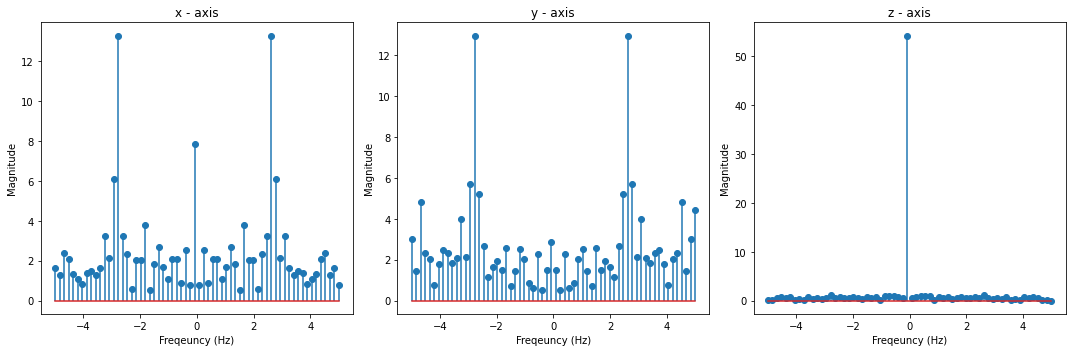

x
[-0.78, 0.37, -0.63, -0.28, 0.28, 0.11, -0.31, 0.46, 0.42, -0.88, -0.07, 0.36, 0.05, -0.69, 0.72, 0.54, -0.54, -0.32, -0.26, 0.56, -0.39, 0.57, 0.27, -1.29, -0.84, 0.33, 0.31, -0.2, 0.36, 0.42, -0.42, -0.31, 0.44, -0.12, -0.42, 0.53, 0.27, -0.44, 0.55, 0.33, -0.49, -0.26, 0.39, -0.11, -0.17, 0.32, 0.27, -0.76, -0.56, 0.4, -0.12, -0.44, 0.34, 0.61, -0.71, -0.51, 0.38, -0.08, -0.49, 0.24, 0.44, -0.35, -0.43, 0.23]
[0.37, -0.45, 1.04, -0.23, -0.47, 0.19, 0.35, -0.27, -0.38, 0.48, -0.04, -0.58, -0.21, 0.5, -0.38, -0.44, 0.56, -0.11, -0.38, -0.13, 0.58, 0.02, -0.52, 0.09, 0.35, -0.14, -0.39, 0.25, 0.28, -0.44, -0.39, 0.4, -0.44, -0.69, -0.07, 0.44, -0.38, -0.4, 0.36, 0.09, -0.26, -0.34, 0.61, -0.69, -0.49, -0.37, 1.19, 0.2, -0.18, -0.34, 0.43, -0.13, -0.57, -0.18, 0.44, 0.01, -0.64, 0.06, 0.62, -0.41, -0.34, 0.3, 0.14, -0.35]
[0.81, 0.88, 0.84, 0.74, 0.79, 0.84, 0.83, 0.78, 0.88, 0.86, 0.77, 0.85, 0.89, 0.85, 0.81, 0.86, 0.86, 0.79, 0.81, 0.91, 0.87, 0.74, 0.82, 0.89, 0.85, 0.85, 0.88, 0.

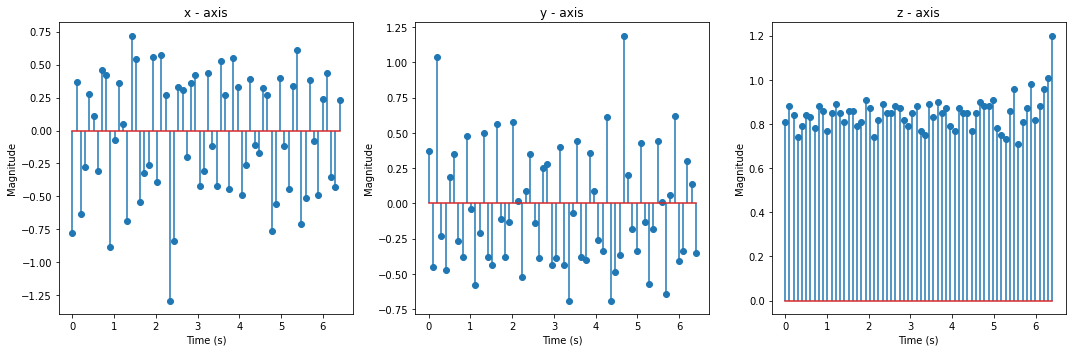

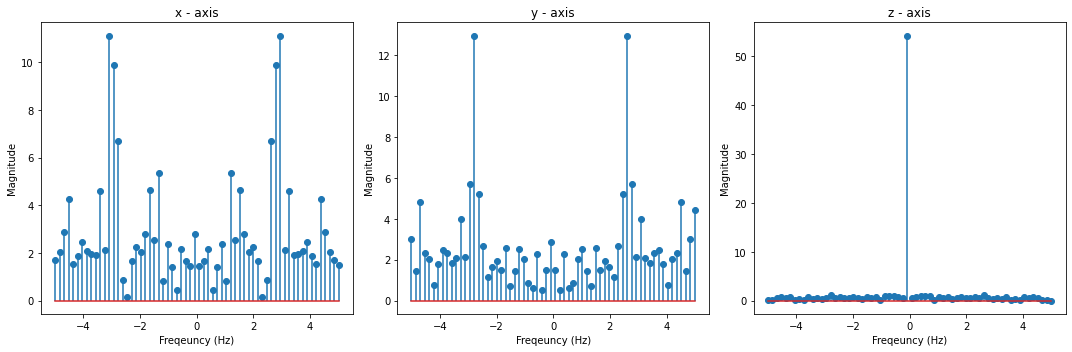

y
[-0.78, 0.37, -0.63, -0.28, 0.28, 0.11, -0.31, 0.46, 0.42, -0.88, -0.07, 0.36, 0.05, -0.69, 0.72, 0.54, -0.54, -0.32, -0.26, 0.56, -0.39, 0.57, 0.27, -1.29, -0.84, 0.33, 0.31, -0.2, 0.36, 0.42, -0.42, -0.31, 0.44, -0.12, -0.42, 0.53, 0.27, -0.44, 0.55, 0.33, -0.49, -0.26, 0.39, -0.11, -0.17, 0.32, 0.27, -0.76, -0.56, 0.4, -0.12, -0.44, 0.34, 0.61, -0.71, -0.51, 0.38, -0.08, -0.49, 0.24, 0.44, -0.35, -0.43, 0.23]
[-0.29, 0.52, -0.03, -0.61, -0.13, 0.59, -0.42, -0.41, 0.44, -0.01, -0.55, -0.24, 0.5, 0.33, -0.68, 0.48, 0.22, -0.52, -1.05, 0.47, -0.36, -0.57, 0.46, -0.19, -0.47, -0.15, 0.52, -0.04, -0.59, 0.47, 0.2, -0.73, 0.43, 0.51, -0.5, -0.49, 0.74, -0.46, -0.64, 0.79, -0.02, -0.72, -0.12, 0.52, -0.65, -0.44, 0.62, -0.11, -0.73, 0.26, 0.54, -0.41, -0.55, 0.45, 0.18, -0.52, 0.0, 0.65, -0.31, -0.55, 0.31, 0.29, -0.52, -0.31]
[0.81, 0.88, 0.84, 0.74, 0.79, 0.84, 0.83, 0.78, 0.88, 0.86, 0.77, 0.85, 0.89, 0.85, 0.81, 0.86, 0.86, 0.79, 0.81, 0.91, 0.87, 0.74, 0.82, 0.89, 0.85, 0.85, 0.88, 

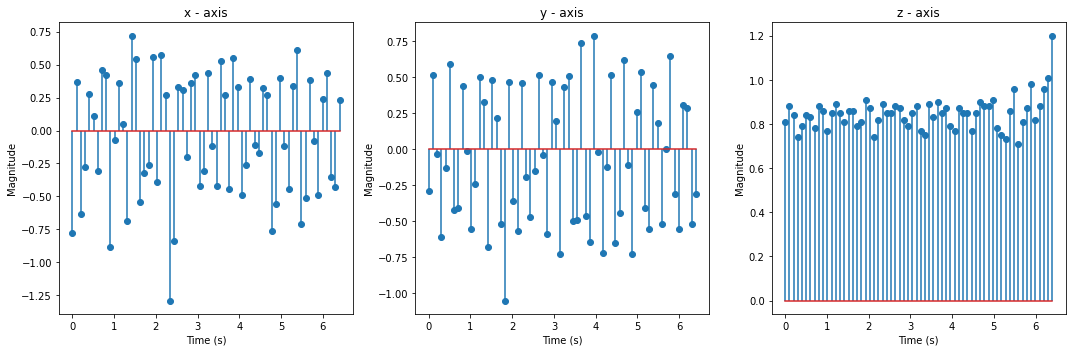

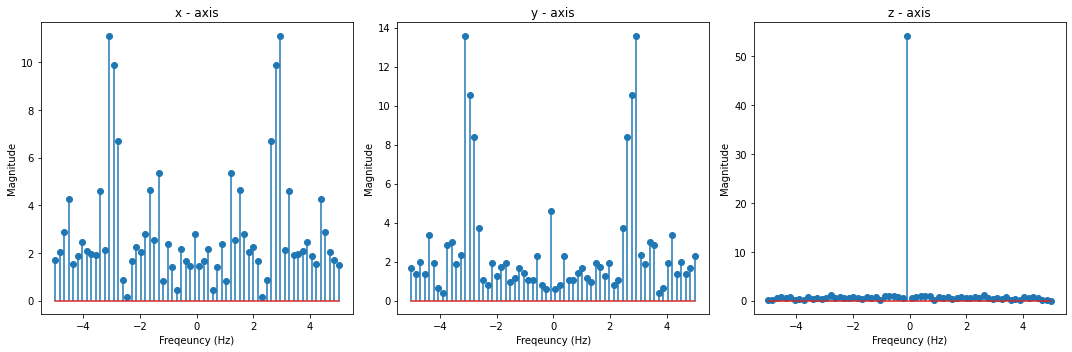

z
[-0.78, 0.37, -0.63, -0.28, 0.28, 0.11, -0.31, 0.46, 0.42, -0.88, -0.07, 0.36, 0.05, -0.69, 0.72, 0.54, -0.54, -0.32, -0.26, 0.56, -0.39, 0.57, 0.27, -1.29, -0.84, 0.33, 0.31, -0.2, 0.36, 0.42, -0.42, -0.31, 0.44, -0.12, -0.42, 0.53, 0.27, -0.44, 0.55, 0.33, -0.49, -0.26, 0.39, -0.11, -0.17, 0.32, 0.27, -0.76, -0.56, 0.4, -0.12, -0.44, 0.34, 0.61, -0.71, -0.51, 0.38, -0.08, -0.49, 0.24, 0.44, -0.35, -0.43, 0.23]
[-0.29, 0.52, -0.03, -0.61, -0.13, 0.59, -0.42, -0.41, 0.44, -0.01, -0.55, -0.24, 0.5, 0.33, -0.68, 0.48, 0.22, -0.52, -1.05, 0.47, -0.36, -0.57, 0.46, -0.19, -0.47, -0.15, 0.52, -0.04, -0.59, 0.47, 0.2, -0.73, 0.43, 0.51, -0.5, -0.49, 0.74, -0.46, -0.64, 0.79, -0.02, -0.72, -0.12, 0.52, -0.65, -0.44, 0.62, -0.11, -0.73, 0.26, 0.54, -0.41, -0.55, 0.45, 0.18, -0.52, 0.0, 0.65, -0.31, -0.55, 0.31, 0.29, -0.52, -0.31]
[1.27, 0.87, 0.77, 0.79, 0.86, 0.81, 0.83, 0.88, 0.81, 0.76, 0.84, 0.88, 0.91, 0.84, 0.9, 0.92, 0.83, 0.8, 0.84, 0.74, 0.91, 0.89, 1.09, 1.1, 0.74, 0.87, 0.69, 0.8

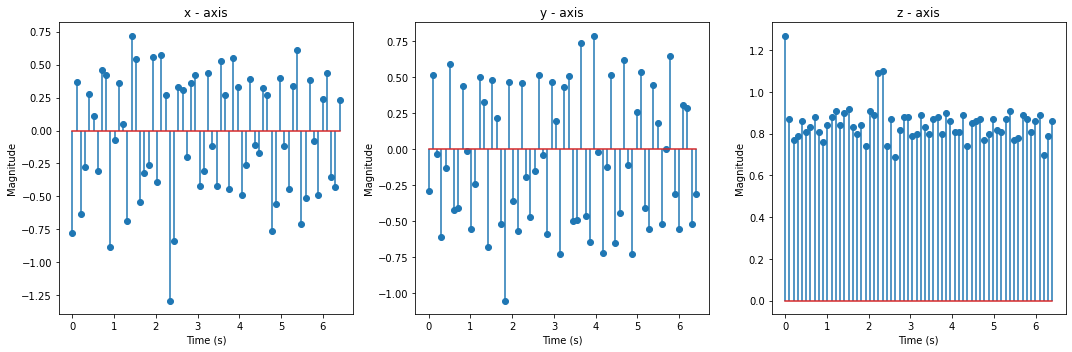

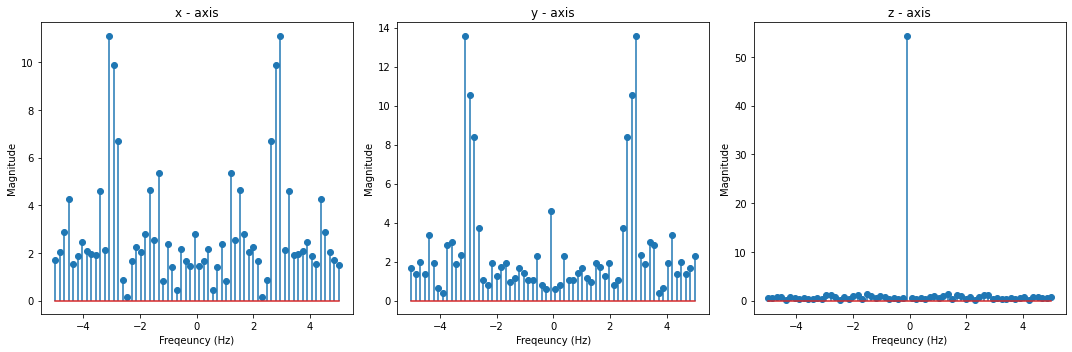

x
[0.24, -0.49, -0.13, 0.61, -0.08, -0.36, 0.21, 0.44, -0.5, -0.68, 0.28, 0.29, -0.76, 0.14, 0.48, -0.06, -0.45, 0.24, 0.4, -0.64, -0.33, 0.43, 0.09, -0.41, 0.16, 0.44, -0.51, -0.44, 0.34, 0.1, -0.79, -0.03, 0.43, -0.06, -0.48, 0.43, 0.51, -0.03, -0.53, 0.25, 0.29, -0.47, -1.05, 0.27, 0.48, -0.63, 0.0, 0.41, -0.29, -0.47, 0.24, 0.49, -0.41, -1.14, 0.17, 0.0, -0.43, -0.14, 0.28, -0.0, -0.47, -0.11, 0.31, 0.17]
[-0.29, 0.52, -0.03, -0.61, -0.13, 0.59, -0.42, -0.41, 0.44, -0.01, -0.55, -0.24, 0.5, 0.33, -0.68, 0.48, 0.22, -0.52, -1.05, 0.47, -0.36, -0.57, 0.46, -0.19, -0.47, -0.15, 0.52, -0.04, -0.59, 0.47, 0.2, -0.73, 0.43, 0.51, -0.5, -0.49, 0.74, -0.46, -0.64, 0.79, -0.02, -0.72, -0.12, 0.52, -0.65, -0.44, 0.62, -0.11, -0.73, 0.26, 0.54, -0.41, -0.55, 0.45, 0.18, -0.52, 0.0, 0.65, -0.31, -0.55, 0.31, 0.29, -0.52, -0.31]
[1.27, 0.87, 0.77, 0.79, 0.86, 0.81, 0.83, 0.88, 0.81, 0.76, 0.84, 0.88, 0.91, 0.84, 0.9, 0.92, 0.83, 0.8, 0.84, 0.74, 0.91, 0.89, 1.09, 1.1, 0.74, 0.87, 0.69, 0.82, 0.

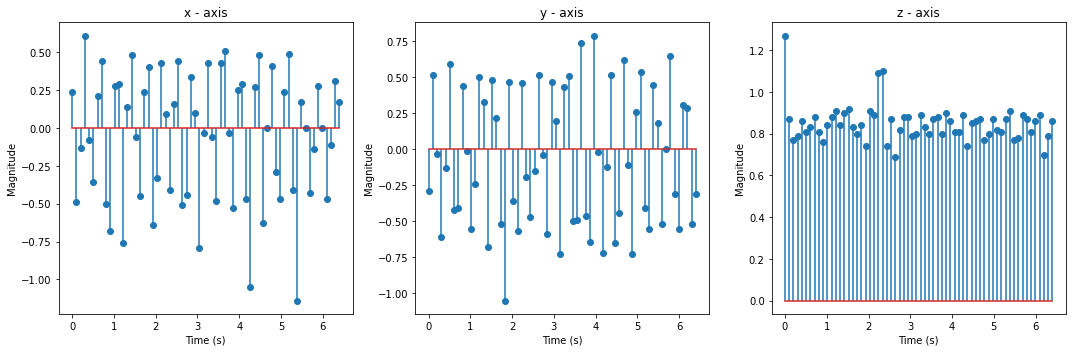

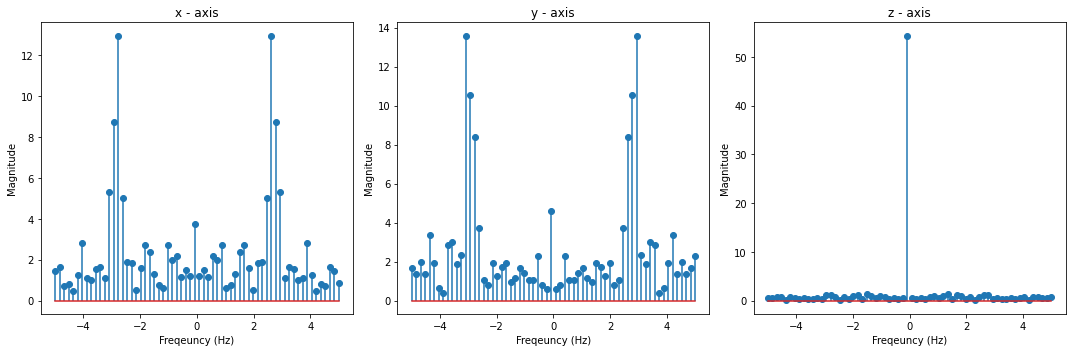

y
[0.24, -0.49, -0.13, 0.61, -0.08, -0.36, 0.21, 0.44, -0.5, -0.68, 0.28, 0.29, -0.76, 0.14, 0.48, -0.06, -0.45, 0.24, 0.4, -0.64, -0.33, 0.43, 0.09, -0.41, 0.16, 0.44, -0.51, -0.44, 0.34, 0.1, -0.79, -0.03, 0.43, -0.06, -0.48, 0.43, 0.51, -0.03, -0.53, 0.25, 0.29, -0.47, -1.05, 0.27, 0.48, -0.63, 0.0, 0.41, -0.29, -0.47, 0.24, 0.49, -0.41, -1.14, 0.17, 0.0, -0.43, -0.14, 0.28, -0.0, -0.47, -0.11, 0.31, 0.17]
[-0.31, -0.03, -0.56, -0.05, 0.52, -0.44, -0.49, 0.49, 0.25, -0.38, -0.22, 0.6, -0.01, -0.65, 0.17, 0.48, -0.43, -0.43, 0.57, -0.08, -0.6, -0.06, 0.46, -0.28, -0.48, 0.48, 0.21, -0.51, -0.32, 0.62, 0.57, -0.66, 0.03, 0.53, -0.17, -0.58, 0.09, 0.48, -0.36, -0.45, 0.51, 0.26, -0.24, -0.34, 0.61, -0.46, -0.55, 0.27, 0.41, -0.02, -0.62, 0.52, 0.28, -0.43, -0.3, 0.64, 0.11, -0.53, -0.26, 0.58, 0.18, -0.64, -0.2, 0.54]
[1.27, 0.87, 0.77, 0.79, 0.86, 0.81, 0.83, 0.88, 0.81, 0.76, 0.84, 0.88, 0.91, 0.84, 0.9, 0.92, 0.83, 0.8, 0.84, 0.74, 0.91, 0.89, 1.09, 1.1, 0.74, 0.87, 0.69, 0.82, 0.88

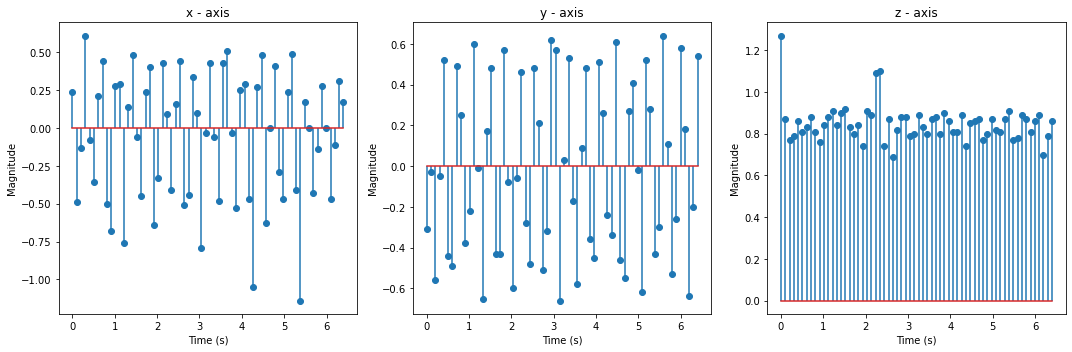

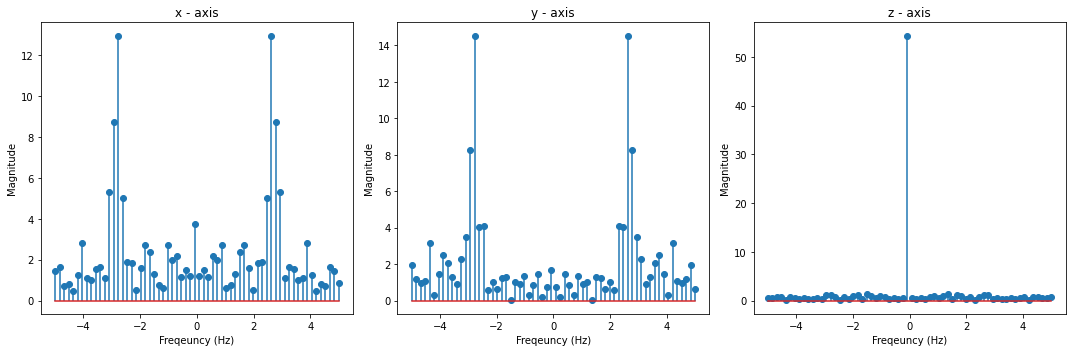

z
[0.24, -0.49, -0.13, 0.61, -0.08, -0.36, 0.21, 0.44, -0.5, -0.68, 0.28, 0.29, -0.76, 0.14, 0.48, -0.06, -0.45, 0.24, 0.4, -0.64, -0.33, 0.43, 0.09, -0.41, 0.16, 0.44, -0.51, -0.44, 0.34, 0.1, -0.79, -0.03, 0.43, -0.06, -0.48, 0.43, 0.51, -0.03, -0.53, 0.25, 0.29, -0.47, -1.05, 0.27, 0.48, -0.63, 0.0, 0.41, -0.29, -0.47, 0.24, 0.49, -0.41, -1.14, 0.17, 0.0, -0.43, -0.14, 0.28, -0.0, -0.47, -0.11, 0.31, 0.17]
[-0.31, -0.03, -0.56, -0.05, 0.52, -0.44, -0.49, 0.49, 0.25, -0.38, -0.22, 0.6, -0.01, -0.65, 0.17, 0.48, -0.43, -0.43, 0.57, -0.08, -0.6, -0.06, 0.46, -0.28, -0.48, 0.48, 0.21, -0.51, -0.32, 0.62, 0.57, -0.66, 0.03, 0.53, -0.17, -0.58, 0.09, 0.48, -0.36, -0.45, 0.51, 0.26, -0.24, -0.34, 0.61, -0.46, -0.55, 0.27, 0.41, -0.02, -0.62, 0.52, 0.28, -0.43, -0.3, 0.64, 0.11, -0.53, -0.26, 0.58, 0.18, -0.64, -0.2, 0.54]
[0.87, 0.8, 0.86, 0.9, 0.82, 0.85, 0.87, 0.89, 0.79, 0.79, 0.89, 0.99, 0.83, 0.85, 0.87, 0.95, 0.8, 0.87, 0.89, 0.79, 0.8, 0.88, 0.55, 0.81, 0.85, 0.89, 0.82, 0.81, 0.87,

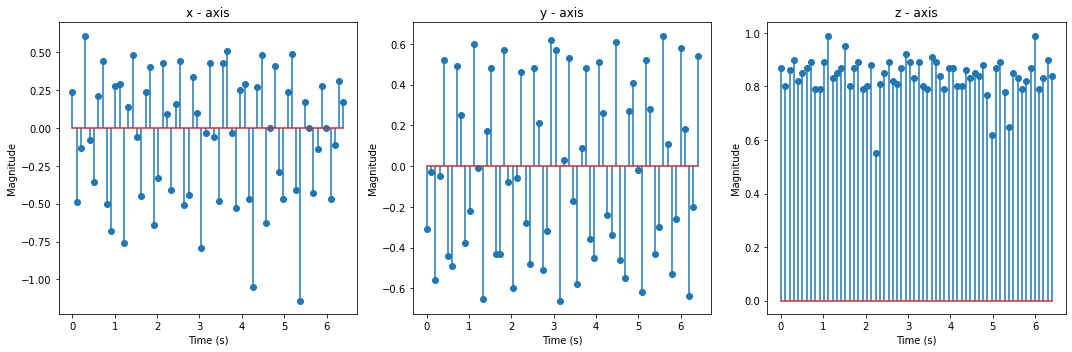

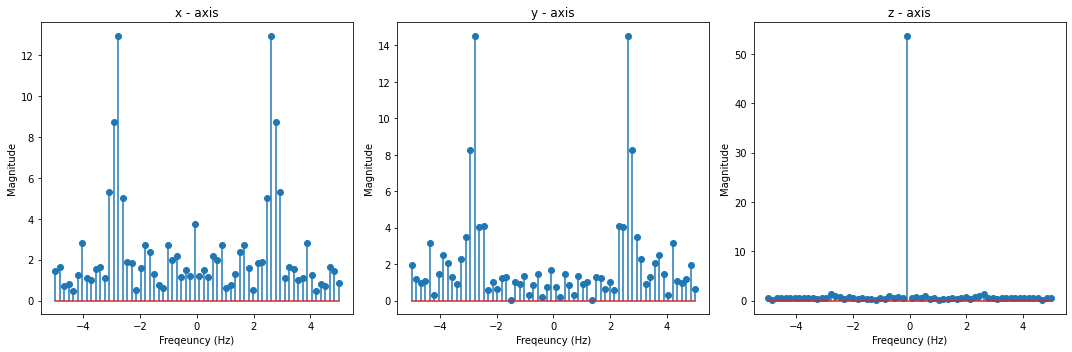

x
[0.14, -0.44, 0.43, 0.12, -0.77, -0.08, 0.46, -0.06, -0.52, 0.17, 0.26, 0.35, -0.6, 0.23, 0.32, -0.56, -0.54, 0.39, -0.04, -0.66, 0.11, 0.39, 0.1, -0.59, 0.19, 0.36, -0.23, -0.4, 0.32, 0.24, -0.4, -0.52, 0.29, 0.39, -0.55, -1.47, 0.22, -0.08, -0.21, 0.07, 0.35, -0.14, -0.49, 0.25, 0.33, -0.29, -0.56, 0.36, 0.39, -0.49, 0.49, 0.43, -0.01, -0.62, 0.24, 0.31, -0.38, -0.68, 0.22, 0.23, -0.64, -0.09, 0.33, 0.4]
[-0.31, -0.03, -0.56, -0.05, 0.52, -0.44, -0.49, 0.49, 0.25, -0.38, -0.22, 0.6, -0.01, -0.65, 0.17, 0.48, -0.43, -0.43, 0.57, -0.08, -0.6, -0.06, 0.46, -0.28, -0.48, 0.48, 0.21, -0.51, -0.32, 0.62, 0.57, -0.66, 0.03, 0.53, -0.17, -0.58, 0.09, 0.48, -0.36, -0.45, 0.51, 0.26, -0.24, -0.34, 0.61, -0.46, -0.55, 0.27, 0.41, -0.02, -0.62, 0.52, 0.28, -0.43, -0.3, 0.64, 0.11, -0.53, -0.26, 0.58, 0.18, -0.64, -0.2, 0.54]
[0.87, 0.8, 0.86, 0.9, 0.82, 0.85, 0.87, 0.89, 0.79, 0.79, 0.89, 0.99, 0.83, 0.85, 0.87, 0.95, 0.8, 0.87, 0.89, 0.79, 0.8, 0.88, 0.55, 0.81, 0.85, 0.89, 0.82, 0.81, 0.87, 

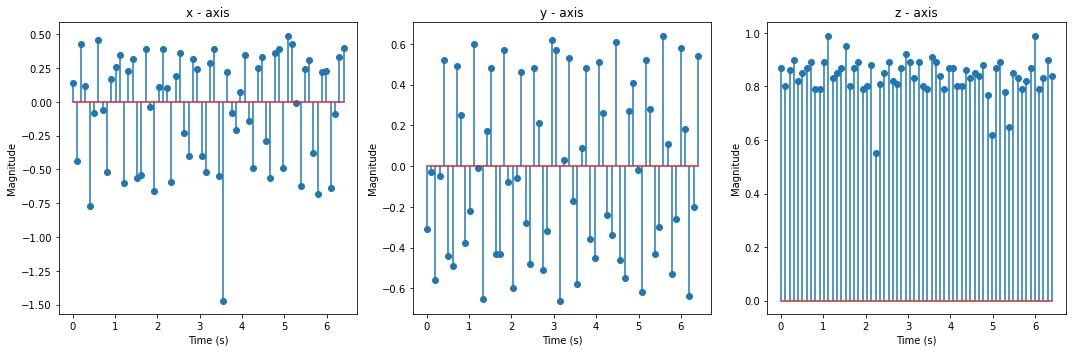

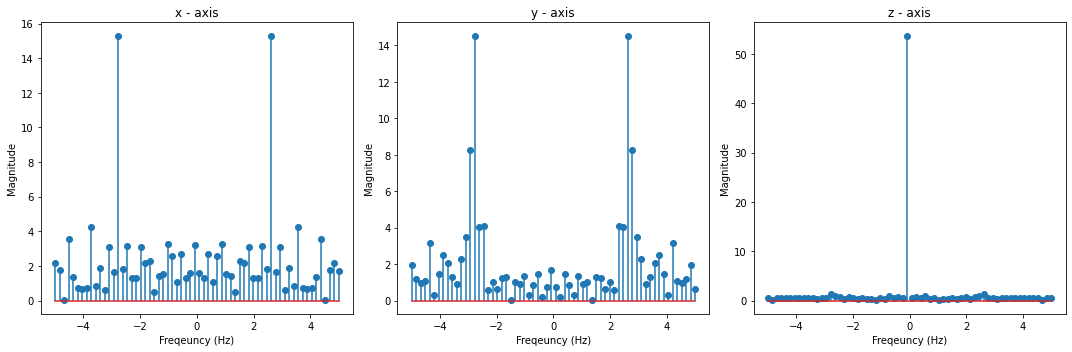

y
[0.14, -0.44, 0.43, 0.12, -0.77, -0.08, 0.46, -0.06, -0.52, 0.17, 0.26, 0.35, -0.6, 0.23, 0.32, -0.56, -0.54, 0.39, -0.04, -0.66, 0.11, 0.39, 0.1, -0.59, 0.19, 0.36, -0.23, -0.4, 0.32, 0.24, -0.4, -0.52, 0.29, 0.39, -0.55, -1.47, 0.22, -0.08, -0.21, 0.07, 0.35, -0.14, -0.49, 0.25, 0.33, -0.29, -0.56, 0.36, 0.39, -0.49, 0.49, 0.43, -0.01, -0.62, 0.24, 0.31, -0.38, -0.68, 0.22, 0.23, -0.64, -0.09, 0.33, 0.4]
[0.54, -0.56, -0.18, 0.48, 0.22, -0.68, -0.02, 0.51, -0.25, -0.53, 0.11, 0.55, -0.32, -0.35, 0.44, 0.29, -0.59, -0.12, 0.62, 0.02, -0.62, 0.07, 0.54, -0.31, -0.49, 0.29, 0.44, -0.43, -0.38, 0.57, 0.26, -0.6, -0.08, 0.63, -0.1, -0.92, 0.1, 0.62, -0.59, -0.49, 0.23, 0.42, -0.35, -0.54, 0.42, 0.23, -0.56, -0.26, 0.76, -0.3, -0.6, 0.05, 0.52, -0.07, -0.53, 0.29, 0.36, -0.4, -0.42, 0.53, 0.13, -0.6, -0.09, 0.5]
[0.87, 0.8, 0.86, 0.9, 0.82, 0.85, 0.87, 0.89, 0.79, 0.79, 0.89, 0.99, 0.83, 0.85, 0.87, 0.95, 0.8, 0.87, 0.89, 0.79, 0.8, 0.88, 0.55, 0.81, 0.85, 0.89, 0.82, 0.81, 0.87, 0.92, 0

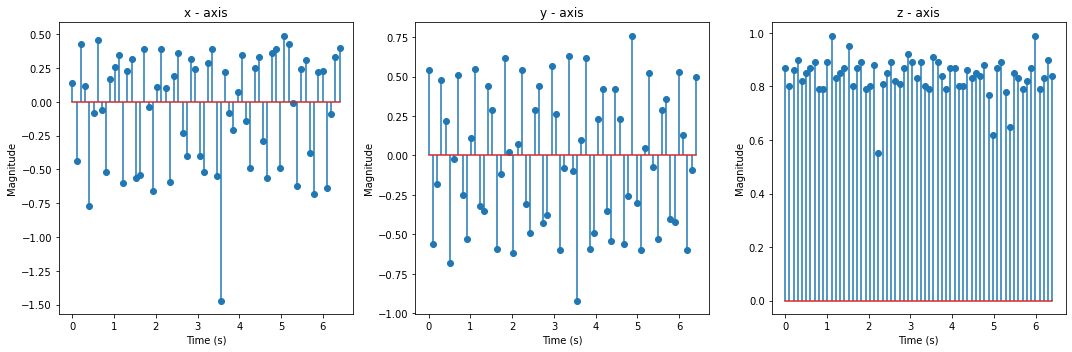

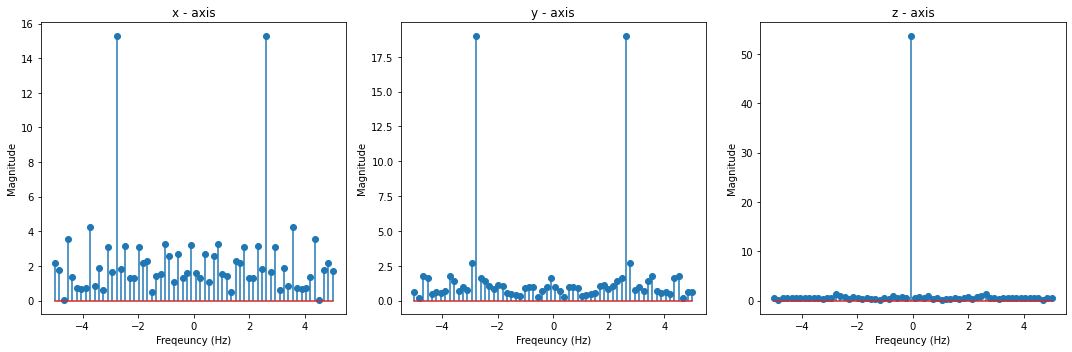

z
[0.14, -0.44, 0.43, 0.12, -0.77, -0.08, 0.46, -0.06, -0.52, 0.17, 0.26, 0.35, -0.6, 0.23, 0.32, -0.56, -0.54, 0.39, -0.04, -0.66, 0.11, 0.39, 0.1, -0.59, 0.19, 0.36, -0.23, -0.4, 0.32, 0.24, -0.4, -0.52, 0.29, 0.39, -0.55, -1.47, 0.22, -0.08, -0.21, 0.07, 0.35, -0.14, -0.49, 0.25, 0.33, -0.29, -0.56, 0.36, 0.39, -0.49, 0.49, 0.43, -0.01, -0.62, 0.24, 0.31, -0.38, -0.68, 0.22, 0.23, -0.64, -0.09, 0.33, 0.4]
[0.54, -0.56, -0.18, 0.48, 0.22, -0.68, -0.02, 0.51, -0.25, -0.53, 0.11, 0.55, -0.32, -0.35, 0.44, 0.29, -0.59, -0.12, 0.62, 0.02, -0.62, 0.07, 0.54, -0.31, -0.49, 0.29, 0.44, -0.43, -0.38, 0.57, 0.26, -0.6, -0.08, 0.63, -0.1, -0.92, 0.1, 0.62, -0.59, -0.49, 0.23, 0.42, -0.35, -0.54, 0.42, 0.23, -0.56, -0.26, 0.76, -0.3, -0.6, 0.05, 0.52, -0.07, -0.53, 0.29, 0.36, -0.4, -0.42, 0.53, 0.13, -0.6, -0.09, 0.5]
[0.85, 0.83, 0.87, 0.8, 0.76, 0.83, 0.89, 0.84, 0.79, 0.87, 0.86, 0.89, 0.81, 0.86, 0.87, 0.79, 0.8, 0.88, 0.88, 0.77, 0.87, 0.87, 0.85, 0.8, 0.84, 0.88, 0.82, 0.82, 0.88, 0.86, 

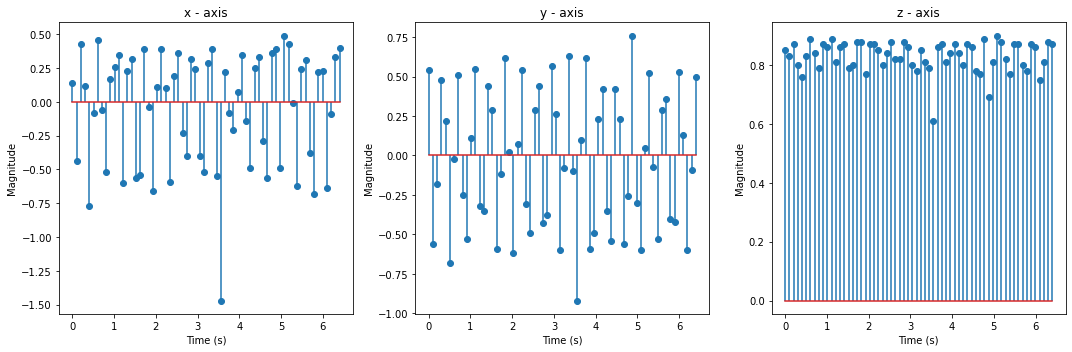

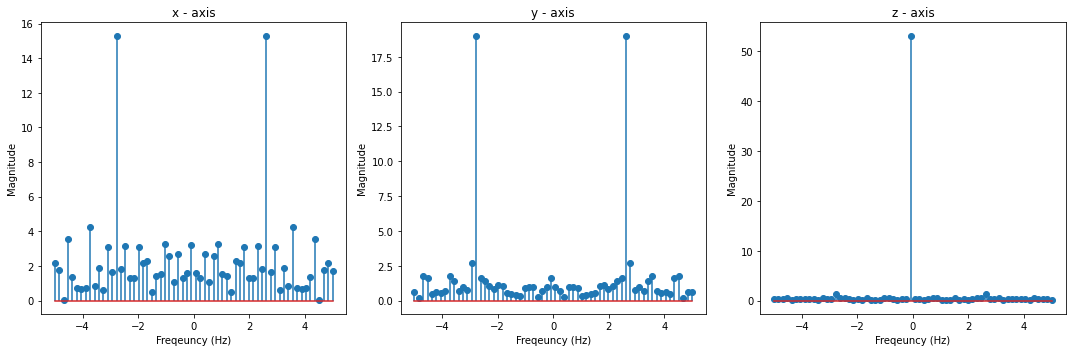

x
[-0.72, -0.18, 0.27, -0.34, -0.16, 0.26, 0.14, -0.72, -0.09, 0.44, -0.33, -0.37, 0.21, 0.24, -0.65, -0.06, 0.46, -0.42, -0.56, 0.44, 0.04, -0.57, -0.01, 0.49, -0.35, -0.73, 0.3, 0.55, -0.67, -0.21, 0.42, -0.02, -0.75, 0.14, 0.36, -0.41, -0.08, 0.29, 0.41, -0.62, 0.25, 0.36, -0.57, 0.02, 0.35, 0.06, -0.57, 0.06, 0.33, -0.54, -0.1, 0.35, 0.28, -0.66, 0.04, 0.38, -0.37, -0.44, 0.34, 0.37, -0.77, -0.03, 0.5, -0.3]
[0.54, -0.56, -0.18, 0.48, 0.22, -0.68, -0.02, 0.51, -0.25, -0.53, 0.11, 0.55, -0.32, -0.35, 0.44, 0.29, -0.59, -0.12, 0.62, 0.02, -0.62, 0.07, 0.54, -0.31, -0.49, 0.29, 0.44, -0.43, -0.38, 0.57, 0.26, -0.6, -0.08, 0.63, -0.1, -0.92, 0.1, 0.62, -0.59, -0.49, 0.23, 0.42, -0.35, -0.54, 0.42, 0.23, -0.56, -0.26, 0.76, -0.3, -0.6, 0.05, 0.52, -0.07, -0.53, 0.29, 0.36, -0.4, -0.42, 0.53, 0.13, -0.6, -0.09, 0.5]
[0.85, 0.83, 0.87, 0.8, 0.76, 0.83, 0.89, 0.84, 0.79, 0.87, 0.86, 0.89, 0.81, 0.86, 0.87, 0.79, 0.8, 0.88, 0.88, 0.77, 0.87, 0.87, 0.85, 0.8, 0.84, 0.88, 0.82, 0.82, 0.88, 0.

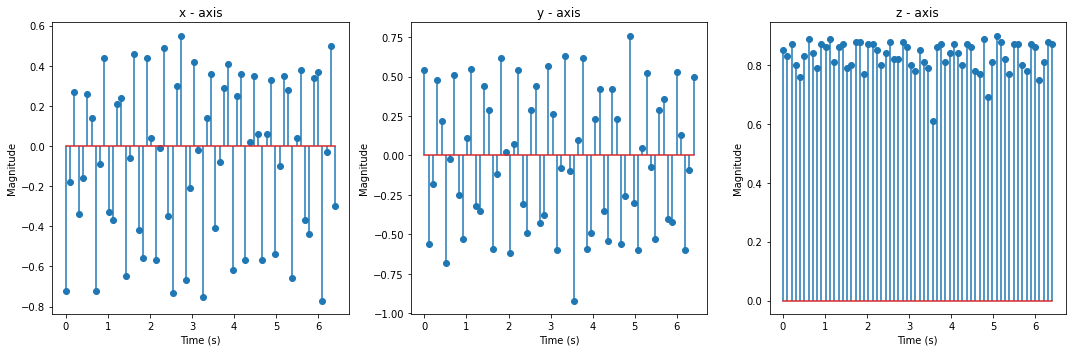

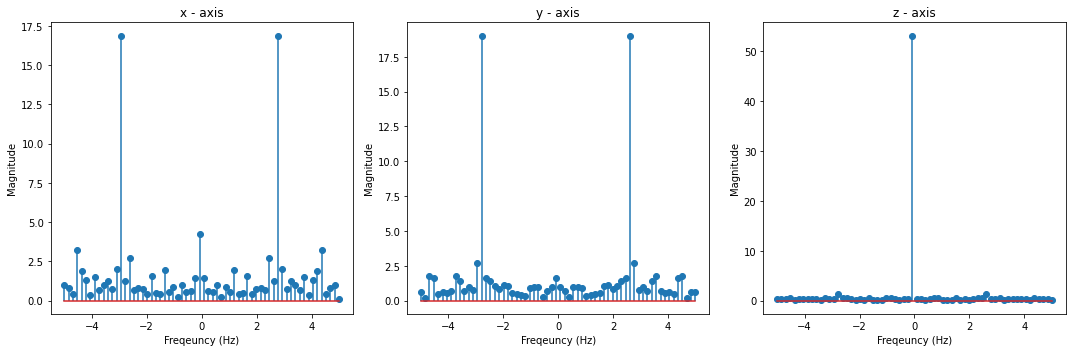

y
[-0.72, -0.18, 0.27, -0.34, -0.16, 0.26, 0.14, -0.72, -0.09, 0.44, -0.33, -0.37, 0.21, 0.24, -0.65, -0.06, 0.46, -0.42, -0.56, 0.44, 0.04, -0.57, -0.01, 0.49, -0.35, -0.73, 0.3, 0.55, -0.67, -0.21, 0.42, -0.02, -0.75, 0.14, 0.36, -0.41, -0.08, 0.29, 0.41, -0.62, 0.25, 0.36, -0.57, 0.02, 0.35, 0.06, -0.57, 0.06, 0.33, -0.54, -0.1, 0.35, 0.28, -0.66, 0.04, 0.38, -0.37, -0.44, 0.34, 0.37, -0.77, -0.03, 0.5, -0.3]
[-0.14, -0.57, 0.17, 0.53, -0.87, -0.37, 0.51, 0.13, -0.62, 0.14, 0.46, -0.4, -0.38, 0.45, 0.07, -0.58, 0.12, 0.44, -0.36, -0.49, 0.57, 0.35, -0.58, 0.19, 0.49, -0.19, -0.5, 0.45, 0.18, -0.56, -0.16, 0.65, -0.37, -0.55, 0.36, 0.38, -0.53, -0.19, 0.4, -0.29, -0.4, 0.31, 0.23, -0.6, -0.09, 0.55, -0.29, -0.51, 0.38, 0.45, -0.59, -0.29, 0.58, 0.31, -0.59, 0.19, 0.4, -0.48, -0.49, 0.62, -0.01, -0.6, -0.04, 0.53]
[0.85, 0.83, 0.87, 0.8, 0.76, 0.83, 0.89, 0.84, 0.79, 0.87, 0.86, 0.89, 0.81, 0.86, 0.87, 0.79, 0.8, 0.88, 0.88, 0.77, 0.87, 0.87, 0.85, 0.8, 0.84, 0.88, 0.82, 0.82, 0.88, 0

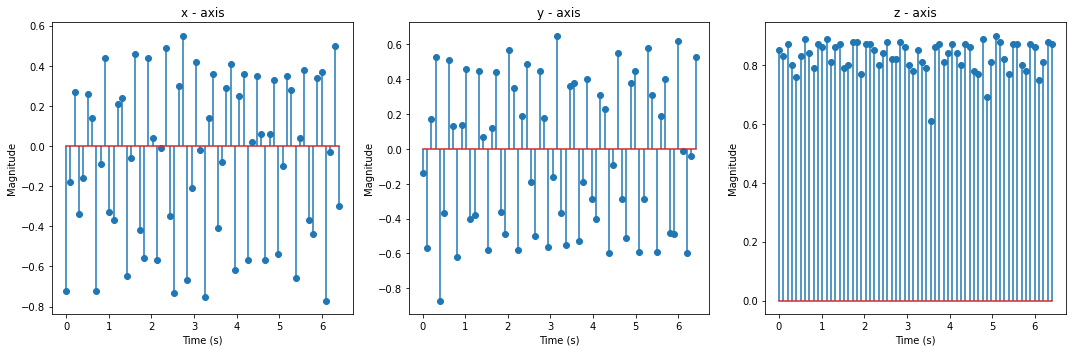

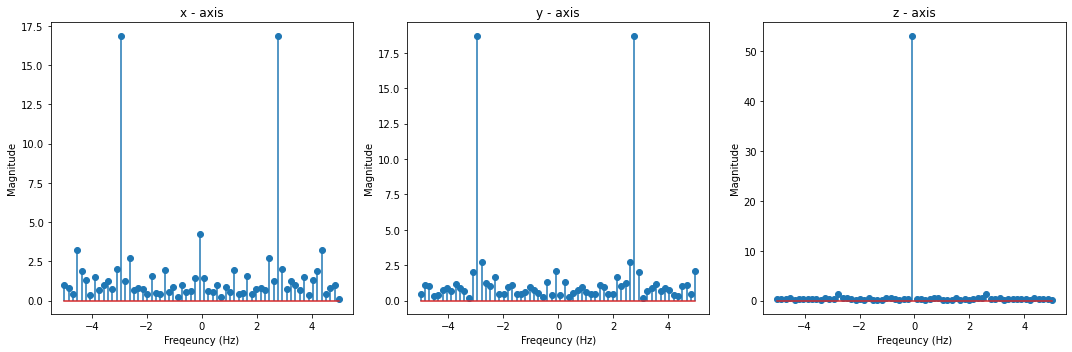

z
[-0.72, -0.18, 0.27, -0.34, -0.16, 0.26, 0.14, -0.72, -0.09, 0.44, -0.33, -0.37, 0.21, 0.24, -0.65, -0.06, 0.46, -0.42, -0.56, 0.44, 0.04, -0.57, -0.01, 0.49, -0.35, -0.73, 0.3, 0.55, -0.67, -0.21, 0.42, -0.02, -0.75, 0.14, 0.36, -0.41, -0.08, 0.29, 0.41, -0.62, 0.25, 0.36, -0.57, 0.02, 0.35, 0.06, -0.57, 0.06, 0.33, -0.54, -0.1, 0.35, 0.28, -0.66, 0.04, 0.38, -0.37, -0.44, 0.34, 0.37, -0.77, -0.03, 0.5, -0.3]
[-0.14, -0.57, 0.17, 0.53, -0.87, -0.37, 0.51, 0.13, -0.62, 0.14, 0.46, -0.4, -0.38, 0.45, 0.07, -0.58, 0.12, 0.44, -0.36, -0.49, 0.57, 0.35, -0.58, 0.19, 0.49, -0.19, -0.5, 0.45, 0.18, -0.56, -0.16, 0.65, -0.37, -0.55, 0.36, 0.38, -0.53, -0.19, 0.4, -0.29, -0.4, 0.31, 0.23, -0.6, -0.09, 0.55, -0.29, -0.51, 0.38, 0.45, -0.59, -0.29, 0.58, 0.31, -0.59, 0.19, 0.4, -0.48, -0.49, 0.62, -0.01, -0.6, -0.04, 0.53]
[0.77, 0.81, 0.88, 0.83, 0.84, 0.88, 0.86, 0.67, 0.84, 0.88, 0.81, 0.81, 0.87, 0.86, 0.77, 0.81, 0.89, 0.84, 0.77, 0.87, 0.87, 0.79, 0.84, 0.88, 0.81, 0.78, 0.87, 0.88, 0.8,

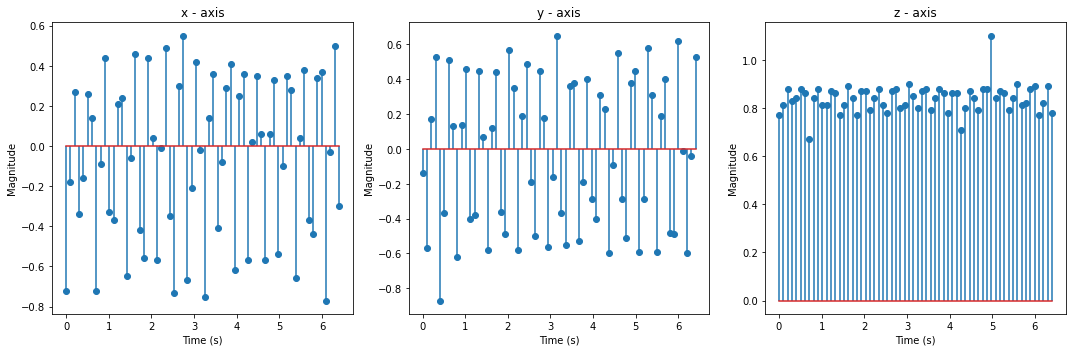

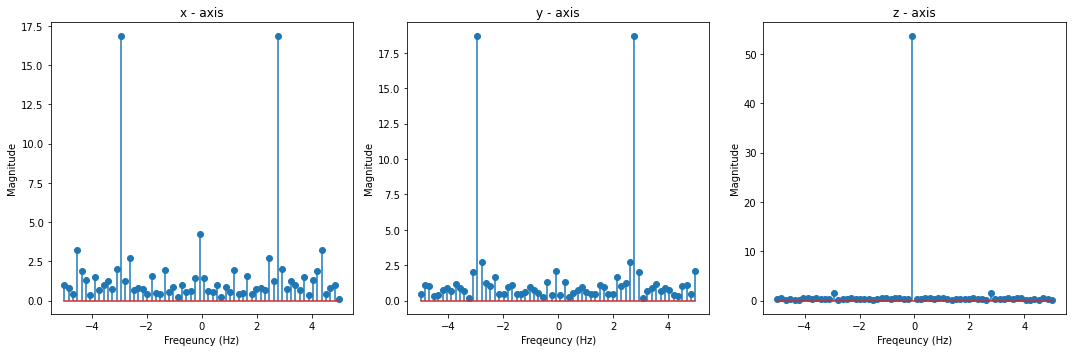

x
[-0.34, 0.2, 0.07, -0.39, -0.4, 0.32, -0.11, -0.52, 0.41, 0.36, -0.52, -0.68, 0.45, 0.22, -0.53, 0.3, 0.39, -0.59, -0.72, 0.15, 0.19, -0.7, 0.08, 0.35, -0.24, -0.57, 0.26, 0.33, -0.44, -0.43, 0.3, 0.27, -0.58, 0.07, 0.5, -0.17, -0.48, 0.11, 0.38, -0.46, -0.43, 0.29, 0.27, -0.51, 0.05, 0.37, -0.22, -0.48, 0.29, 0.41, -0.74, -0.28, 0.52, -0.29, -0.64, 0.24, 0.53, -0.76, -0.36, 0.43, 0.23, -0.68, 0.19, 0.37]
[-0.14, -0.57, 0.17, 0.53, -0.87, -0.37, 0.51, 0.13, -0.62, 0.14, 0.46, -0.4, -0.38, 0.45, 0.07, -0.58, 0.12, 0.44, -0.36, -0.49, 0.57, 0.35, -0.58, 0.19, 0.49, -0.19, -0.5, 0.45, 0.18, -0.56, -0.16, 0.65, -0.37, -0.55, 0.36, 0.38, -0.53, -0.19, 0.4, -0.29, -0.4, 0.31, 0.23, -0.6, -0.09, 0.55, -0.29, -0.51, 0.38, 0.45, -0.59, -0.29, 0.58, 0.31, -0.59, 0.19, 0.4, -0.48, -0.49, 0.62, -0.01, -0.6, -0.04, 0.53]
[0.77, 0.81, 0.88, 0.83, 0.84, 0.88, 0.86, 0.67, 0.84, 0.88, 0.81, 0.81, 0.87, 0.86, 0.77, 0.81, 0.89, 0.84, 0.77, 0.87, 0.87, 0.79, 0.84, 0.88, 0.81, 0.78, 0.87, 0.88, 0.8, 0.81

KeyboardInterrupt: 

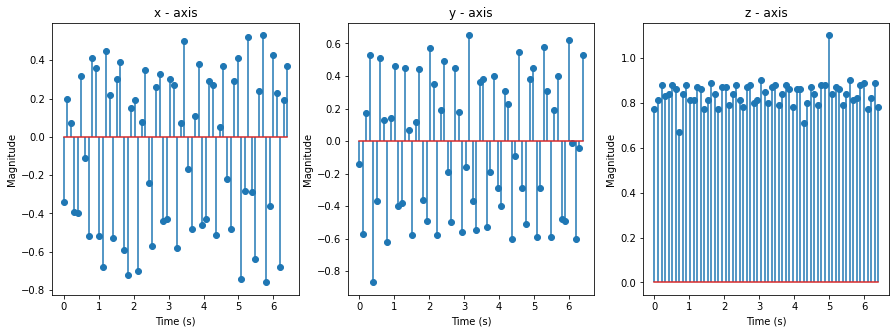

In [15]:
while True:
    received_data = str(ser.readline())[2:-5].casefold()
    print(received_data)
    if received_data == "x":
        fill_buffer("x", num_samples)
    elif received_data == "y":
        fill_buffer("y", num_samples)
    elif received_data == "z":
        fill_buffer("z", num_samples)
        
    print(x_data)
    print(y_data)
    print(z_data)
    
    fft_ij_x, fft_mag_x = Visualize_Data.fft_data(x_data)
    fft_ij_y, fft_mag_y = Visualize_Data.fft_data(y_data)
    fft_ij_z, fft_mag_z = Visualize_Data.fft_data(z_data)
#     print(fft_mag_x)
#     print(fft_mag_y)
#     print(fft_mag_z)

    with open("date2.txt", "at") as data_file:
        data_file.write(str(fft_mag_x[:int(np.ceil(len(fft_mag_x) / 2)) + 1]))
        data_file.write("=\n")
        data_file.write(str(fft_mag_y[:int(np.ceil(len(fft_mag_y) / 2)) + 1]))
        data_file.write("=\n")
        data_file.write(str(fft_mag_z[:int(np.ceil(len(fft_mag_z) / 2)) + 1]))
        data_file.write("=\n")
        data_file.write("+++\n")


    Visualize_Data.visualize_data(x_data, y_data, z_data, sampling_frequency, "time")

    Visualize_Data.visualize_data(fft_mag_x, fft_mag_y, fft_mag_z, sampling_frequency, "frequency")

In [12]:
with open("data.txt", "wt") as data_file:
    for _ in range(1000):
        received_data = str(ser.readline())[2:-5].casefold()
        print(received_data)
        if received_data == "x":
            fill_buffer("x", num_samples)
        elif received_data == "y":
            fill_buffer("y", num_samples)
        elif received_data == "z":
            fill_buffer("z", num_samples)

        print(x_data)
        print(y_data)
        print(z_data)

        fft_ij_x, fft_mag_x = Visualize_Data.fft_data(x_data)
        fft_ij_y, fft_mag_y = Visualize_Data.fft_data(y_data)
        fft_ij_z, fft_mag_z = Visualize_Data.fft_data(z_data)

        print(fft_mag_x)
        print(fft_mag_y)
        print(fft_mag_z)


        data_file.write(str(fft_mag_x[:int(np.ceil(len(fft_mag_x) / 2)) + 1]))
        data_file.write("=\n")
        data_file.write(str(fft_mag_y[:int(np.ceil(len(fft_mag_y) / 2)) + 1]))
        data_file.write("=\n")
        data_file.write(str(fft_mag_z[:int(np.ceil(len(fft_mag_z) / 2)) + 1]))
        data_file.write("=\n")
        data_file.write("+++\n")


[0.53, -0.42, 0.26, 0.29, -0.56, -0.17, 0.58, -0.28, -0.33, 0.32, 0.05, -0.59, -0.16, 0.69, -0.61, -0.34, 0.36, 0.11, -0.49, -0.09, 0.57, -0.43, -0.41, 0.38, 0.03, -0.52, 0.03, 0.41, -0.35, -0.48, 0.51, -0.04, -0.5, -0.01, 0.71, -0.51, -0.55, 0.51, 0.12, -0.63, -0.08, 0.56, -0.17, -0.5, 0.28, 0.48, -0.67, -0.26, 0.75, -0.39, -0.49, 0.27, 0.43, -0.48, -0.35, 0.46, 0.27, -0.42, -0.37, 0.66, -0.43, -0.46, 0.41, 1.0]
[-0.15, -0.25, -0.58, 0.25, 0.38, -0.41, -0.33, 0.38, 0.21, -0.5, -0.06, 0.47, -0.11, -0.57, 0.28, 0.3, -0.34, -0.16, 0.38, 0.03, -0.6, 0.18, 0.39, -0.42, -0.21, 0.53, 0.02, -0.67, 0.38, 0.42, -0.29, -0.34, 0.39, 0.33, -0.44, -0.07, 0.5, 0.01, -0.61, 0.14, 0.4, -0.5, -0.14, 0.5, -0.18, -0.49, 0.25, 0.31, -0.48, -0.08, 0.48, -0.07, -0.49, 0.32, 0.28, -0.52, -0.01, 0.58, -0.24, -0.59, 0.46, 0.11, -0.67, 0.21]
[0.88, 0.79, 0.81, 0.9, 0.81, 0.79, 0.86, 0.88, 0.78, 0.8, 0.88, 0.81, 0.79, 0.84, 0.91, 0.8, 0.78, 0.89, 0.85, 0.77, 0.83, 0.91, 0.79, 0.8, 0.88, 0.85, 0.78, 0.82, 0.9, 0

x
[-0.62, 0.68, -0.52, -0.25, 0.16, 0.3, -0.68, -0.0, 0.59, -0.37, -0.18, 0.34, -0.05, -0.39, -0.14, 0.65, -0.59, -0.35, 0.46, -0.02, -0.52, 0.05, 0.48, -0.36, -0.36, 0.52, -0.07, -0.43, -0.2, 0.56, -0.31, -0.28, 0.28, -0.14, -0.44, -0.09, 0.61, -0.43, -0.15, 0.02, 0.3, -0.3, 0.04, 0.15, -0.27, -0.43, -0.01, 0.36, -0.33, -0.14, -0.06, 0.1, -0.39, -0.04, 0.28, -0.43, -0.26, 0.51, -0.16, -0.44, 0.02, 0.6, -0.47, -0.49]
[0.24, -0.09, 0.46, -0.12, -0.52, 0.34, 0.21, -0.33, -0.17, 0.54, -0.25, -0.57, 0.34, 0.41, -0.31, -0.56, 0.41, 0.14, -0.51, 0.03, 0.51, -0.4, -0.53, 0.29, 0.33, -0.33, -0.04, 0.51, -0.36, -0.44, 0.43, 0.16, -0.38, -0.0, 0.52, 0.08, -0.71, 0.38, 0.44, -0.56, -0.34, 0.56, -0.09, -0.74, 0.3, 0.32, -0.34, -0.14, 0.58, -0.06, -0.79, 0.4, 0.45, -0.61, -0.17, 0.63, -0.09, -0.68, 0.41, 0.36, -0.58, -0.26, 0.79, -0.09]
[0.81, 0.9, 0.83, 0.79, 0.82, 0.9, 0.82, 0.81, 0.89, 0.84, 0.78, 0.81, 0.91, 0.85, 0.8, 0.84, 0.88, 0.79, 0.81, 0.89, 0.86, 0.8, 0.81, 0.92, 0.8, 0.81, 0.88, 0.84, 

x
[-0.02, -0.49, -0.17, 0.57, -0.3, -0.44, 0.27, 0.05, -0.56, -0.28, 0.56, -0.14, -0.17, 0.01, 0.81, -0.8, 0.02, 0.64, -0.28, -0.17, 0.07, 0.39, -0.54, -0.49, 0.48, -0.09, -0.33, -0.16, 0.51, -0.03, -0.54, 0.2, 0.64, -0.4, -0.43, 0.16, 0.13, -0.42, -0.29, 0.43, -0.2, -0.35, -0.17, 0.78, -0.43, -0.47, 0.37, 0.56, -0.43, -0.71, 0.59, 0.2, -0.45, -0.03, 0.66, -0.11, -0.42, 0.22, 0.53, -0.58, -0.5, 0.69, -0.21, -0.29]
[-0.16, 0.35, 0.37, -0.39, -0.15, 0.6, -0.27, -0.68, 0.32, 0.46, -0.67, -0.01, 0.58, -0.41, -0.65, 0.4, 0.16, -0.58, 0.06, 0.59, -0.24, -0.57, 0.39, 0.42, -0.48, 0.03, 0.53, -0.25, -0.58, 0.39, 0.39, -0.5, -0.19, 0.52, 0.03, -0.64, 0.06, 0.47, -0.4, -0.42, 0.34, 0.15, -0.42, -0.17, 0.47, -0.22, -0.51, 0.39, -0.06, -0.34, 0.01, 0.22, -0.4, -0.3, 0.47, 0.03, -0.61, 0.03, 0.51, -0.31, -0.6, 0.34, 0.28, -0.52]
[0.77, 0.92, 0.79, 0.83, 0.85, 0.86, 0.77, 0.85, 0.9, 0.8, 0.86, 0.89, 0.86, 0.8, 0.84, 0.9, 0.81, 0.8, 0.9, 0.84, 0.76, 0.86, 0.89, 0.83, 0.81, 0.88, 0.82, 0.8, 0.82, 0.91

x
[0.59, -0.43, -0.17, 0.33, -0.04, -0.32, 0.09, 0.43, -0.39, -0.4, 0.53, -0.24, -0.26, -0.16, 0.73, -0.45, -0.63, 0.69, -0.19, -0.4, 0.06, 0.31, -0.47, -0.34, 0.49, -0.07, -0.52, -0.04, 0.54, -0.38, -0.43, 0.4, 0.04, -0.47, -0.12, 0.63, -0.45, -0.33, 0.38, -0.05, -0.44, -0.05, 0.59, -0.32, -0.28, 0.35, 0.24, -0.54, -0.08, 0.62, -0.26, -0.24, 0.14, 0.47, -0.59, -0.24, 0.72, -0.32, -0.37, 0.31, 0.03, -0.4, -0.33, 0.69]
[0.45, -0.22, -0.57, 0.31, 0.38, -0.4, -0.17, 0.5, -0.13, -0.56, 0.27, 0.41, -0.5, -0.18, 0.42, -0.41, -0.5, 0.13, 0.45, -0.47, -0.25, 0.4, -0.14, -0.55, 0.09, 0.43, -0.34, -0.49, 0.19, 0.5, -0.24, -0.34, 0.27, 0.18, -0.35, -0.17, 0.46, -0.09, -0.48, 0.03, 0.45, -0.47, -0.42, 0.23, 0.4, -0.39, -0.21, 0.41, -0.01, -0.53, 0.07, 0.49, -0.21, -0.41, 0.3, 0.43, -0.3, -0.34, 0.36, -0.13, -0.46, 0.02, 0.41, -0.2]
[0.85, 0.79, 0.82, 0.89, 0.82, 0.8, 0.87, 0.84, 0.78, 0.81, 0.91, 0.81, 0.8, 0.85, 0.93, 0.8, 0.91, 0.91, 0.8, 0.84, 0.86, 0.87, 0.79, 0.78, 0.89, 0.82, 0.8, 0.82, 0.9,

x
[-0.44, 0.47, 0.11, -0.42, -0.51, 0.58, -0.29, -0.19, 0.31, -0.25, -0.24, -0.05, 0.05, -0.48, -0.22, 0.39, -0.29, -0.14, 0.36, -0.13, -0.29, -0.07, 0.26, -0.22, -0.75, 0.37, 0.04, -0.59, 0.06, 0.34, -0.44, -0.65, 0.71, -0.27, -0.42, 0.46, -0.04, -0.58, 0.0, 0.64, -0.48, -0.4, 0.18, 0.24, -0.51, -0.04, 0.71, -0.42, -0.33, 0.3, 0.03, -0.36, -0.03, 0.8, -0.51, -0.6, 0.52, -0.05, -0.53, -0.09, 0.54, -0.39, -0.07, 0.26]
[0.33, 0.29, -0.21, -0.04, 0.5, -0.3, -0.38, 0.4, 0.2, -0.42, -0.18, 0.45, -0.37, -0.56, 0.45, 0.13, -0.52, -0.01, 0.43, -0.37, -0.42, 0.48, 0.21, -0.45, -0.02, 0.57, -0.27, -0.54, 0.39, 0.39, -0.48, -0.13, 0.6, -0.28, -0.5, 0.37, 0.14, -0.43, -0.07, 0.48, -0.26, -0.48, 0.22, 0.3, -0.48, -0.24, 0.56, -0.15, -0.48, 0.01, 0.5, -0.52, -0.32, 0.5, -0.16, -0.52, 0.23, 0.45, -0.49, -0.39, 0.5, -0.08, -0.59, 0.17]
[0.9, 0.79, 0.83, 0.88, 0.85, 0.82, 0.86, 0.9, 0.8, 0.81, 0.9, 0.81, 0.84, 0.81, 0.92, 0.78, 0.8, 0.92, 0.81, 0.83, 0.85, 0.87, 0.8, 0.83, 0.89, 0.81, 0.79, 0.84, 0.88,

x
[-0.47, 0.08, 0.56, -0.48, -0.49, 0.71, -0.09, -0.56, 0.1, 0.47, -0.42, -0.4, 0.46, -0.14, -0.5, 0.01, 0.61, -0.47, -0.61, 0.39, 0.31, -0.58, -0.23, 0.53, -0.05, -0.32, 0.11, 0.61, -0.52, -0.4, 0.34, -0.24, -0.43, 0.1, 0.35, -0.42, -0.36, 0.47, -0.07, -0.5, 0.0, 0.56, -0.35, -0.53, 0.45, -0.1, -0.58, -0.16, 0.77, -0.57, -0.37, 0.1, 0.18, -0.62, -0.06, 0.62, -0.43, -0.19, 0.22, 0.02, -0.45, 0.22, 0.75, -0.44]
[-0.42, -0.23, 0.52, -0.0, -0.65, 0.18, 0.52, -0.49, -0.18, 0.45, -0.22, -0.47, 0.53, -0.14, -0.58, 0.44, 0.23, -0.52, 0.15, 0.51, -0.44, -0.37, 0.53, 0.14, -0.47, 0.15, 0.65, -0.65, -0.4, 0.51, 0.22, -0.85, 0.27, 0.54, -0.46, -0.22, 0.59, -0.12, -0.55, 0.39, 0.27, -0.42, -0.23, 0.51, -0.16, -0.54, 0.29, 0.39, -0.47, -0.18, 0.52, -0.12, -0.5, 0.2, 0.34, -0.43, 0.0, 0.51, -0.38, -0.49, 0.36, 0.31, -0.23, 0.0]
[0.83, 0.9, 0.85, 0.8, 0.8, 0.91, 0.84, 0.83, 0.87, 0.81, 0.82, 0.86, 0.85, 0.81, 0.83, 0.88, 0.78, 0.89, 0.88, 0.83, 0.82, 0.83, 0.84, 0.78, 0.76, 0.88, 0.87, 0.79, 0.85, 0.

x
[-0.46, 0.4, -0.1, -0.69, 0.14, 0.6, -0.6, -0.36, 0.69, -0.15, -0.49, -0.12, 0.67, -0.45, -0.24, 0.29, 0.37, -0.67, -0.34, 0.78, -0.51, -0.31, 0.22, 0.46, -0.62, -0.58, 0.87, -0.49, -0.46, 0.28, 0.32, -0.49, -0.49, 0.73, -0.15, -0.46, 0.14, 0.36, -0.4, -0.22, 0.48, -0.13, -0.42, -0.06, 0.57, -0.35, -0.09, 0.11, 0.08, -0.47, -0.26, 0.73, -0.25, -0.32, 0.12, 0.15, -0.49, -0.43, 0.54, -0.17, -0.41, -0.0, 0.68, -0.56]
[-0.47, -0.39, 0.41, 0.2, -0.65, 0.17, 0.56, -0.39, -0.45, 0.42, 0.4, -0.51, -0.01, 0.59, -0.35, -0.49, 0.44, 0.26, -0.4, 0.08, 0.43, 0.09, -0.65, 0.29, 0.48, -0.4, -0.31, 0.33, 0.17, -0.39, -0.14, 0.53, -0.32, -0.49, 0.47, 0.31, -0.56, 0.1, 0.47, -0.33, -0.44, 0.37, 0.38, -0.43, -0.07, 0.62, -0.24, -0.69, 0.17, 0.42, -0.61, -0.33, 0.62, 0.17, -0.65, 0.14, 0.37, -0.47, -0.07, 0.52, -0.4, 0.03, 0.44, 0.28]
[0.83, 0.85, 0.9, 0.78, 0.82, 0.93, 0.8, 0.81, 0.86, 0.89, 0.81, 0.82, 0.89, 0.83, 0.79, 0.85, 0.92, 0.78, 0.79, 0.9, 0.86, 0.8, 0.82, 0.89, 0.8, 0.82, 0.86, 0.87, 0.79, 0

x
[0.67, -0.18, -0.42, -0.17, 0.78, -0.23, -0.42, 0.01, 0.27, -0.42, -0.42, 0.58, -0.07, -0.43, 0.08, 0.54, -0.38, -0.51, 0.45, -0.03, -0.56, -0.39, 0.73, -0.67, -0.44, 0.28, 0.51, -0.49, -0.66, 0.51, 0.09, -0.54, 0.01, 0.72, -0.51, -0.03, 0.24, 0.31, -0.62, -0.14, 0.92, -0.5, -0.23, 0.07, 0.26, -0.61, -0.2, 0.88, -0.65, -0.54, 0.41, 0.05, -0.54, -0.11, 0.76, -0.25, -0.16, 0.42, 0.28, -0.68, -0.14, 0.92, -0.49, -0.06]
[0.3, -0.21, 0.6, -0.1, -0.56, 0.37, 0.32, -0.67, -0.12, 0.59, -0.27, -0.59, 0.27, 0.32, -0.42, -0.31, 0.59, 0.04, -0.7, 0.14, 0.5, -0.63, -0.29, 0.53, 0.03, -0.66, 0.08, 0.38, -0.44, -0.42, 0.57, 0.09, -0.75, -0.12, 0.58, -0.37, -0.45, 0.43, 0.34, -0.64, -0.08, 0.59, -0.32, -0.53, 0.31, 0.41, -0.54, -0.2, 0.55, -0.07, -0.57, 0.31, 0.42, -0.49, -0.42, 0.56, 0.14, -0.7, 0.03, 0.52, -0.47, -0.46, 0.37, 0.32]
[0.8, 0.89, 0.85, 0.77, 0.86, 0.9, 0.79, 0.79, 0.91, 0.8, 0.82, 0.83, 0.92, 0.78, 0.82, 0.88, 0.88, 0.76, 0.81, 0.92, 0.8, 0.85, 0.85, 0.86, 0.8, 0.79, 0.92, 0.8, 0.79,

x
[-0.05, 0.53, -0.55, -0.53, 0.8, -0.44, -0.38, 0.36, 0.52, -0.66, -0.31, 0.39, 0.16, -0.77, -0.01, 0.99, -0.71, -0.07, 0.17, 0.15, -0.73, -0.04, 0.77, -0.58, -0.53, 0.67, -0.16, -0.46, 0.26, 0.3, -0.61, -0.39, 0.79, -0.43, -0.44, 0.3, 0.24, -0.66, -0.09, 0.73, -0.31, -0.15, 0.19, 0.3, -0.68, -0.13, 0.77, -0.48, -0.37, 0.48, -0.13, -0.54, -0.08, 0.77, -0.53, -0.39, 0.02, 0.49, -0.56, -0.12, 0.43, -0.16, -0.51, -0.03]
[-0.06, 0.55, -0.01, -0.71, 0.1, 0.46, -0.44, -0.44, 0.52, 0.17, -0.68, -0.01, 0.54, -0.54, -0.41, 0.37, 0.42, -0.44, -0.25, 0.57, -0.09, -0.81, 0.22, 0.39, -0.39, -0.47, 0.49, 0.35, -0.41, 0.15, 0.53, -0.23, -0.51, 0.41, 0.36, -0.49, 0.0, 0.61, -0.18, -0.65, 0.33, 0.44, -0.31, -0.3, 0.54, -0.06, -0.78, 0.21, 0.42, -0.38, -0.26, 0.58, -0.33, -0.78, 0.23, 0.54, -0.5, -0.08, 0.56, -0.19, -0.71, 0.19, 0.54, -0.68]
[0.9, 0.82, 0.8, 0.84, 0.92, 0.8, 0.79, 0.85, 0.86, 0.8, 0.77, 0.91, 0.82, 0.81, 0.86, 0.89, 0.8, 0.8, 0.91, 0.8, 0.84, 0.83, 0.93, 0.8, 0.78, 0.87, 0.9, 0.8, 0.81

x
[-0.41, -0.41, 0.45, 0.2, -0.58, -0.43, 0.85, -0.24, -0.48, 0.27, 0.09, -0.47, -0.69, 0.77, -0.18, -0.3, 0.15, 0.42, -0.46, -0.66, 0.66, -0.38, -0.53, -0.11, 0.65, -0.47, -0.44, 0.46, -0.01, -0.52, -0.04, 0.57, -0.24, -0.39, 0.38, 0.17, -0.58, -2.0, 0.7, -0.37, -0.48, 0.22, 0.29, -0.64, 0.01, 0.05, 0.02, -0.55, 0.08, 0.64, -0.59, -0.38, 0.69, -0.32, -0.44, -0.21, 0.84, -0.66, -0.32, 0.64, -0.34, -0.53, -0.88, 0.86]
[-0.67, 0.49, -0.01, -0.72, 0.05, 0.52, -0.46, -0.36, 0.56, 0.12, -0.64, -0.04, 0.66, -0.49, -0.6, 0.22, 0.43, -0.47, -0.16, 0.65, -0.17, -0.71, 0.4, 0.4, -0.64, -0.02, 0.63, -0.38, -0.41, 0.55, 0.07, -0.79, 0.22, 0.48, -0.47, -0.3, 0.64, -0.03, -0.74, 0.21, 0.47, -0.65, -0.25, 0.6, -0.36, -0.57, 0.34, 0.44, -0.56, -0.11, 0.61, -0.24, -0.56, 0.15, 0.39, -0.4, -0.48, 0.52, 0.21, -0.36, -0.02, 0.55, -0.34, -0.5]
[0.84, 0.87, 0.8, 0.76, 0.93, 0.8, 0.82, 0.88, 0.89, 0.77, 0.85, 0.9, 0.85, 0.76, 0.85, 0.93, 0.75, 0.83, 0.85, 0.85, 0.8, 0.83, 0.93, 0.79, 0.78, 0.91, 0.84, 0.81, 

x
[0.86, -0.55, 0.52, -0.1, -0.68, -0.02, 0.76, -0.5, -0.28, -0.04, 0.24, -0.57, -0.03, 0.57, -0.54, -0.6, 0.53, -0.1, -0.45, 0.02, 0.39, -0.52, -0.47, 0.77, -0.3, -0.36, 0.43, 0.14, -0.46, -0.13, 0.64, -0.18, -0.35, -0.09, 0.49, -0.53, -1.04, 0.77, -0.23, -0.34, 0.17, 0.17, -0.52, -0.3, 0.56, -0.24, -0.39, 0.3, 0.18, -0.66, -0.05, 0.77, -0.59, -0.56, 0.52, 0.15, -0.38, -0.05, 0.53, -0.53, -0.0, 0.51, -0.12, -0.38]
[0.39, -0.53, -0.28, 0.49, 0.0, -0.74, 0.2, 0.49, -0.34, -0.24, 0.54, 0.02, -0.8, 0.14, 0.51, -0.54, -0.26, 0.42, 0.15, -0.53, 0.0, 0.47, -0.2, -0.52, 0.37, 0.39, -0.51, -0.07, 0.6, -0.19, -0.63, 0.3, 0.48, -0.49, -0.23, 0.53, -0.1, -2.0, 0.47, 0.34, -0.46, -0.37, 0.49, 0.2, -0.07, -0.05, 0.67, -0.45, -0.45, 0.36, 0.49, -0.65, -0.07, 0.56, -0.34, -0.62, 0.58, 0.3, -0.7, 0.1, 0.59, -0.15, 1.84, 0.29]
[0.77, 0.79, 0.85, 0.84, 0.79, 0.79, 0.92, 0.83, 0.79, 0.88, 0.84, 0.79, 0.77, 0.91, 0.78, 0.82, 0.84, 0.85, 0.79, 0.77, 0.91, 0.82, 0.79, 0.86, 0.9, 0.79, 0.83, 0.9, 0.83, 0.82,

x
[-0.41, 0.35, -0.63, -0.23, 0.62, -0.2, -0.26, -0.04, 0.36, -0.8, 0.17, 0.43, -0.09, -0.11, -0.29, 0.79, -0.86, -0.0, 0.62, -0.46, -0.2, 0.27, 0.23, -0.64, -0.2, 0.68, -0.43, -0.27, -0.1, 0.27, -0.41, -0.33, 0.78, -0.39, -0.34, 0.03, 0.39, -0.38, -1.09, 0.99, -0.27, -0.55, 0.0, 0.81, -0.35, -0.25, 0.24, 0.55, -0.81, -0.38, 0.63, -0.38, -0.41, 0.24, 0.68, -0.59, -0.61, 0.58, -0.07, -0.47, -0.17, 0.88, -0.52, -0.34]
[0.27, -0.47, -0.11, 0.62, -0.27, -0.62, 0.14, 0.34, -0.39, -0.13, 0.58, -0.36, -0.57, 0.42, 0.27, -0.58, 0.08, 0.52, -0.48, -0.44, 0.49, 0.04, -0.87, 0.31, 0.51, -0.4, -0.22, 0.52, 0.24, -0.67, 0.18, 0.47, -0.5, -0.35, 0.49, 0.04, -0.37, 0.23, 0.46, -0.41, -0.32, 0.54, -0.01, -0.69, 0.19, 0.54, -0.63, -0.27, 0.55, -0.18, -0.53, 0.19, 0.41, -0.49, 0.01, 0.52, -0.58, -0.43, 0.53, 0.33, -0.06, 0.25, 0.53, -0.48]
[0.93, 0.8, 0.9, 0.82, 0.78, 0.85, 0.92, 0.79, 0.81, 0.85, 0.85, 0.8, 0.83, 0.91, 0.8, 0.81, 0.89, 0.83, 0.79, 0.84, 0.87, 0.79, 0.78, 0.93, 0.83, 0.83, 0.89, 0.86, 0

x
[-0.57, -0.02, -0.58, -0.28, 0.73, -0.34, -0.22, 0.32, -0.05, -0.5, -0.2, 0.83, -0.09, -0.42, 0.17, 0.36, -0.67, -0.27, 0.56, 0.19, -0.48, -0.32, 0.93, -0.55, -0.41, 0.08, 0.48, -0.62, -0.11, 0.76, -0.39, -0.32, 0.37, 0.21, -0.66, -0.35, 0.85, -0.26, -0.46, 0.35, 0.48, -0.68, -0.71, 0.8, -0.17, -0.47, 0.01, 0.77, -0.56, -0.08, 0.34, -0.04, -0.47, 0.24, 0.77, -0.48, -0.69, 0.76, -0.2, -0.42, 0.61, 0.5, -0.62, -0.87]
[-0.4, 0.64, 0.01, -0.66, 0.24, 0.64, -0.36, -0.09, 0.67, -0.61, -0.47, 0.15, 0.56, -0.69, -0.21, 0.65, -0.28, -0.59, 0.15, 0.56, -0.43, -0.36, 0.6, -0.15, -0.68, 0.34, 0.5, -0.44, -0.61, 0.63, 0.12, -0.71, 0.13, 0.69, -0.47, -0.71, 0.64, 0.17, -0.54, 0.07, 0.61, -0.39, -0.75, 0.59, 0.32, -0.39, -0.23, 0.61, -0.22, -0.7, 0.03, 0.58, -0.41, -0.35, 0.44, 0.33, -0.63, -0.28, 0.62, -0.27, -0.65, 0.36, 0.39, -0.43]
[0.81, 0.87, 0.77, 0.84, 0.9, 0.83, 0.84, 0.84, 0.89, 0.8, 0.86, 0.89, 0.82, 0.84, 0.85, 0.89, 0.76, 0.83, 0.9, 0.79, 0.81, 0.89, 0.87, 0.77, 0.85, 0.91, 0.79, 0.87,

x
[-0.56, -0.19, 0.05, 0.5, -0.46, -0.39, 0.7, -0.36, -0.51, 0.54, 0.14, -0.6, 0.02, 0.56, -0.34, 0.12, 0.61, -0.2, -0.45, 0.33, 0.42, -0.44, -0.04, 0.28, -0.22, -0.36, -0.03, 0.47, -0.67, -0.31, 0.65, -0.4, -0.88, 0.6, 0.05, -0.55, -0.6, 0.72, -0.31, -0.14, -0.31, 0.6, -0.64, -0.03, 0.63, -0.21, -0.28, 0.35, 0.15, -0.49, -0.47, 0.87, -0.5, -0.13, 0.25, 0.25, -0.56, -0.49, 0.79, -0.53, -0.11, -0.12, 0.44, -0.65]
[-0.42, 0.65, -0.25, -0.88, 0.53, 0.47, -0.51, -0.25, 0.6, -0.03, -0.78, 0.39, 0.48, -0.36, -0.41, 0.56, 0.15, -0.57, -0.13, 0.72, -0.6, -0.55, 0.56, 0.26, -0.45, -0.23, 0.73, -0.31, -0.72, 0.58, 0.33, -0.52, -0.05, 0.63, -0.2, -0.85, 0.31, 0.59, -0.52, -0.37, 0.53, 0.21, -0.65, -0.06, 0.6, -0.29, -0.59, 0.5, 0.24, -0.42, -0.19, 0.5, -0.26, -0.77, 0.42, 0.23, -0.45, -0.04, 0.52, -0.54, 0.11, 0.49, -0.09, -0.68]
[0.91, 0.84, 0.78, 0.84, 0.92, 0.78, 0.8, 0.91, 0.84, 0.79, 0.81, 0.92, 0.83, 0.8, 0.86, 0.87, 0.78, 0.81, 0.89, 0.86, 0.8, 0.83, 0.93, 0.81, 0.82, 0.86, 0.89, 0.77, 0.8

x
[-0.67, 0.72, -0.35, -0.27, 0.01, 0.53, -0.72, -0.3, 0.84, -0.47, -0.17, 0.43, -0.14, -0.44, -0.17, 0.59, -0.66, -0.5, 0.99, -0.38, -0.35, -0.08, 0.19, -0.68, -0.05, 0.63, -0.35, -0.21, 0.47, 0.06, -0.61, -0.67, 0.59, -0.3, -0.04, 0.6, -0.22, 0.0, -0.51, -0.01, -0.45, 0.08, 0.83, -0.26, -0.36, 0.73, -0.13, -0.47, 0.08, 0.63, -0.55, -0.78, 0.83, -0.41, -0.56, 0.19, 0.51, -0.42, 0.29, -0.12, 0.37, -0.5, -0.48, 0.76]
[0.41, -0.64, -0.38, 0.64, -0.28, -0.7, 0.52, 0.3, -0.65, -0.29, 0.63, -0.35, -0.67, 0.58, 0.26, -0.22, 0.19, 0.61, -0.53, -0.34, 0.49, 0.23, -0.04, 0.12, 0.49, -0.28, -0.38, 0.59, 0.16, -0.8, 0.31, 0.45, -0.47, -0.24, 0.58, -0.1, -0.9, 0.23, 0.49, -0.57, 0.05, 0.44, 0.1, -0.76, 0.16, 0.58, -0.58, -0.3, 0.56, -0.19, -0.71, 0.31, 0.47, -0.54, -0.18, 0.52, -0.03, -0.81, 0.21, 0.41, -0.58, -0.04, 0.57, 0.1]
[0.77, 0.85, 0.85, 0.86, 0.8, 0.79, 0.91, 0.8, 0.77, 0.88, 0.86, 0.78, 0.84, 0.88, 0.82, 0.86, 0.91, 0.84, 0.82, 0.9, 0.89, 0.79, 0.83, 0.87, 0.83, 0.8, 0.86, 0.92, 0.76, 0

x
[-0.38, 0.1, 0.61, -0.37, -0.61, 0.56, -0.14, -0.66, 0.16, 0.69, -0.58, 0.09, -0.21, 0.43, -0.57, -2.0, 0.79, -0.26, -0.33, 0.19, 0.35, -0.52, -0.15, 0.61, -0.28, -0.75, 0.36, 0.41, -0.5, 0.81, -0.02, 0.11, -0.44, -0.15, 0.64, -0.35, -0.58, 0.44, 0.51, -0.66, -0.17, 0.59, -0.28, -0.29, 0.73, 0.76, -0.4, -0.67, 0.67, -0.17, -0.41, -1.3, 0.8, -0.34, -0.18, 0.35, 0.09, -0.51, -0.65, 0.87, -0.42, -0.27, -0.28, 0.78]
[0.09, 0.21, 0.63, -0.69, -0.5, 0.57, -0.17, -0.19, 0.37, 0.37, -0.49, -0.31, 0.65, -0.52, -0.68, 0.58, 0.18, -0.24, 0.07, 0.53, -0.28, -0.26, 0.64, -0.12, -0.65, 0.38, 0.58, -0.64, 0.03, 0.73, -0.17, -0.62, 0.41, 0.45, -0.04, 0.26, 0.56, -0.71, -0.12, 0.58, -0.14, -0.55, 0.33, 0.42, -0.2, -0.04, 0.65, -0.28, -0.62, 0.54, 0.11, -0.56, -0.03, 0.54, -0.28, -0.46, 0.4, 0.41, -0.4, 0.08, 0.51, -0.03, -0.85, 0.11]
[0.78, 0.92, 0.82, 0.82, 0.84, 0.88, 0.76, 0.8, 0.92, 0.77, 0.81, 0.9, 0.82, 0.81, 0.83, 0.9, 0.8, 0.8, 0.93, 0.83, 0.84, 0.84, 0.84, 0.78, 0.84, 0.91, 0.8, 0.8, 0.86, 0

x
[0.76, -0.23, 0.48, -0.01, -0.55, 0.07, 0.78, -0.43, -0.0, -0.07, 0.68, -0.58, -0.65, 0.78, -0.14, -0.6, -2.0, 0.7, -0.14, -0.45, 0.24, 0.39, -0.24, -0.95, 0.88, -0.32, -0.53, -0.79, 0.76, -0.26, -0.56, 0.63, 0.24, -0.45, -0.05, 0.64, -0.16, -0.48, 0.03, 0.57, -0.33, -0.49, 0.32, 0.25, -0.74, -0.52, 0.78, -0.66, -0.11, 0.76, -0.03, -0.54, -0.76, 0.71, -0.39, -0.16, 0.22, 0.25, -0.58, -0.67, 0.86, -0.63, -0.19, 0.6]
[-0.58, -0.37, 0.51, 0.31, -0.67, -0.11, 0.62, -0.28, -0.62, 0.32, 0.35, -0.44, -0.23, 0.51, -0.11, -2.0, 0.45, 0.4, -0.27, -0.37, 0.46, 0.24, -0.56, 0.29, 0.51, -0.34, -0.52, 0.33, 0.45, -0.75, -0.1, 0.52, -0.31, 0.25, 0.34, 0.32, -0.59, -0.23, 0.52, 0.14, -0.85, -0.03, 0.58, -0.49, 0.21, 0.53, 0.24, -0.61, -0.07, 0.59, -0.37, -1.15, 0.49, 0.29, -0.51, -0.16, 0.64, 0.09, -0.88, 0.33, 0.47, -0.52, -0.41, 0.51]
[0.82, 0.86, 0.92, 0.78, 0.84, 0.9, 0.82, 0.82, 0.85, 0.92, 0.78, 0.88, 0.84, 0.88, 0.79, 0.52, 0.91, 0.82, 0.8, 0.91, 0.85, 0.79, 0.83, 0.92, 0.78, 0.78, 0.92, 0.88

x
[0.59, -0.55, 0.61, 0.67, -0.38, -0.61, 0.84, -0.35, -0.62, -0.04, 0.81, -0.57, -0.71, 0.64, -0.06, -0.51, -0.4, 0.61, -0.34, -0.51, 0.72, -0.39, -0.4, -0.08, 0.67, -0.55, -0.51, 0.46, 0.13, -0.55, -0.6, 0.75, -0.36, -0.22, -0.02, 0.42, -0.56, -0.02, 0.51, -0.32, -0.15, 0.61, -0.15, -0.67, 0.04, 0.68, -0.44, -0.2, -0.3, 0.88, -0.65, -0.13, 0.57, -0.24, -0.68, 0.16, 0.81, -0.46, -0.14, -0.05, 0.38, -0.75, 0.42, 0.58]
[0.5, -0.46, -0.06, 0.58, -0.28, -0.49, 0.27, 0.33, -0.65, -0.1, 0.43, -0.14, -0.61, 0.04, 0.44, 0.04, -1.74, 0.33, 0.5, -0.2, -0.28, 0.4, 0.29, -0.8, 0.03, 0.54, -0.34, -0.82, 0.47, 0.36, -0.26, -0.16, 0.44, 0.24, -0.05, 0.24, 0.62, -0.37, -0.5, 0.3, 0.36, -0.47, -0.33, 0.62, -0.29, -0.91, 0.4, 0.3, -0.51, -0.15, 0.52, -0.15, -1.01, 0.37, 0.36, -0.42, -0.21, 0.58, 0.16, -0.74, 0.29, 0.23, -0.36, -0.09]
[0.93, 0.79, 0.87, 0.83, 0.8, 0.89, 0.92, 0.77, 0.83, 0.82, 0.91, 0.79, 0.78, 0.92, 0.81, 0.82, 0.61, 0.92, 0.81, 0.8, 0.87, 0.87, 0.78, 0.77, 0.93, 0.8, 0.77, 0.75, 0.92,

x
[0.56, 0.56, -0.38, 0.08, -0.42, 0.15, 0.52, -0.51, -0.34, 0.67, -0.32, -0.17, 0.11, 0.66, -0.38, -0.33, 0.75, -0.4, -0.3, 0.14, 0.59, -0.57, -0.83, 0.34, -0.12, -0.33, 0.1, 0.22, -0.3, -0.16, 0.07, 0.41, -0.76, -0.01, 0.62, -0.35, 0.18, 0.04, -0.07, -0.42, 0.38, 0.61, -0.35, -0.85, 0.69, -0.12, -0.39, 0.53, 0.6, -0.57, -0.88, 0.75, -0.36, -0.31, 0.07, 0.2, -0.36, -0.06, 0.53, -0.3, 0.15, -0.13, 0.03, -0.46]
[-0.06, -0.09, 0.27, 0.46, 0.48, -0.53, 0.02, 0.45, 0.14, -0.6, 0.34, 0.34, -0.28, -0.22, 0.58, -0.34, -0.83, 0.35, 0.46, -0.55, 0.24, 0.48, -0.09, -0.65, 0.3, 0.29, -0.52, -0.25, 0.52, 0.23, -0.8, 0.21, 0.44, -0.63, -0.36, 0.62, -0.18, -0.65, 0.41, 0.48, -0.48, -0.01, 0.49, -0.06, -0.54, 0.37, 0.33, -0.31, -0.27, 0.67, 0.39, -0.75, 0.03, 0.59, -0.3, -0.54, 0.46, 0.41, -0.57, -0.27, 0.65, -0.19, -0.53, 0.45]
[0.93, 0.78, 0.92, 0.9, 0.8, 0.73, 0.93, 0.81, 0.8, 0.87, 0.93, 0.77, 0.77, 1.08, 0.84, 0.78, 0.78, 0.91, 0.81, 0.81, 0.92, 0.81, 0.81, 0.85, 0.92, 0.79, 0.78, 0.89, 0.84, 0.

x
[0.21, 0.5, -0.45, -0.42, 0.55, -0.27, -0.05, -0.39, 1.03, -0.56, 0.39, 0.53, -0.4, -0.73, 0.78, -0.47, -0.17, 0.03, 0.43, -0.57, -0.91, 0.97, -0.63, -0.67, 0.67, -0.01, -0.67, 0.08, 0.93, -0.82, -0.24, 0.82, -0.27, -0.32, 0.09, 0.48, -0.46, -0.17, 0.75, -0.44, -0.23, 1.0, -0.22, -0.11, -0.18, 0.91, -0.56, -0.24, 0.76, -0.6, -0.06, 0.89, -0.54, -0.62, 0.68, 0.1, -0.44, -0.11, 0.86, -0.39, -0.04, -0.1, 0.59, -0.57]
[0.49, -0.68, -0.09, 0.6, -0.53, -0.46, 0.41, 0.29, -0.74, 0.13, 0.46, -0.69, -1.04, 0.43, 0.04, -0.85, 0.25, 0.37, -0.5, -0.31, 0.55, 0.18, -0.59, 0.14, 0.49, -0.37, -0.31, 0.49, 0.23, -0.43, -0.21, 0.65, -0.53, -0.58, 0.38, 0.4, -0.25, 0.14, 0.54, -0.71, -0.09, 0.45, 0.29, -0.73, -0.03, 0.52, -0.45, 0.34, 0.55, -0.02, -0.53, 0.17, 0.44, -0.45, -0.31, 0.53, -0.07, -0.01, 0.48, 0.37, -0.42, -0.23, 0.56, -0.3]
[0.88, 0.9, 0.8, 0.85, 0.81, 0.86, 0.9, 0.79, 0.79, 0.89, 0.81, 0.83, 0.85, 0.9, 0.81, 0.82, 0.91, 0.79, 0.81, 0.86, 0.89, 0.8, 0.73, 0.85, 0.81, 0.82, 0.84, 0.86, 0.8

x
[-0.57, 0.58, -0.12, -0.23, -0.04, 0.38, -0.66, -1.11, 0.41, 0.27, -0.81, -0.48, 0.65, -0.24, 0.19, -0.53, 0.53, -0.75, 0.09, 0.44, -0.37, -0.7, 0.64, 0.07, -0.44, -0.05, 0.71, -0.19, -0.56, 0.7, -0.32, -0.42, -0.05, 0.62, -0.56, -0.4, 0.28, 0.3, -0.58, -0.06, -0.38, -0.08, -0.06, 0.22, -0.35, -0.45, 0.54, -0.22, -0.48, -0.05, 0.62, -0.45, -0.56, 0.71, -0.29, -0.26, 0.03, 0.6, -0.72, -0.5, 0.83, -0.12, -0.26, -0.04]
[-0.43, 0.49, 0.18, -0.33, 0.18, 0.46, -0.47, -0.75, 0.35, -0.6, -0.03, 0.48, 0.15, -0.91, 0.26, 0.42, -0.55, -0.5, 0.58, -0.2, -1.11, 0.34, 0.28, -0.6, -0.02, 0.62, -0.66, -0.55, 0.5, 0.15, -0.81, 0.39, 0.65, -0.58, -0.31, 0.74, -0.54, 2.0, 0.49, 0.16, -0.12, 0.55, 0.73, -0.56, 0.24, 0.73, -0.44, -0.45, 0.41, 0.06, -0.03, 0.55, 0.55, -0.52, -0.25, 0.61, -0.06, -0.07, 0.36, 0.17, -0.06, 0.61, 0.5, 0.03]
[0.87, 0.86, 0.79, 0.84, 0.89, 0.87, 0.84, 0.81, 0.96, 0.79, 0.86, 0.87, 0.79, 0.76, 0.91, 0.79, 0.84, 0.88, 0.89, 0.8, 0.75, 0.93, 0.81, 0.8, 0.91, 0.82, 0.78, 0.85, 0.92

x
[-0.48, -0.76, 0.45, -0.16, -0.2, -0.57, 0.38, -0.34, -0.09, 0.47, 0.11, -0.48, 0.1, 0.57, -0.59, -0.05, -0.02, 0.16, -0.43, -0.48, 0.61, -0.15, -1.1, 0.87, 0.19, -0.42, -0.71, 0.89, -0.48, -0.54, 0.41, 0.46, -0.63, -0.69, 0.86, -0.15, -0.38, 0.11, 0.73, -0.69, -0.42, 0.6, 0.0, -0.27, 0.34, 0.65, -0.87, -0.64, 0.78, 0.15, -0.45, -0.06, 0.67, -0.16, -0.5, 0.47, 0.26, -0.33, -0.66, 0.5, -0.53, -0.32, 0.54, 0.04]
[-0.06, 0.25, 0.41, -0.47, -0.35, 0.38, -0.01, -0.6, -0.14, 0.5, -0.25, 2.0, 0.2, 0.39, -0.89, -2.0, 0.56, -0.31, -0.5, 0.35, 0.27, -0.38, -0.08, 0.44, -0.01, -0.03, 0.39, 0.31, -0.44, 0.0, 0.46, -0.48, -0.52, 0.41, 0.28, -0.55, -0.32, 0.53, -0.67, -0.01, -0.68, -0.01, -0.03, 0.49, 0.36, -0.58, -0.02, 0.51, -0.3, -0.61, 0.44, -0.0, -0.69, 0.11, 0.43, -0.42, -0.34, 0.43, -0.15, -0.59, 0.22, 0.43, -0.36, -0.74]
[0.78, 0.9, 0.81, 0.83, 0.84, 0.87, 0.76, 0.74, 0.88, 0.88, 0.75, -0.23, 0.91, 0.81, 0.87, 0.81, 0.91, 0.77, 0.84, 0.88, 0.81, 0.8, 0.89, 0.85, 0.78, 0.84, 0.89, 0.83, 0.7

x
[0.08, 0.17, 0.97, -0.9, -0.04, -0.13, 0.14, -0.48, -0.01, 0.69, -0.4, -0.58, 0.35, 0.53, -0.66, 0.65, 0.09, 0.38, -0.35, 0.02, 0.54, -0.53, -0.54, 0.37, 0.58, -0.57, -0.05, 0.47, -0.26, -0.26, 0.37, 0.13, -0.44, -0.45, 0.53, -0.36, -0.56, 0.13, 0.51, -0.75, -0.02, -0.09, 0.72, -0.4, 0.19, 0.48, -0.47, -0.05, 0.5, -0.3, -0.69, 0.15, 0.64, -0.64, -0.45, 0.72, -0.03, -0.4, -0.08, 0.57, -0.58, 0.01, -0.27, 0.69]
[-0.01, -0.2, -0.05, 0.36, 0.03, -0.44, 0.57, 0.16, -0.04, 0.08, 0.48, -0.31, -0.37, 0.2, 0.28, -0.08, -0.13, 0.59, -0.36, -0.16, 0.29, 0.32, -0.49, -0.09, 0.36, -0.02, -0.82, 0.31, 0.29, -0.34, -0.34, 0.43, -0.03, -0.75, 0.21, 0.49, -0.1, -0.53, 0.5, 0.0, -0.83, 0.07, 0.46, -0.59, -0.16, 0.4, -0.03, -0.64, 0.06, 0.54, -0.07, -0.03, 0.63, 0.25, -0.54, -0.05, 0.55, -0.65, 0.69, 0.51, -0.07, -0.55, -0.13, 0.47]
[0.79, 0.78, 0.87, 0.8, 0.83, 0.78, 0.87, 0.8, 0.86, 0.89, 0.86, 0.79, 0.85, 0.9, 0.77, 0.84, 0.83, 0.9, 0.79, 0.8, 0.91, 0.82, 0.74, 0.91, 0.88, 0.8, 0.77, 0.94, 0.82, 0.7

x
[0.6, 0.06, 0.59, -0.59, -0.04, -0.1, 0.4, -0.53, 0.25, 0.52, -0.38, -0.16, -0.52, 0.27, -0.4, -0.04, 0.39, 0.06, -1.08, 0.89, 0.53, -1.12, -0.49, 0.48, 0.07, -0.16, -2.0, 0.58, -0.48, -0.05, 0.18, 0.17, -0.73, 0.78, 0.46, -0.8, -0.31, 0.43, 0.5, -0.68, -0.06, -0.0, 0.19, -0.25, 0.4, 0.5, -0.64, -0.37, 0.63, 0.16, -0.42, -0.34, 0.66, -0.42, 0.51, 1.29, 0.42, -0.72, -0.16, 0.29, -0.15, -0.27, -0.07, 0.52]
[0.48, -0.47, 0.22, 0.04, -0.05, -0.14, 0.47, -0.32, -0.48, 0.34, 0.23, -0.18, -0.34, 0.42, -0.03, -0.32, -0.4, 0.6, -0.55, -0.55, 0.32, 0.34, -0.37, -0.3, 0.47, 0.01, -0.03, -0.33, 0.35, -0.39, -0.15, 0.44, -0.12, -0.65, -0.58, 0.46, -0.21, -0.57, 0.26, 0.22, -0.08, -0.84, 0.36, -0.41, -0.36, 0.44, 0.11, -0.02, 1.52, 0.36, -0.46, -1.1, 0.42, 0.16, -0.66, 0.42, 0.59, -0.28, -0.65, 0.44, 0.26, -0.08, -0.26, 0.83]
[0.8, 0.85, 0.93, 0.75, 0.83, 0.85, 0.87, 0.81, 0.84, 0.9, 0.8, 0.77, 0.88, 0.89, 0.79, 0.91, 0.86, 0.9, 0.83, 0.83, 0.91, 0.77, 0.78, 0.9, 0.92, 0.78, 0.84, 0.89, 0.8, 0.81,

x
[0.5, -0.42, 0.4, 0.2, -0.38, -0.05, 0.56, -0.18, -0.04, 0.35, -0.04, -0.1, -1.11, 0.42, -0.19, -0.74, 0.75, 0.26, -0.5, -0.04, 0.15, 0.25, -0.08, 0.35, 0.31, -0.04, -0.01, -0.09, -0.04, -0.82, -0.06, -0.11, 0.11, 0.32, -0.5, 0.0, 0.63, -0.61, -0.05, -0.08, 0.87, -0.77, -0.33, 0.77, 0.09, -0.07, -1.63, 0.53, -0.39, -0.83, 0.42, 0.52, -0.72, -0.06, -0.03, 0.51, -0.61, -0.21, 0.64, -0.33, 0.16, -0.2, 0.91, -0.63]
[0.82, -0.37, 0.27, 0.01, -0.03, -0.14, 0.43, -0.2, -0.46, 0.32, 0.37, -0.48, 2.0, 1.05, -0.08, -0.02, 0.01, 0.53, -0.27, -0.11, 0.18, -0.04, -0.45, -0.1, 0.52, -0.38, -2.0, 0.61, 0.1, -0.03, 1.28, 0.55, -0.67, -0.25, 0.2, 0.23, -0.47, -0.3, 0.5, -0.02, -0.02, 0.46, 0.56, -0.09, 2.0, 0.43, -0.05, -0.63, 0.05, 0.46, -0.18, -0.48, 0.08, 0.31, -0.99, 1.54, 0.62, -0.05, -0.44, -0.17, 0.42, -0.29, -0.07, 0.85]
[0.9, 0.86, 0.89, 0.69, 0.83, 0.82, 0.85, 0.8, 0.88, 0.89, 0.82, 0.85, 0.88, 0.86, 0.79, 0.83, 0.87, 0.84, 0.75, 0.92, 0.9, 0.74, 0.85, 0.89, 0.85, 0.82, 0.47, 0.9, 0.85, 0.8

x
[0.61, 0.45, -0.74, -0.14, 0.57, -0.32, 0.09, -0.23, 0.62, -0.57, -0.79, 0.25, 0.73, -1.03, -0.3, 1.24, 0.17, -0.43, -0.28, 0.81, -0.36, -0.35, 0.04, 0.81, -0.55, 0.1, -0.23, 0.45, -0.39, -0.45, 0.51, 0.49, -0.85, -0.42, 0.53, 0.19, -0.47, -0.49, 0.33, 0.08, -0.21, 0.29, 0.66, -0.78, -0.04, 0.06, 0.16, -0.23, -0.05, 0.48, -0.18, -0.05, -0.12, 0.35, -0.52, -0.06, 0.39, -0.31, -0.22, 0.04, 0.79, -0.86, 0.45, -0.73]
[0.89, -0.65, -0.06, 0.68, 0.18, -0.02, 0.69, -0.07, -0.03, -0.08, 0.37, -0.45, -0.79, -0.04, 0.09, -0.71, 0.17, 0.34, -0.18, -0.02, -0.04, 0.46, -1.06, -0.2, 0.3, 0.53, -0.1, -0.14, -0.01, -1.18, 0.11, -0.03, -0.2, 0.56, -0.22, -0.49, 0.32, 0.19, -0.04, -0.16, 0.3, -0.14, -0.51, 0.11, 0.37, 0.0, -1.33, 0.26, 0.28, -0.42, -0.28, 0.45, -0.08, -0.04, -0.17, 0.48, -0.37, -0.43, 0.06, 0.26, -0.87, -0.21, 0.24, 0.03]
[0.89, 0.79, 0.87, 0.86, 0.83, 0.83, 0.89, 0.82, 0.83, 0.86, 0.84, 0.86, 0.83, 0.88, 0.83, 0.78, 0.9, 0.88, 0.79, 0.83, 0.86, 0.86, 0.84, 0.86, 0.89, 0.81, 0.83, 0.8

x
[-0.35, -0.73, 0.4, 0.52, -0.52, -0.04, 0.5, 0.02, -0.42, -0.05, 0.57, -0.21, -0.46, 0.47, 0.55, -0.48, 0.03, -0.52, 0.73, -0.55, 0.02, 0.6, -0.17, -0.41, -0.18, 0.61, -0.58, -0.04, -0.62, 0.36, -0.54, -0.04, 0.84, -0.7, -0.44, 0.24, 0.82, -0.64, -0.11, 0.25, 0.62, -0.74, -0.04, 0.23, 0.06, -0.74, 0.48, 0.73, -0.57, -0.36, 0.44, 0.5, -0.66, -0.84, 0.54, 0.18, -0.45, 0.08, 0.76, -0.6, 0.21, -0.28, 0.6, -0.74]
[-0.13, 0.48, -0.28, -0.55, 0.13, 0.39, -0.69, -0.22, 0.34, -0.02, -0.57, -0.17, 0.34, -0.17, -0.3, 0.15, -0.13, 0.08, -0.46, -0.02, 0.36, -0.43, -0.47, 0.29, 0.28, -0.55, -0.23, 0.48, 0.03, -0.59, -0.17, 0.58, -0.15, -0.5, -0.07, 0.46, -0.17, -0.52, 0.07, 0.44, -0.39, -0.33, 0.39, -0.08, -0.04, -0.2, 0.45, -0.44, -0.02, 0.35, 0.22, -0.05, -0.49, 0.36, -0.13, -0.03, 0.32, 0.25, -0.01, -0.34, 0.18, 0.14, -0.88, -2.0]
[0.89, 0.89, 0.78, 0.85, 0.89, 0.84, 0.83, 0.85, 0.89, 0.78, 0.79, 0.9, 0.9, 0.76, 0.8, 0.95, 0.88, 0.8, 0.82, 0.92, 0.86, 0.82, 0.84, 0.91, 0.86, 0.84, 0.82, 0.91, 0

x
[-0.77, 0.47, 0.1, -0.47, 2.0, 0.81, -0.69, -0.68, 0.37, 0.73, -0.83, -0.63, 0.6, 0.45, -0.67, -0.18, 0.54, 0.04, -0.43, 0.29, 0.55, -0.58, -0.78, 0.64, 0.49, -0.72, -0.99, 0.68, 0.35, -0.55, -0.14, 0.75, -0.05, -1.42, 0.39, 0.71, -0.82, -0.13, 0.79, 0.23, -0.47, -2.0, 0.28, -0.07, -0.14, 0.18, 0.81, -0.45, -0.07, -0.01, -0.0, -0.59, 0.3, 0.68, -0.52, -1.04, 0.52, 0.05, -0.11, -0.04, 0.92, -0.62, -0.38, 0.53]
[0.16, -0.24, -0.17, 0.46, -0.17, -0.01, 0.09, 0.48, -0.38, -0.56, 0.19, 0.42, -0.27, -0.33, 0.32, 0.24, -0.19, 0.34, 0.48, -0.02, -0.5, 0.06, 0.39, -0.3, -0.48, 0.36, 0.1, -0.04, -2.0, 0.62, -0.27, -0.63, 0.11, 0.37, -0.25, -0.5, 0.43, 0.23, -0.44, -0.4, 0.57, -0.26, -0.02, 0.23, 0.55, -0.16, -0.55, 0.45, 0.38, -0.68, -0.18, 0.71, 0.04, -0.82, -0.11, 0.59, -0.3, -0.49, 0.46, 0.26, -0.78, -0.51, 0.48, -0.17]
[0.78, 0.83, 0.89, 0.9, 0.8, 0.84, 0.91, 0.84, 0.83, 0.85, 0.9, 0.84, 0.8, 0.9, 0.91, 0.82, 0.84, 0.78, 0.9, 0.79, 0.84, 0.9, 0.82, 0.83, 0.8, 0.9, 0.79, 0.85, 0.73, 0.87, 0

KeyboardInterrupt: 